<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- فراخوان توابع مورد نیاز
</b>
</div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import gaussian_kde
#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- خواندن دیتاهای خام مربوط به کک 1030 
</b>
</div>

In [4]:
df = pd.read_csv(f"{working_dir}/Raw-Data/coke_1030_Lab.csv",encoding='latin-1' )
print(f"size of raw data = {df.shape}")
#---------remove rejected materials-------
df = df.astype({'time_1':str})
df['time_1'] = df['time_1'].str.lower()
mask = df['time_1'] != 'reject'
df = df[mask]
print(f"after removing rejected goods = {df.shape}")
#---------Drop Some Columns---------------
df.drop(labels=['trailer','time_1','location','sample_no','factory','humidity','s112_315','s315'],axis=1,inplace=True)
#---------Filter Tarikh-------------------
df = df[df['tar'] >= 14020915]
#change type of tarikh column for grouping
df = df.astype({'tar': str})
print(f"from 14020915 to 14030915 = {df.shape}")
#---------group tarikh by Average of other columns------
df = df.groupby('tar', as_index=False).mean().round(2)
df.reset_index(inplace=True ,drop=True)
print(f"After Grouping By Tarikh = {df.shape}")
print(df.describe())
#---------drop column ash because all time is 0.0------
df.drop(labels=['ash'],axis=1,inplace=True)
#---------prepare data for saving to csv file------
df.set_index(keys='tar', inplace=True ,drop=True)
df = df.add_suffix(' (Coke1030)')
print(df.head())
#save prepared data for next
df.to_csv(f"{working_dir}/data/coke_1030.csv",index=True)
#---------remove dataframe from memory
del df

size of raw data = (1890, 13)
after removing rejected goods = (1872, 13)
from 14020915 to 14030915 = (683, 5)
After Grouping By Tarikh = (157, 5)
                c           s    ash        s112
count  157.000000  157.000000  157.0  157.000000
mean    81.690318    1.220127    0.0    2.142166
std      1.193550    0.230451    0.0    0.960875
min     80.000000    0.630000    0.0    0.000000
25%     80.700000    1.000000    0.0    1.500000
50%     81.500000    1.300000    0.0    2.000000
75%     82.450000    1.400000    0.0    2.710000
max     84.900000    1.500000    0.0    5.000000
          c (Coke1030)  s (Coke1030)  s112 (Coke1030)
tar                                                  
14020915         83.47          0.93             2.67
14020916         83.05          0.90             2.00
14020925         83.18          0.85             2.25
14020927         81.27          0.90             4.67
14020928         82.00          1.02             2.50


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1-2 - خوشه بندی داده 
</b>
</div>

(157, 3)
(157, 3)
Empty DataFrame
Columns: []
Index: []
(157, 2)
(157,)
(157, 4)


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2570516955.py:39: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


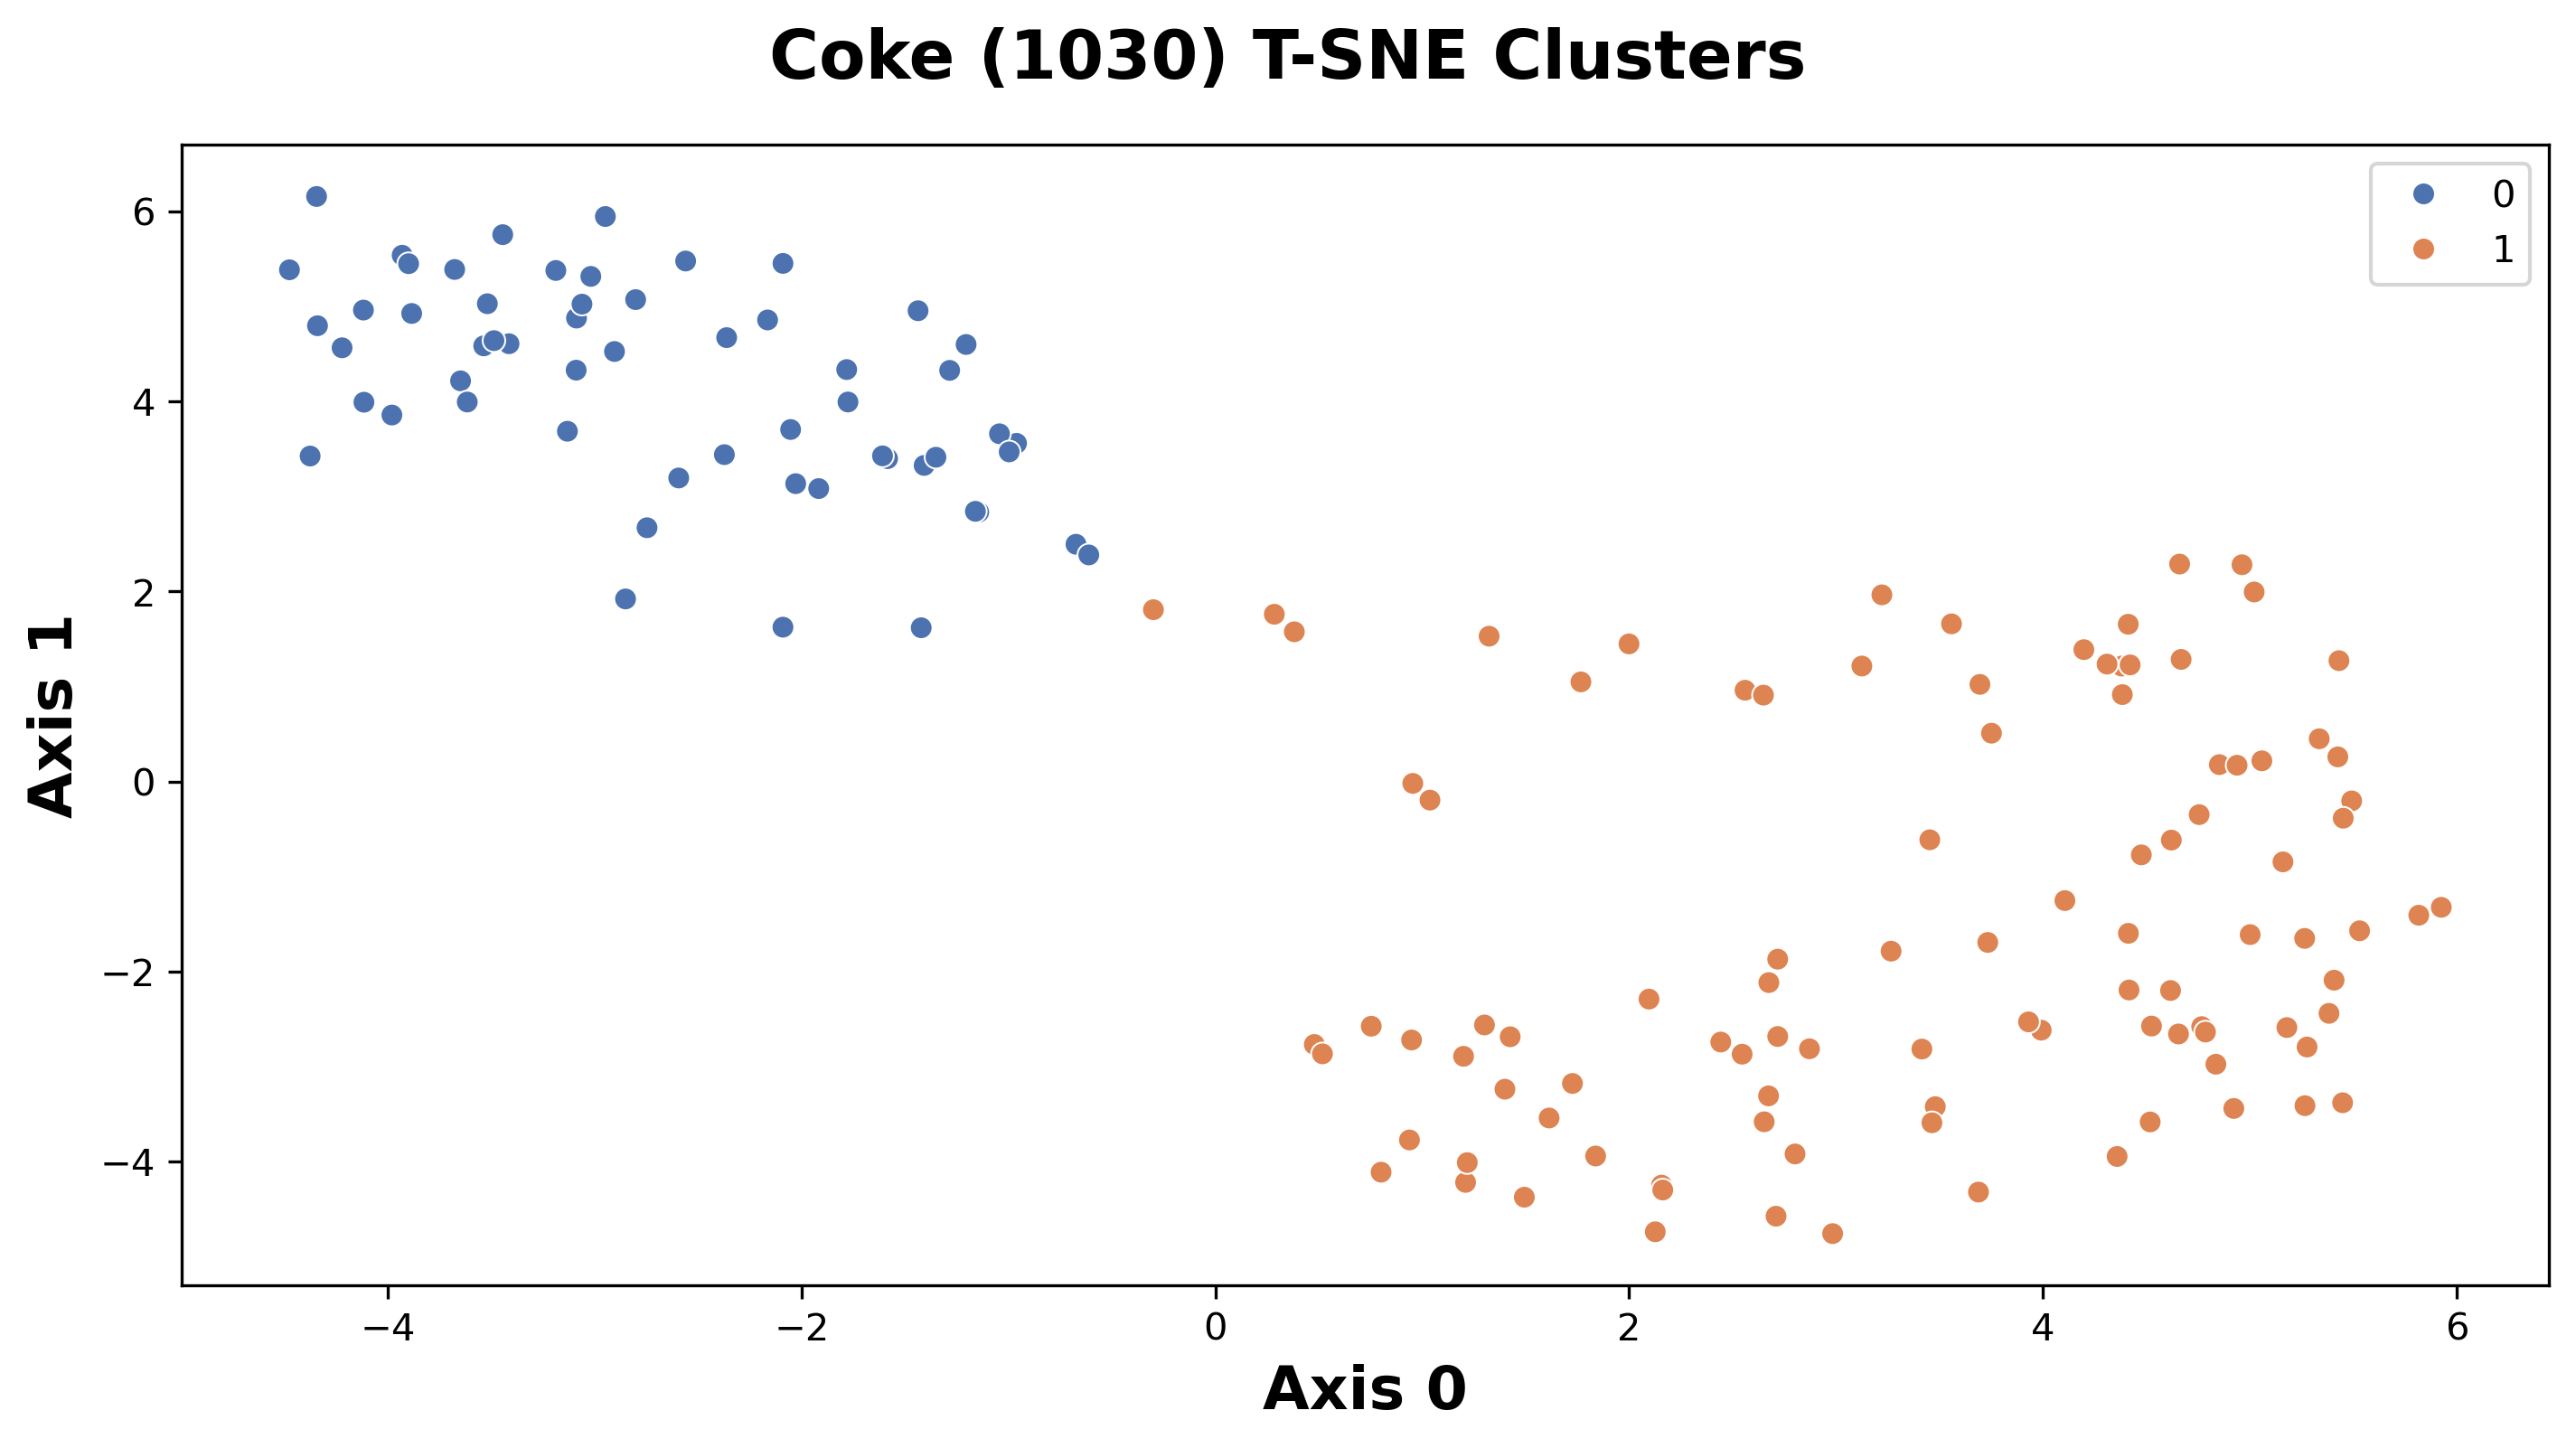

Index(['c (Coke1030)', 's (Coke1030)', 's112 (Coke1030)'], dtype='object')


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2570516955.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2570516955.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2570516955.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(


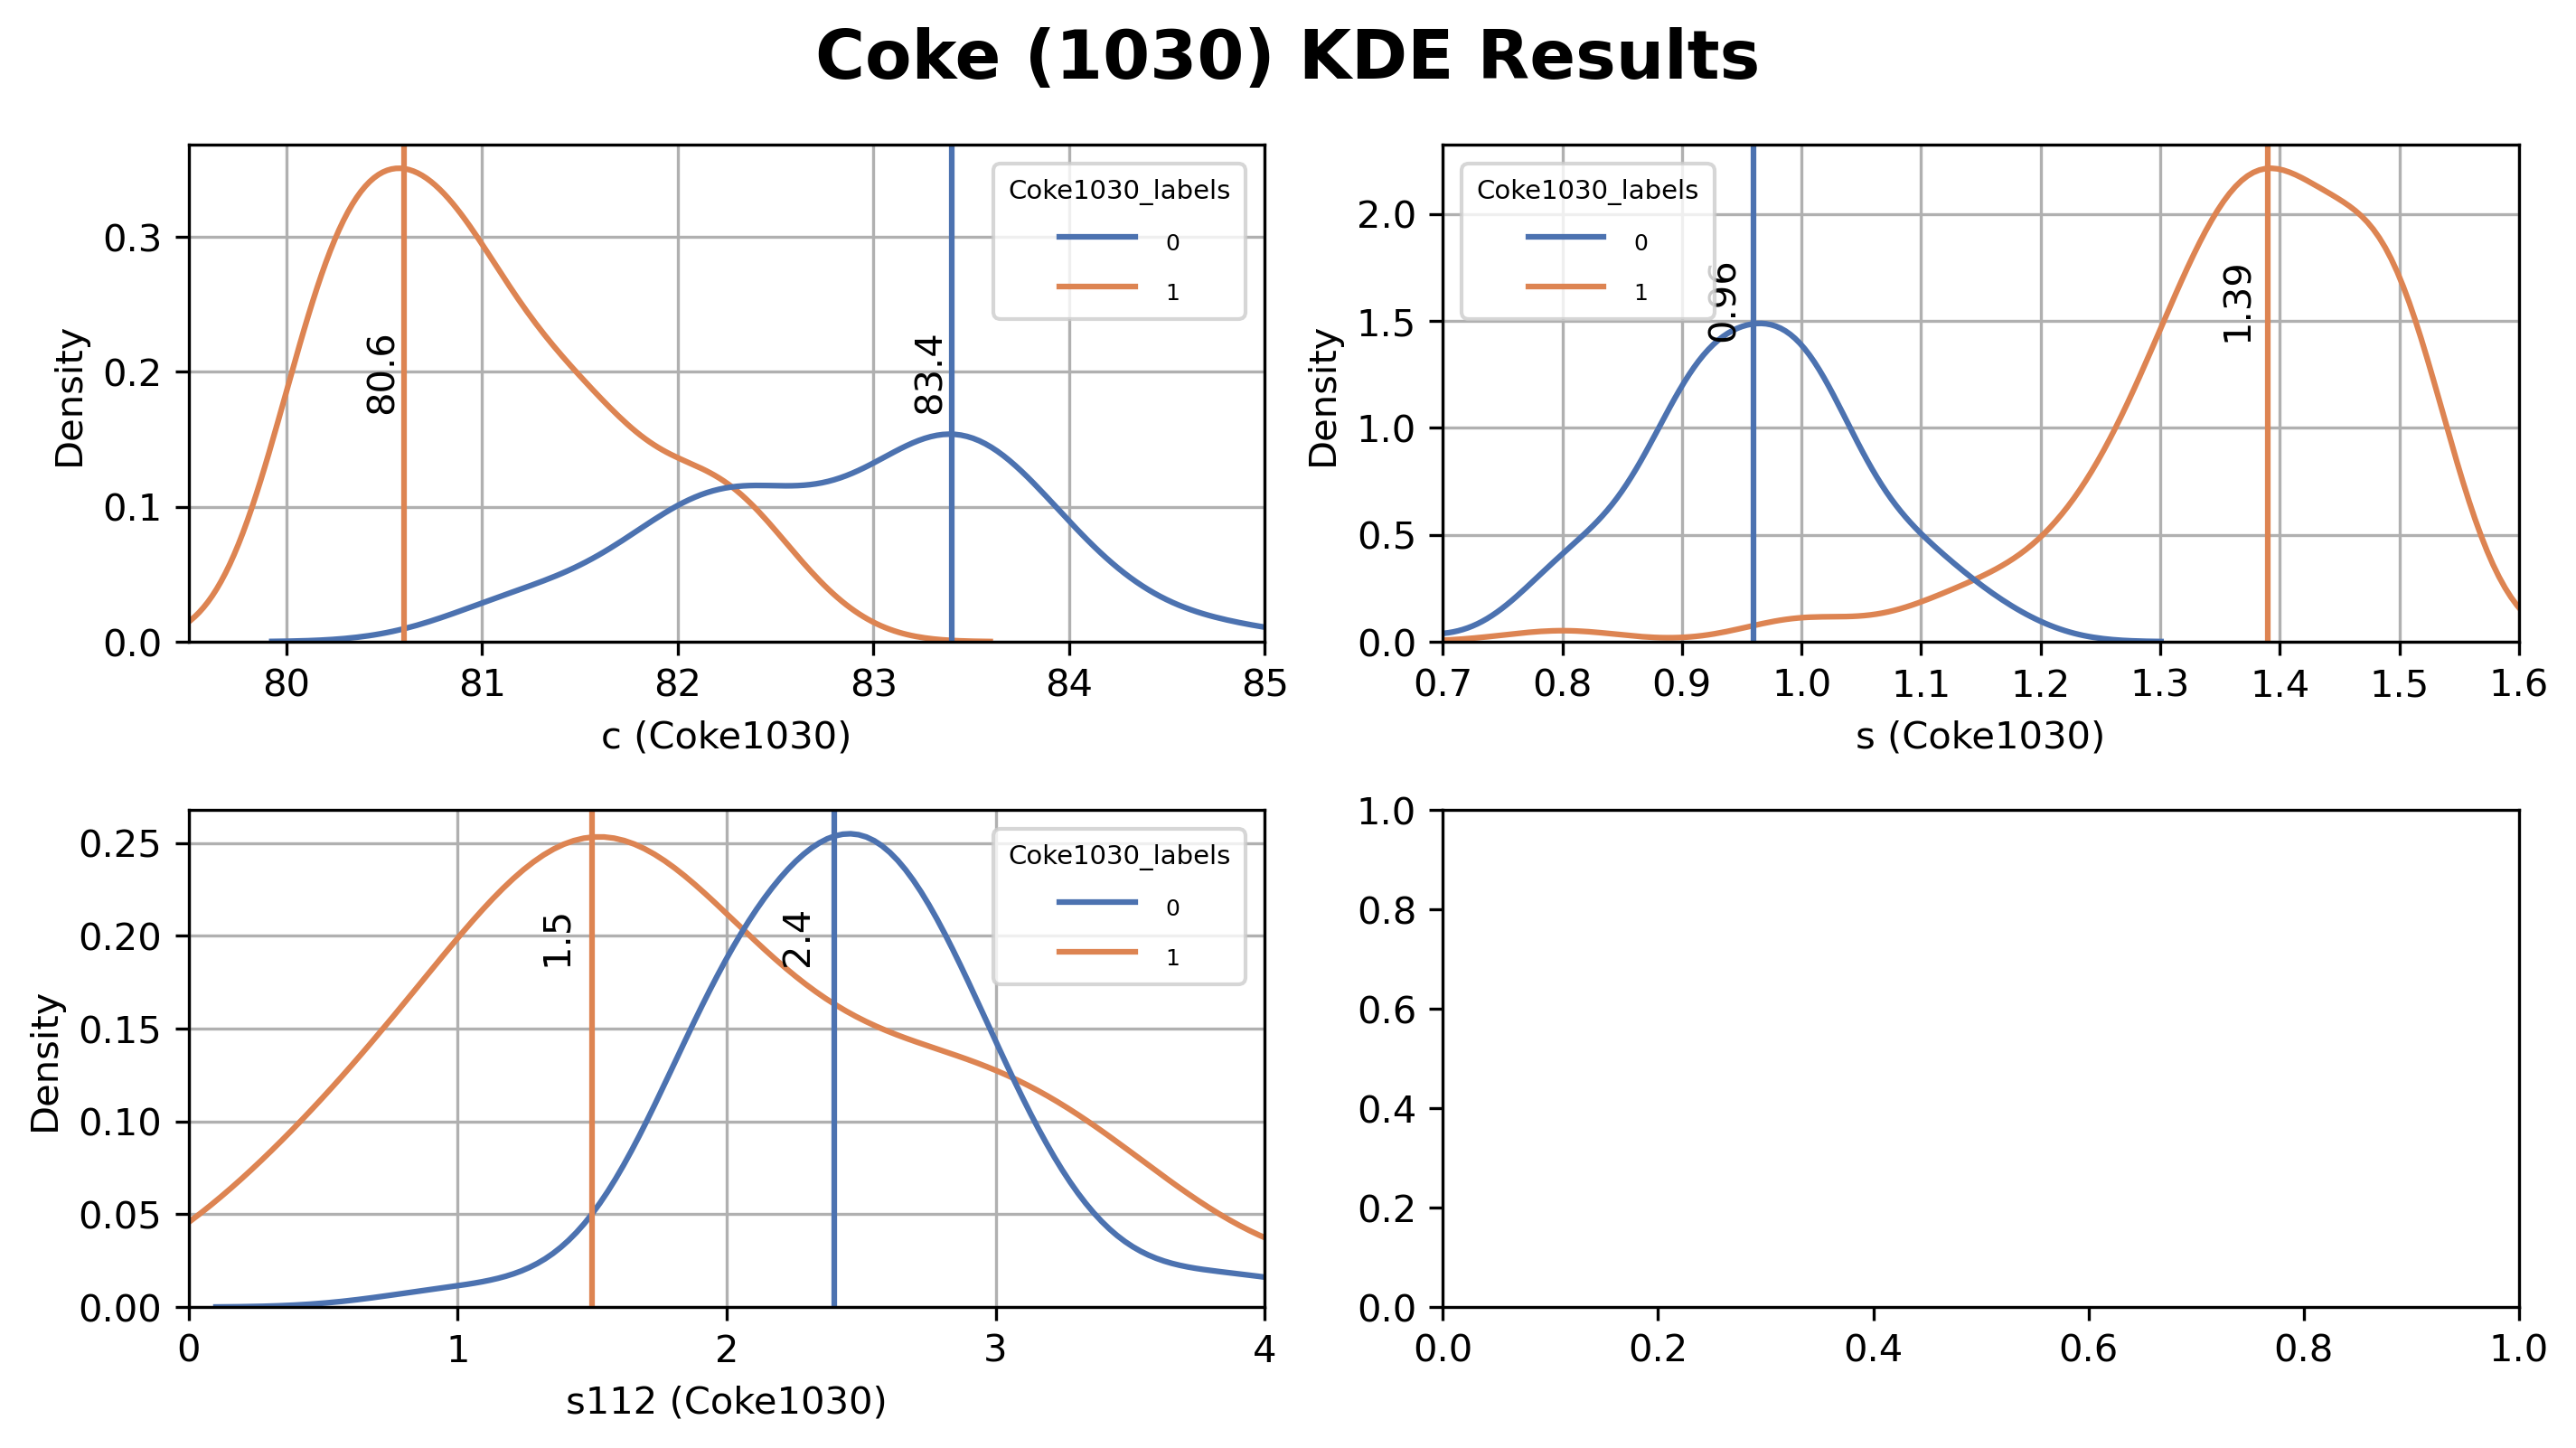

In [6]:
df = pd.read_csv(f"{working_dir}/data/coke_1030.csv")
df.set_index(keys='tar', inplace=True ,drop=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
#df.drop(labels=['s315 (Coke1030)'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=50)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 2, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
#----------Labeling---------
clust_lable_dict = {0:1,1:0}
labels = [clust_lable_dict[i] for i in model.labels_]
df["Coke1030_labels"] = labels
print(df.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('Coke (1030) T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Axis 0', fontsize=16,fontweight='bold')
ax1.set_ylabel('Axis 1', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=df['Coke1030_labels'].values,
    palette= cmap,
    )
fig.tight_layout()
plt.savefig(f'{working_dir}/presentation/coke-1030-tsne-clusters.jpg')
plt.show()

#----------Labes Conditions-----
plot_name = df.columns.drop('Coke1030_labels')
print(plot_name)
num = 0
for k in range(1):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('Coke (1030) KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,2)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(2):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="Coke1030_labels",
                #hue_order=[0,2,3,],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            plt.setp(ax[i][j].get_legend().get_texts(), fontsize='6') # for legend text
            plt.setp(ax[i][j].get_legend().get_title(), fontsize='7') # for legend title
            num = num +1
    fig.tight_layout()
ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0][0].set_xlim(left=79.5,right=85)
ax[0][0].axvline(83.4,color=cmap[0])
ax[0][0].text(83.2, 0.2, '83.4', rotation=90, va='center')
ax[0][0].axvline(80.6,color=cmap[1])
ax[0][0].text(80.4, 0.2, '80.6', rotation=90, va='center')
#--------------------------------------------------
ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[0][1].set_xlim(left=0.7,right=1.6)
ax[0][1].axvline(0.96,color=cmap[0])
ax[0][1].text(0.92, 1.6, '0.96', rotation=90, va='center')
ax[0][1].axvline(1.39,color=cmap[1])
ax[0][1].text(1.35, 1.6, '1.39', rotation=90, va='center')
#-----------------------------------------------------
ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1][0].set_xlim(left=0,right=4)
ax[1][0].axvline(2.4,color=cmap[0])
ax[1][0].text(2.2, 0.2, '2.4', rotation=90, va='center')
ax[1][0].axvline(1.5,color=cmap[1])
ax[1][0].text(1.3, 0.2, '1.5', rotation=90, va='center')
plt.savefig(f'{working_dir}/presentation/coke-1030-kde-results.jpg')
plt.show()
# save For next use
df.to_csv(f"{working_dir}/data/coke_1030_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- خواندن دیتاهای خام مربوط به کک فاین 
</b>
</div>

In [8]:
df = pd.read_csv(f"{working_dir}/Raw-Data/coke_Fine_Lab.csv",encoding='latin-1' )
print(f"size of raw data = {df.shape}")
#----------------remove rejected materials--------
df = df.astype({'time_1':str})
df['time_1'] = df['time_1'].str.lower()
mask = df['time_1'] != 'reject'
df = df[mask]
print(f"after removing rejected goods = {df.shape}")
#---------------Drop Some Columns-----------------
df.drop(labels=['sampling_d','trailer','time_1','location','sample_no','factory','humidity','s05_335','s335'],axis=1,inplace=True)
#---------------Filter Tarikh---------------------
df = df[df['tar'] >= 14020915]
#change type of tarikh column for grouping
df = df.astype({'tar': str})
print(f"from 14020915 to 14030915 = {df.shape}")
#group tarikh by Average of other columns
df = df.groupby('tar', as_index=False).mean().round(2)
df.reset_index(inplace=True ,drop=True)
print(f"After Grouping By Tarikh  = {df.shape}")
print(df.describe())
#---------------drop column ash because all time is 0.0----
df.drop(labels=['ash'],axis=1,inplace=True)
#---------prepare data for saving to csv file------
df.set_index(keys='tar', inplace=True ,drop=True)
df = df.add_suffix(' (CokeFine)')
#save prepared data for next
df.to_csv(f"{working_dir}/data/coke_fine.csv",index=True)
#remove dataframe from memory
del df

size of raw data = (3796, 14)
after removing rejected goods = (3778, 14)
from 14020915 to 14030915 = (1118, 5)
After Grouping By Tarikh  = (181, 5)
                c           s    ash         s05
count  181.000000  181.000000  181.0  181.000000
mean    84.339945    1.084972    0.0    2.292376
std      5.881336    0.300516    0.0    0.844233
min     75.470000    0.210000    0.0    0.000000
25%     80.670000    0.920000    0.0    2.000000
50%     82.030000    1.100000    0.0    2.000000
75%     84.440000    1.320000    0.0    2.500000
max     98.690000    1.830000    0.0    5.330000


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1-3 - خوشه بندی داده 
</b>
</div>

(181, 3)
(181, 3)
Empty DataFrame
Columns: []
Index: []
(181, 2)
(181,)
(181, 4)


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\4123717033.py:39: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


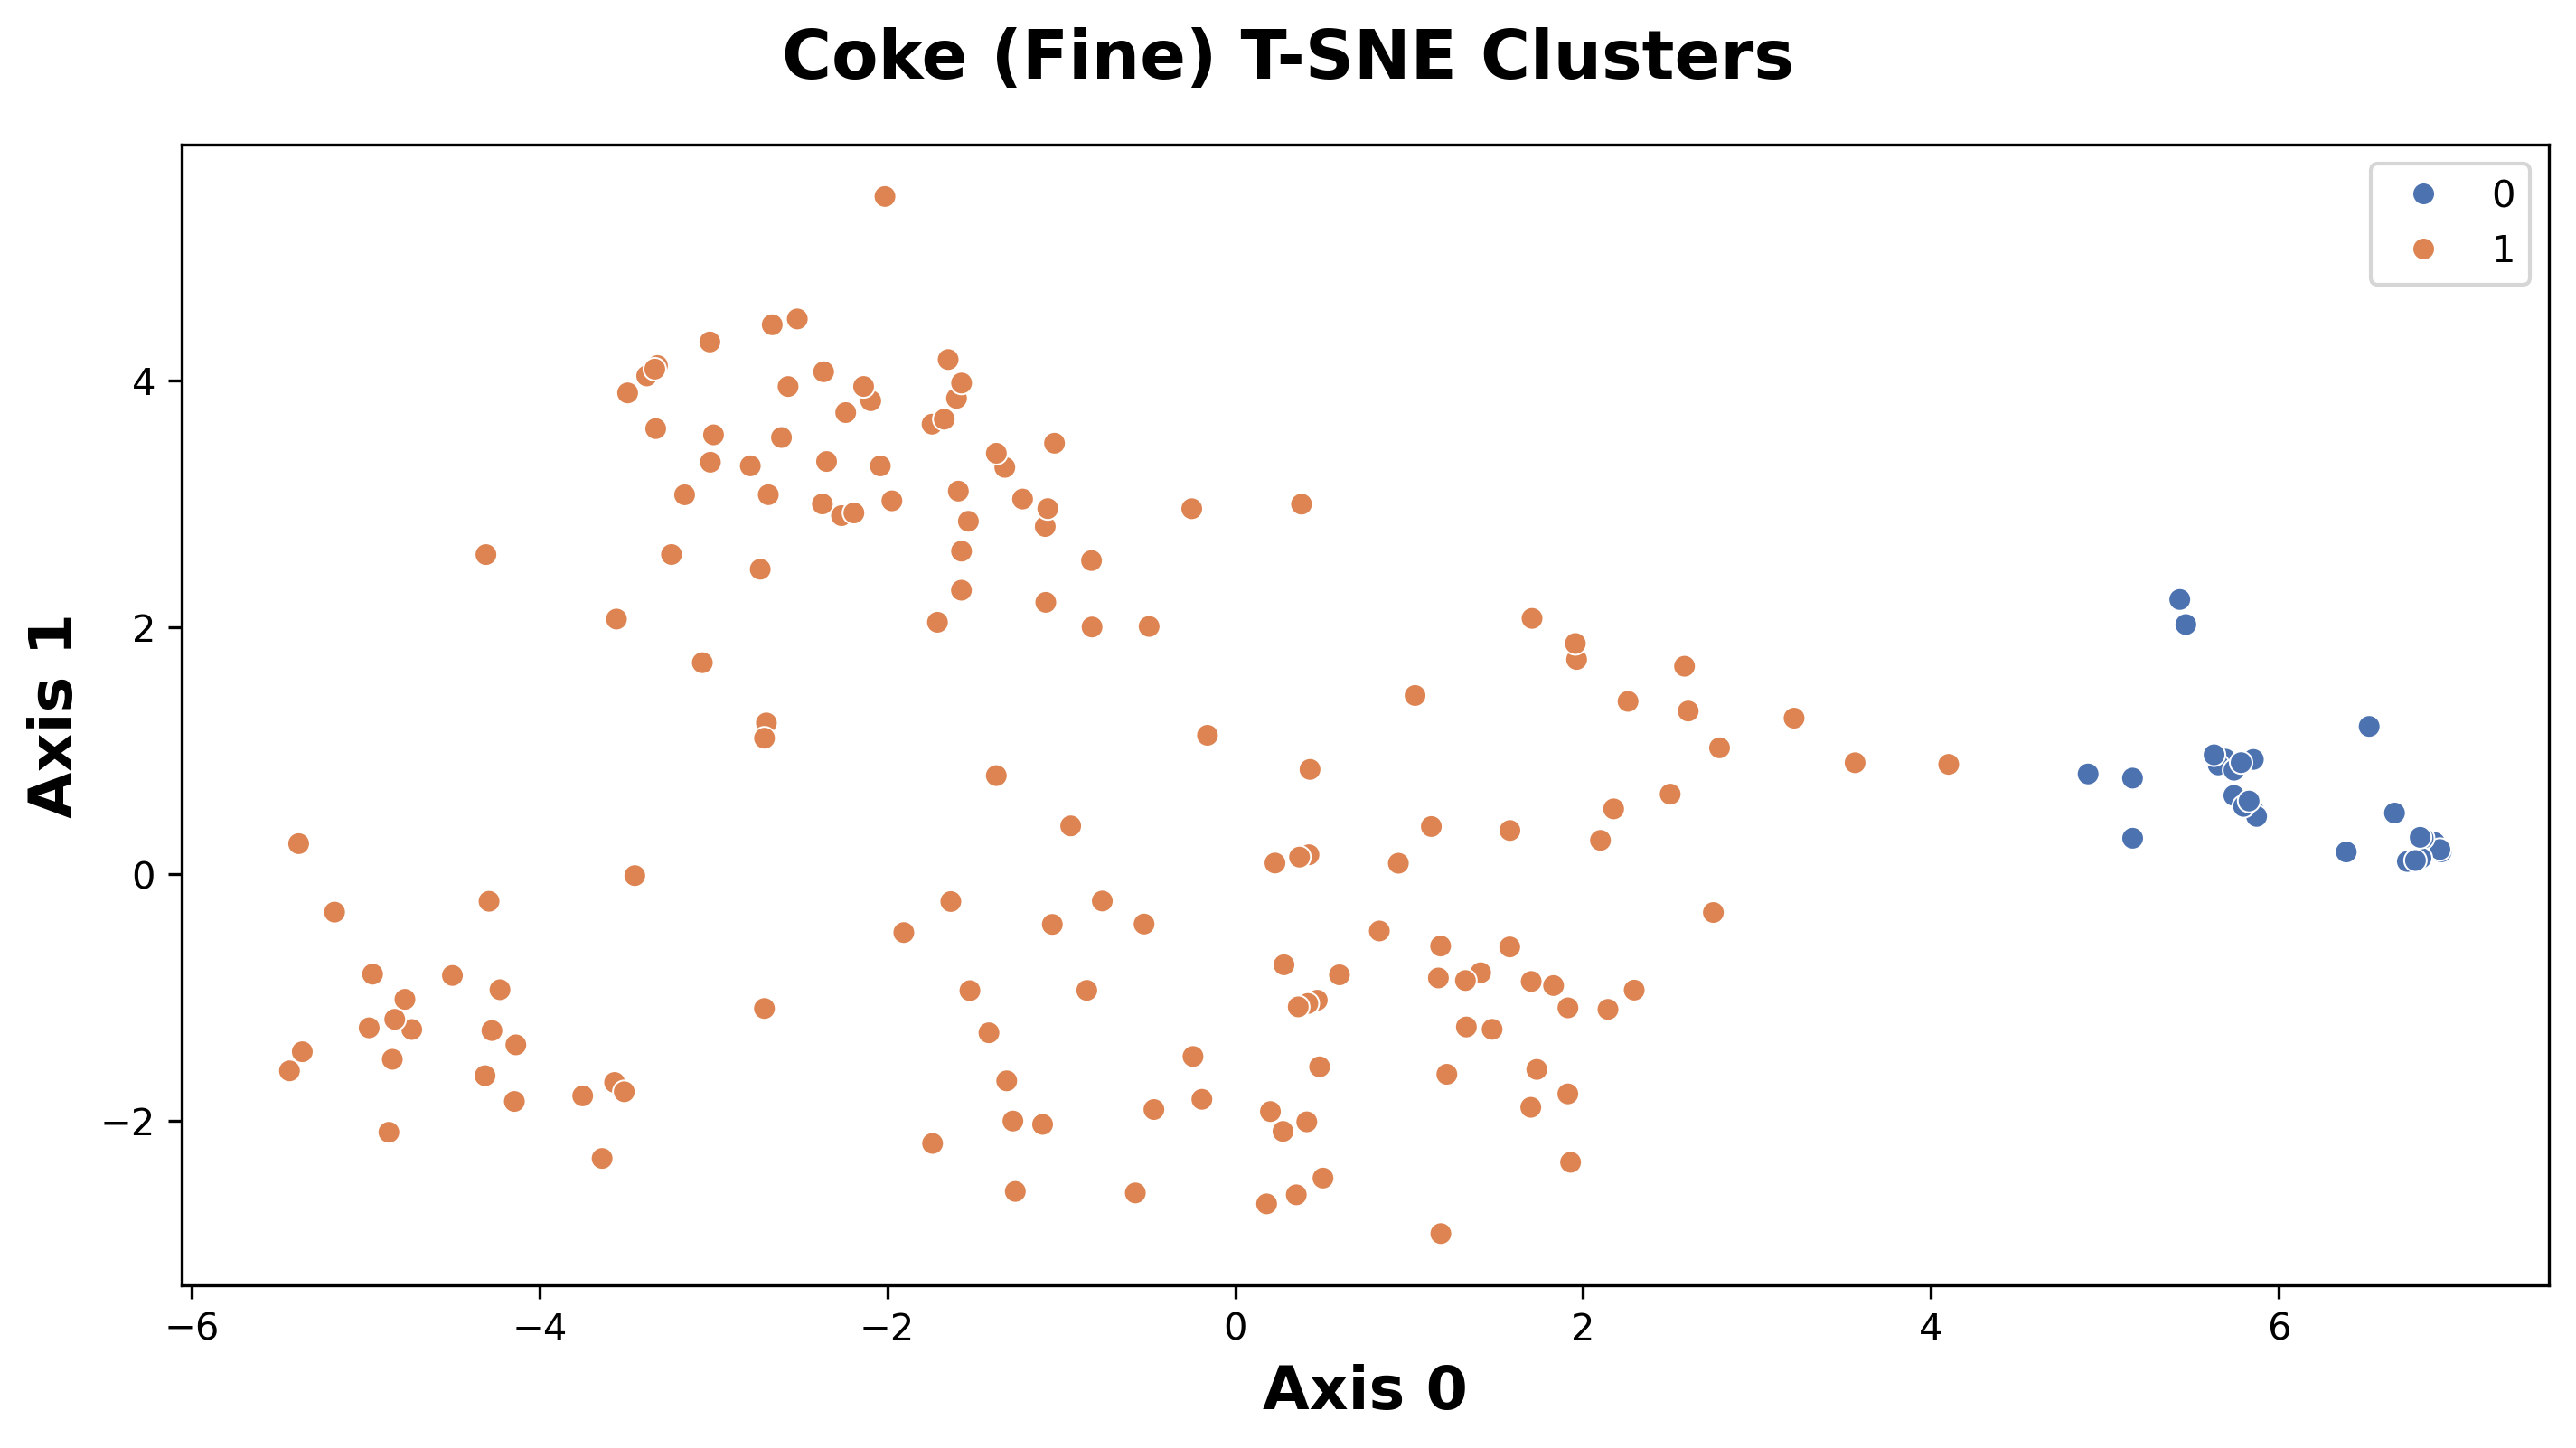

Index(['c (CokeFine)', 's (CokeFine)', 's05 (CokeFine)'], dtype='object')
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\4123717033.py:65: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\4123717033.py:65: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\4123717033.py:65: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(


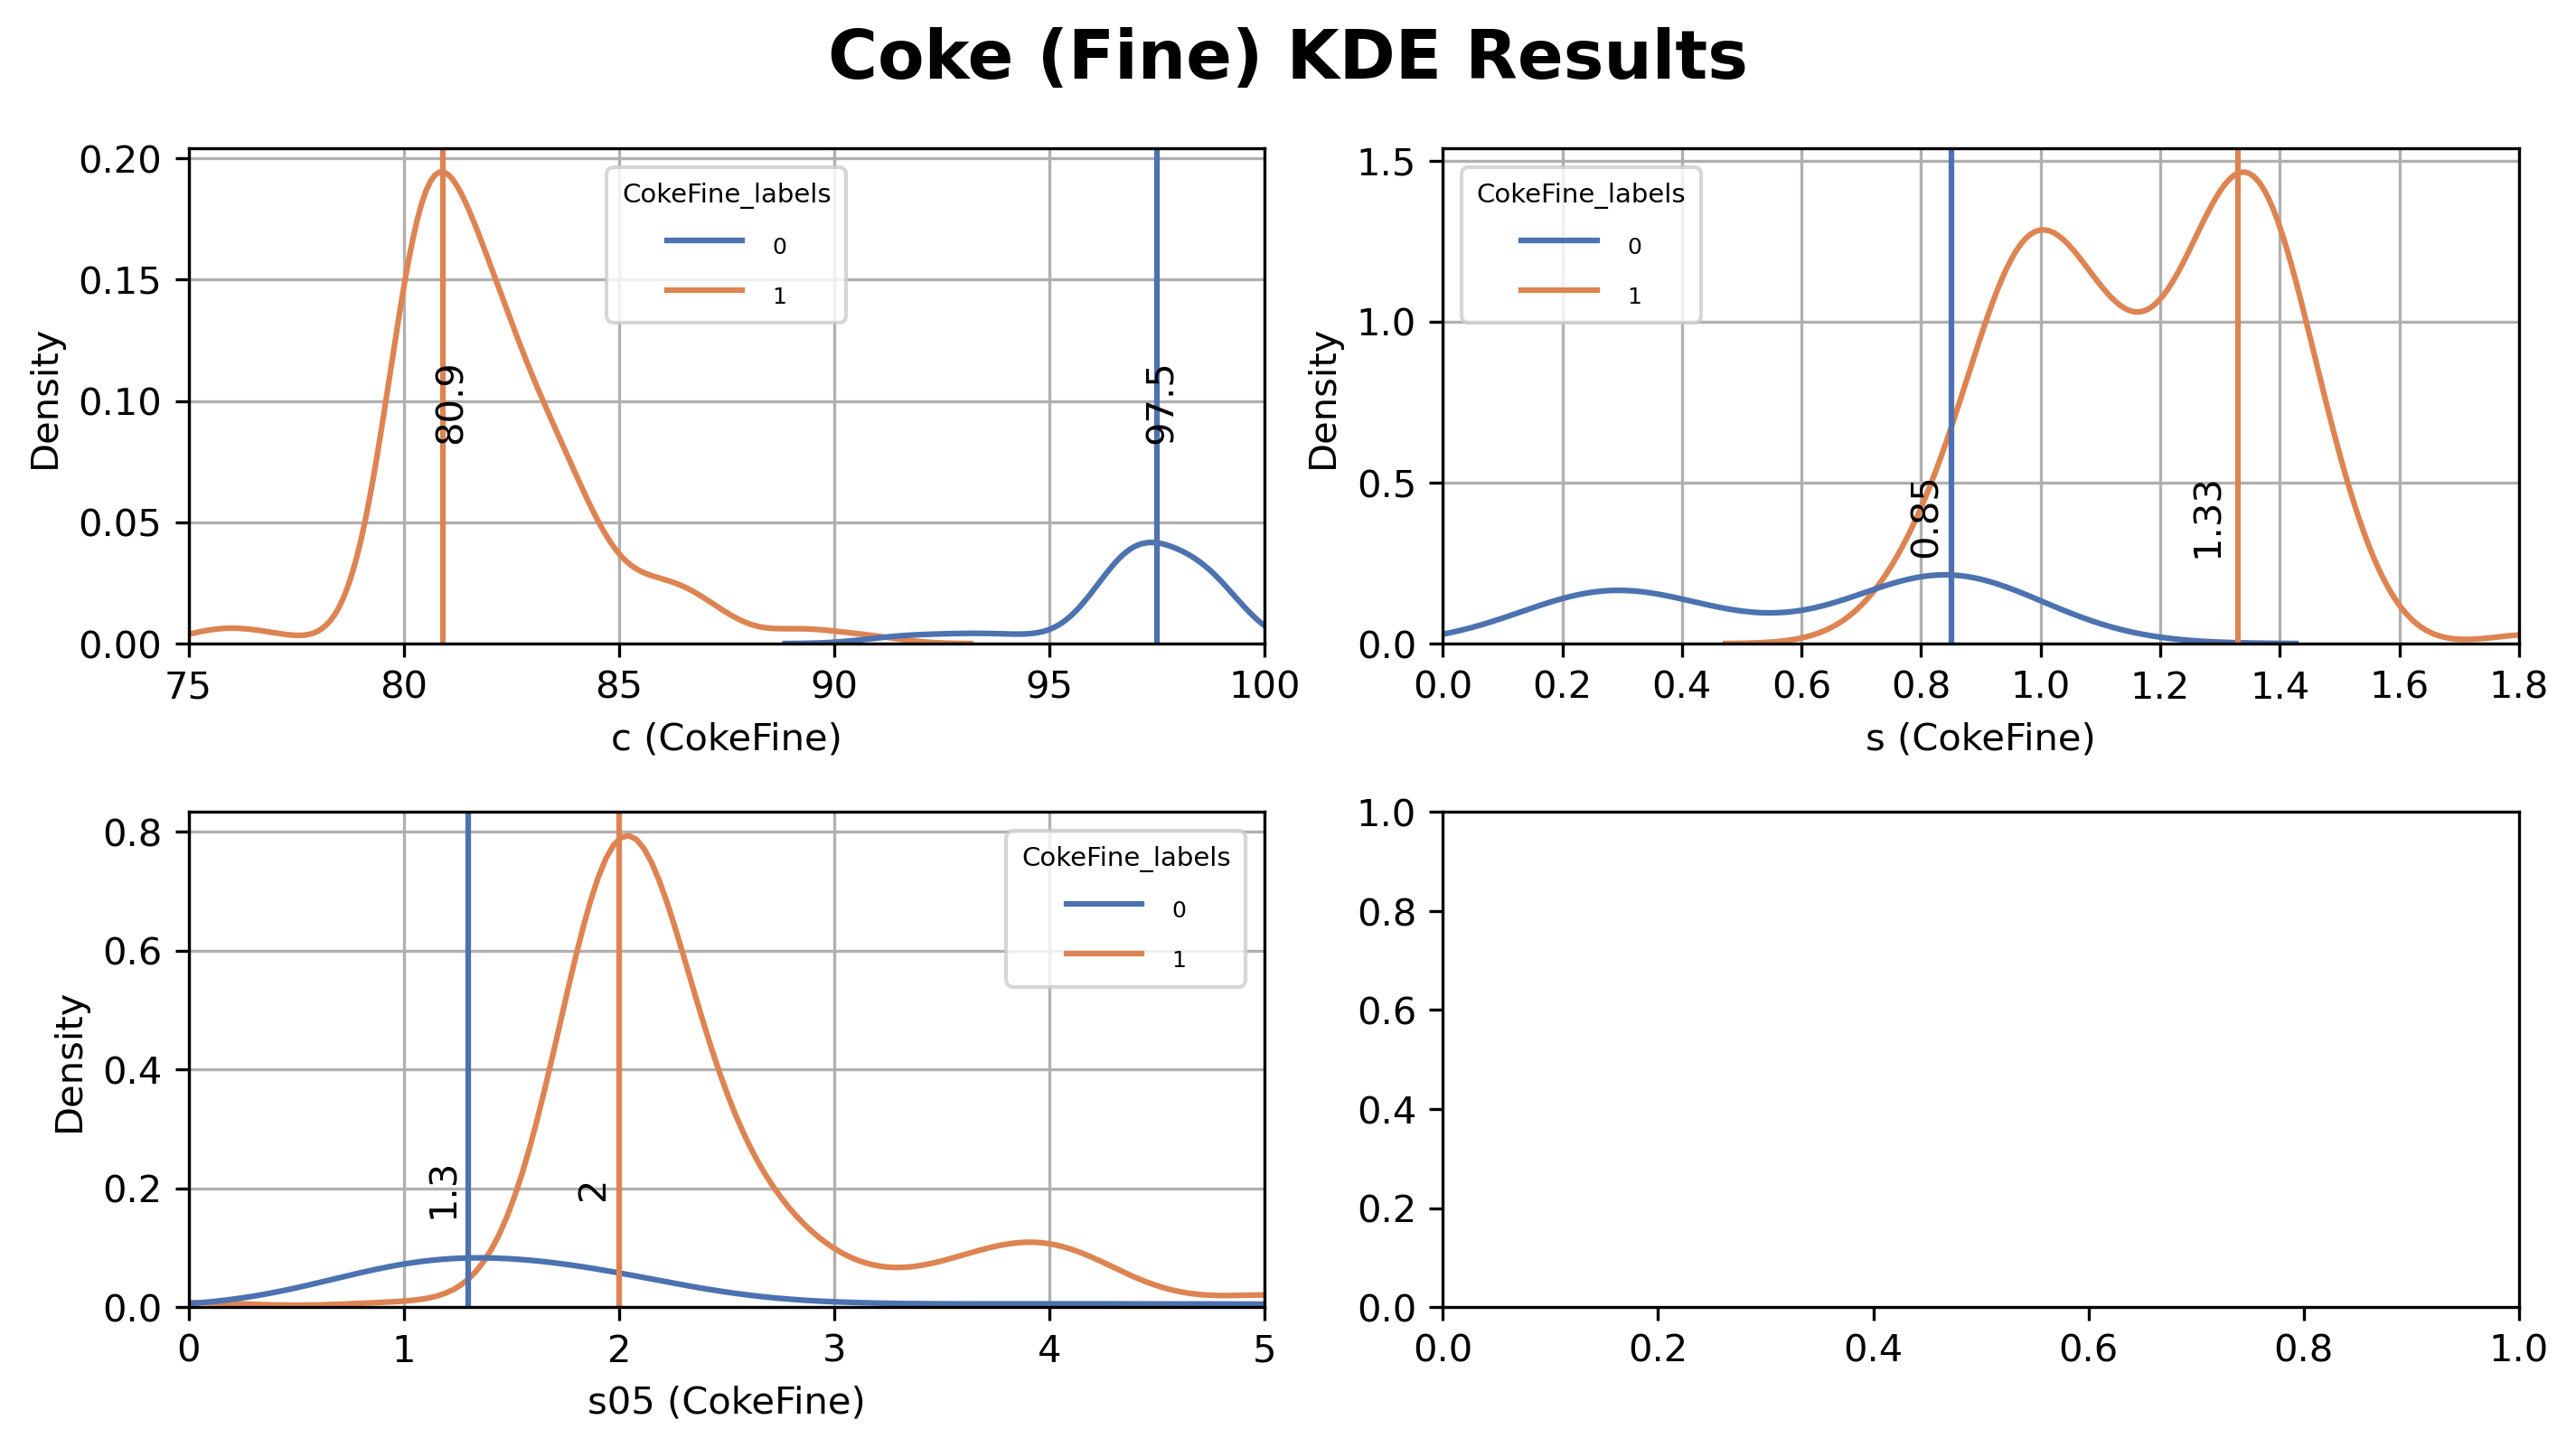

In [10]:
df = pd.read_csv(f"{working_dir}/data/coke_fine.csv")
df.set_index(keys='tar', inplace=True ,drop=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
#df.drop(labels=['humidity (CokeFine)','s05_335 (CokeFine)','s335 (CokeFine)'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=60)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 2, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
#----------Labeling---------
clust_lable_dict = {0:1,1:0,2:2}
labels = [clust_lable_dict[i] for i in model.labels_]
df["CokeFine_labels"] = labels
print(df.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('Coke (Fine) T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Axis 0', fontsize=16,fontweight='bold')
ax1.set_ylabel('Axis 1', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=df['CokeFine_labels'].values,
    palette= cmap,
    )
fig.tight_layout()
plt.savefig(f'{working_dir}/presentation/coke-fine-tsne-clusters.jpg')
plt.show()

#----------Labes Conditions-----
plot_name = df.columns.drop('CokeFine_labels')
print(plot_name)
num = 0
for k in range(1):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('Coke (Fine) KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,2)
    print(ax)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(2):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="CokeFine_labels",
                #hue_order=[0,2,3,],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            plt.setp(ax[i][j].get_legend().get_texts(), fontsize='6') # for legend text
            plt.setp(ax[i][j].get_legend().get_title(), fontsize='7') # for legend title
            num = num +1
    fig.tight_layout()
ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0][0].set_xlim(left=75,right=100)
ax[0][0].axvline(80.9,color=cmap[1])
ax[0][0].text(80.7, 0.1, '80.9', rotation=90, va='center')
ax[0][0].axvline(97.5,color=cmap[0])
ax[0][0].text(97.2, 0.1, '97.5', rotation=90, va='center')
#----------------------------------------
ax[0][1].set_xlim(left=0,right=1.8)
ax[0][1].axvline(1.33,color=cmap[1])
ax[0][1].text(1.25, 0.4, '1.33', rotation=90, va='center')
ax[0][1].axvline(0.85,color=cmap[0])
ax[0][1].text(0.78, 0.4, '0.85', rotation=90, va='center')
#--------------------------------------
ax[1][0].set_xlim(left=0,right=5)
ax[1][0].axvline(2,color=cmap[1])
ax[1][0].text(1.8, 0.2, '2', rotation=90, va='center')
ax[1][0].axvline(1.3,color=cmap[0])
ax[1][0].text(1.1, 0.2, '1.3', rotation=90, va='center')

plt.savefig(f'{working_dir}/presentation/coke-fine-kde-results.jpg')
plt.show()

# save For next use
df.to_csv(f"{working_dir}/data/coke_fine_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
4- خواندن دیتاهای خام مربوط به دولومیت 
</b>
</div>

In [12]:
df = pd.read_csv(f"{working_dir}/Raw-Data/dolo_Lab.csv",encoding='latin-1' )
print(f"size of raw data = {df.shape}")
#---------------------Drop Some Columns------------------
df.drop(labels=['sample_no','factory','s95_385','s385_1000'],axis=1,inplace=True)
#---------------------Filter Tarikh----------------------
df = df[df['tar'] >= 14020915]
#change type of tarikh column for grouping
df = df.astype({'tar': str})
print(f"from 14020915 to 14030915 = {df.shape}")
#group tarikh by Average of other columns
df = df.groupby('tar', as_index=False).mean().round(2)
df.reset_index(inplace=True ,drop=True)
print(f"After Grouping By Tarikh  = {df.shape}")
print(df.describe())
#---------prepare data for saving to csv file------
df.set_index(keys='tar', inplace=True ,drop=True)
df = df.add_suffix(' (Dolomite)')
#save prepared data for next
df.to_csv(f"{working_dir}/data/dolo.csv",index=True)
#remove dataframe from memory
del df

size of raw data = (4476, 8)
from 14020915 to 14030915 = (627, 4)
After Grouping By Tarikh  = (289, 4)
              cao         mgo       s0_95
count  289.000000  289.000000  289.000000
mean    55.067197   33.609619    2.683356
std      0.909331    0.807629    0.898629
min     49.930000   32.000000    0.000000
25%     54.570000   33.000000    2.000000
50%     54.900000   33.630000    2.670000
75%     55.550000   34.100000    3.500000
max     58.700000   38.200000    7.000000


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1-4 - خوشه بندی داده 
</b>
</div>

(289, 3)
(289, 3)
Empty DataFrame
Columns: []
Index: []
(289, 2)
(289,)
(289, 4)


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\485758496.py:38: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


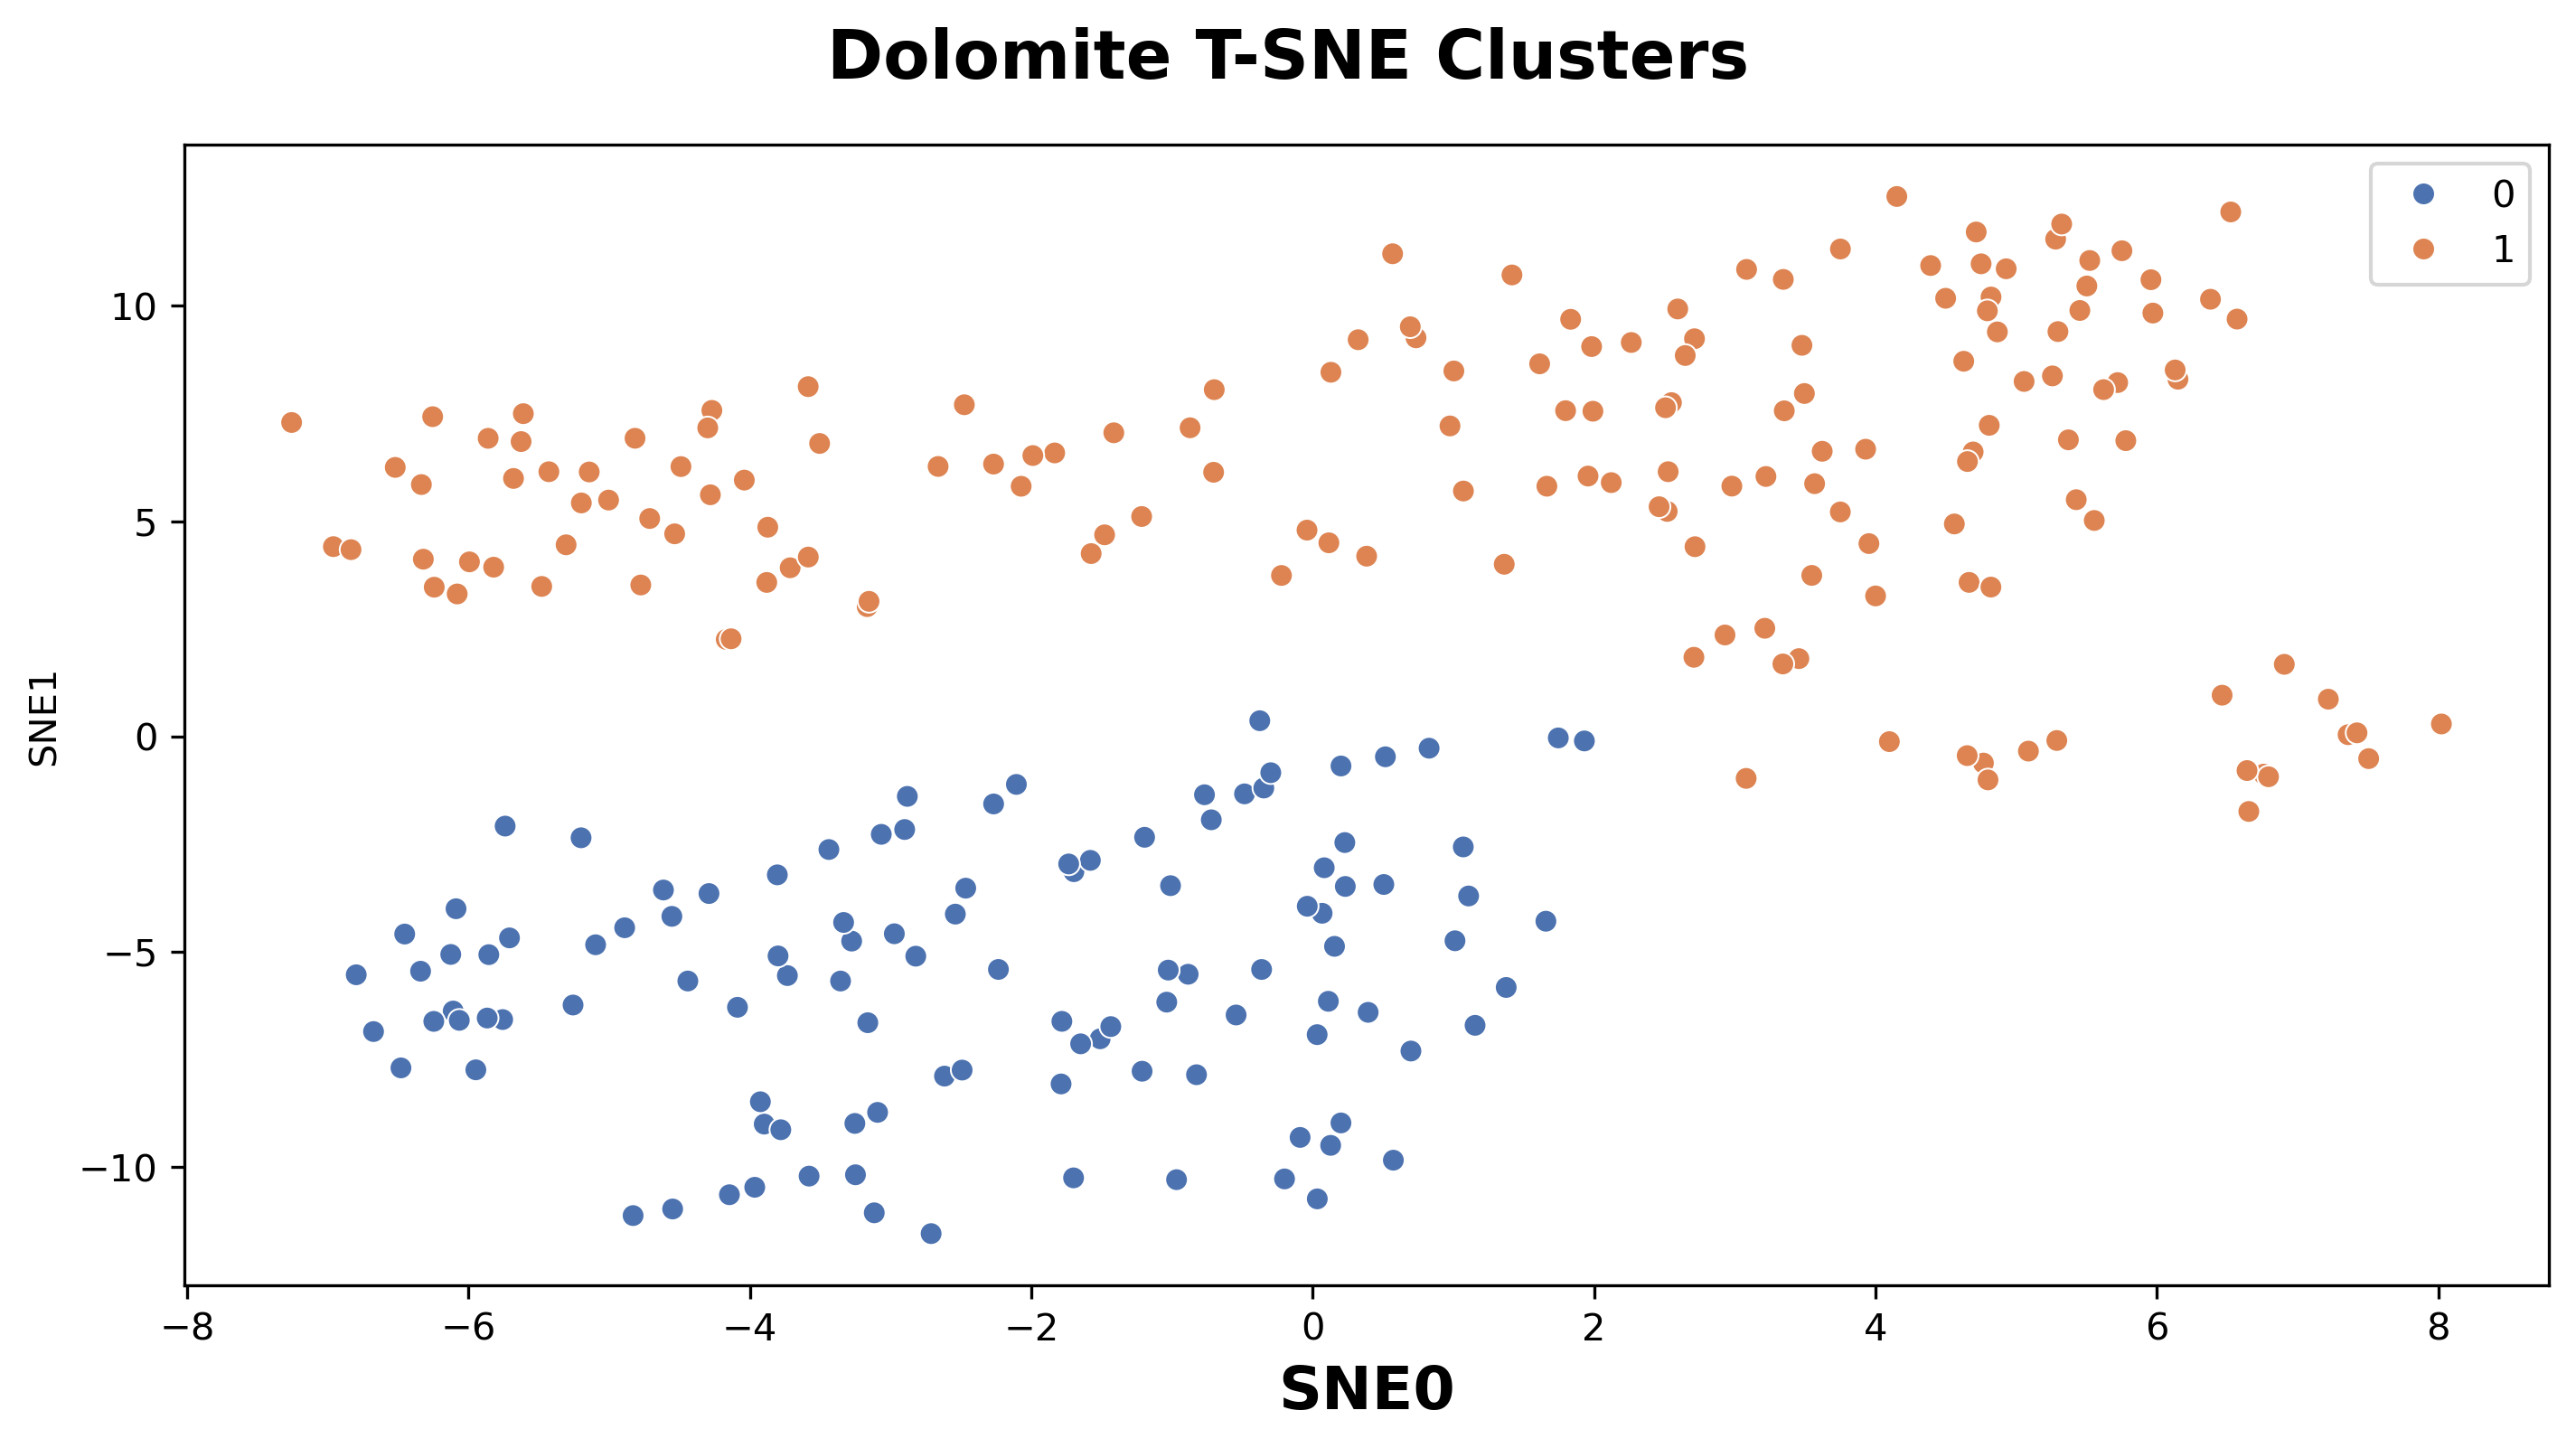

Index(['cao (Dolomite)', 'mgo (Dolomite)', 's0_95 (Dolomite)'], dtype='object')


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\485758496.py:63: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\485758496.py:63: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\485758496.py:63: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(


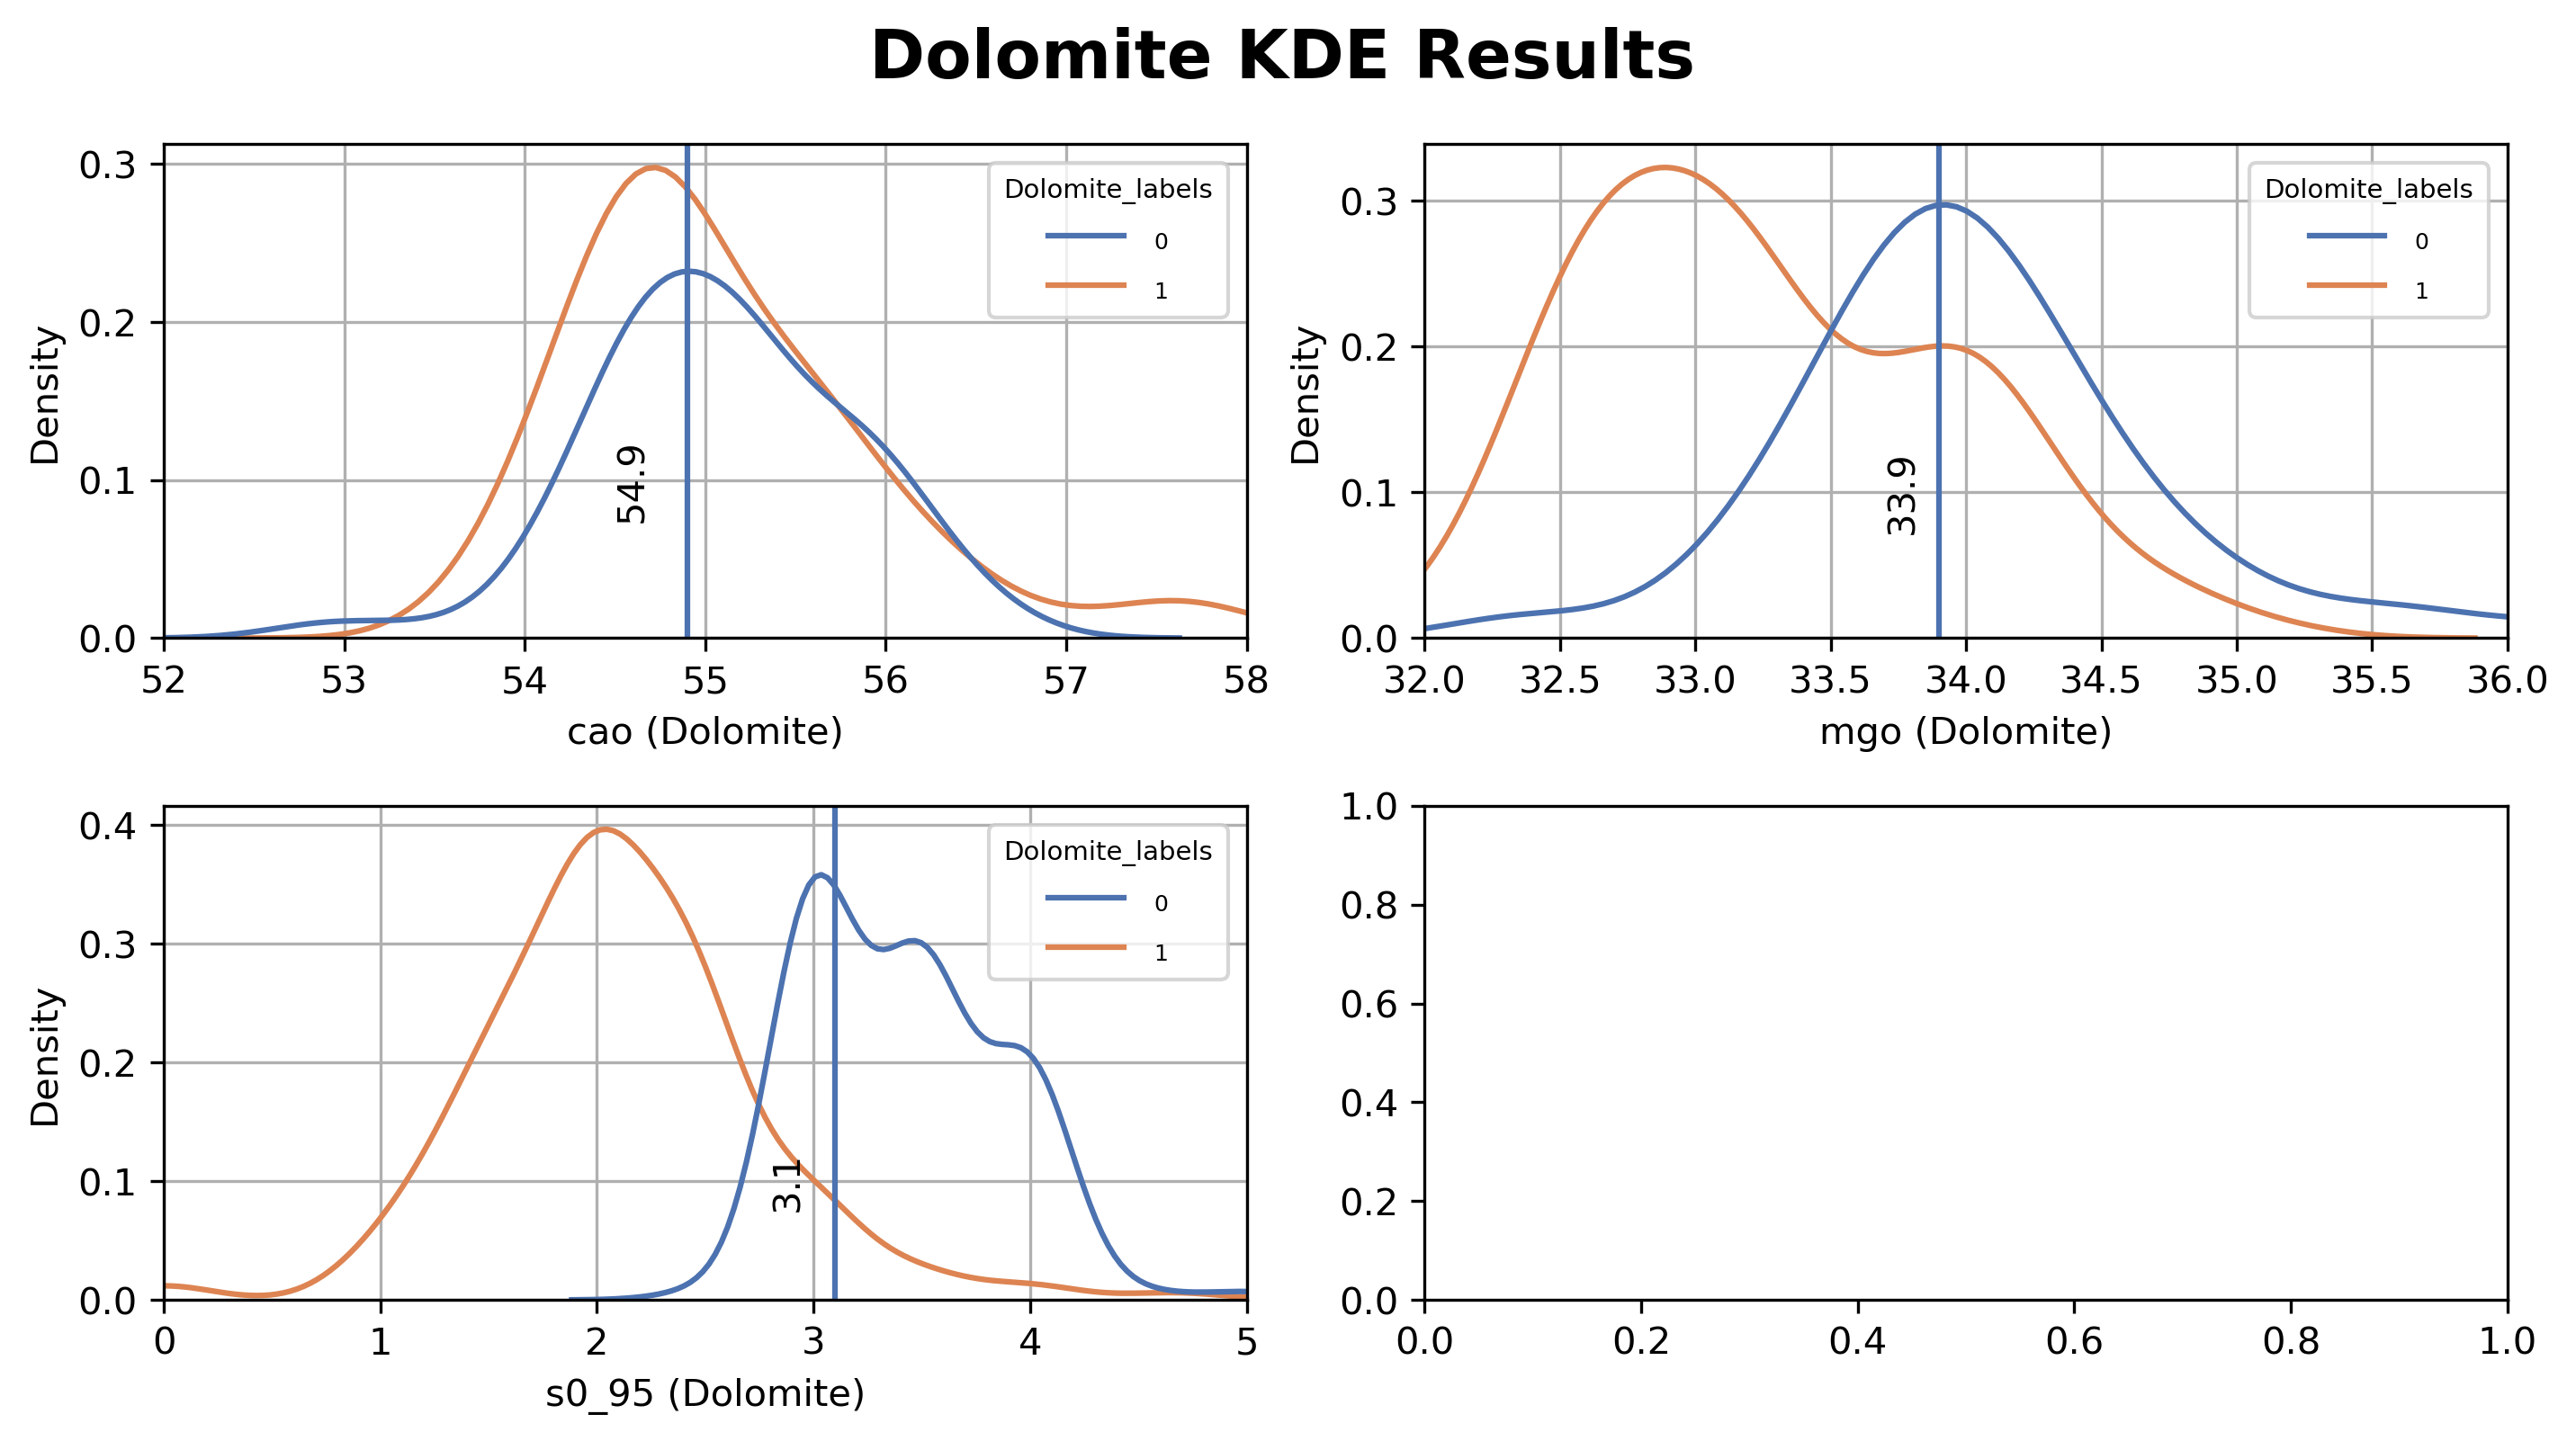

In [14]:
df = pd.read_csv(f"{working_dir}/data/dolo.csv")
df.set_index(keys='tar', inplace=True ,drop=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
#df.drop(labels=['s315'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=50)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 2, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
#----------Labeling---------
clust_lable_dict = {0:1,1:0}
labels = [clust_lable_dict[i] for i in model.labels_]
df["Dolomite_labels"] = labels
print(df.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('Dolomite T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('SNE0', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=df['Dolomite_labels'].values,
    palette= cmap,
    )
fig.tight_layout()
plt.savefig(f'{working_dir}/presentation/dolomite-tsne-clusters.jpg')
plt.show()

#----------Labes Conditions-----
plot_name = df.columns.drop(['Dolomite_labels'])
print(plot_name)
num = 0
for k in range(1):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('Dolomite KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,2)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(2):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="Dolomite_labels",
                #hue_order=[0,2,3,],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            plt.setp(ax[i][j].get_legend().get_texts(), fontsize='6') # for legend text
            plt.setp(ax[i][j].get_legend().get_title(), fontsize='7') # for legend title
            num = num +1
    fig.tight_layout()
#ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0][0].set_xlim(left=52,right=58)
ax[0][0].axvline(54.9,color=cmap[0])
ax[0][0].text(54.5, 0.1, '54.9', rotation=90, va='center')
#------------------------------------------
ax[0][1].set_xlim(left=32,right=36)
ax[0][1].axvline(33.9,color=cmap[0])
ax[0][1].text(33.7, 0.1, '33.9', rotation=90, va='center')
#--------------------------------------------
ax[1][0].set_xlim(left=0,right=5)
ax[1][0].axvline(3.1,color=cmap[0])
ax[1][0].text(2.8, 0.1, '3.1', rotation=90, va='center')
plt.savefig(f'{working_dir}/presentation/dolomite-kde-results.jpg')
plt.show()

# save For next use
df.to_csv(f"{working_dir}/data/dolo_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
5- خواندن دیتاهای خام مربوط به آهک 
</b>
</div>

In [16]:
df = pd.read_csv(f"{working_dir}/Raw-Data/lime_Lab.csv",encoding='latin-1' )
print(f"size of raw data = {df.shape}")
#------------------Drop Some Columns-----------------------
df.drop(labels=['sample_no','factory','s95_508'],axis=1,inplace=True)
#------------------Filter Tarikh---------------------------
df = df[df['tar'] >= 14020915]
#change type of tarikh column for grouping
df = df.astype({'tar': str})
print(f"from 14020915 to 14030915 = {df.shape}")
#group tarikh by Average of other columns
df = df.groupby('tar', as_index=False).mean().round(2)
df.reset_index(inplace=True ,drop=True)
print(f"After Grouping By Tarikh  = {df.shape}")
print(df.describe())
#------------------drop some columns because all time are 0.0----
df.drop(labels=['s0_5','s5_335','s335','s508'],axis=1,inplace=True)
#---------prepare data for saving to csv file------
df.set_index(keys='tar', inplace=True ,drop=True)
df = df.add_suffix(' (Lime)')
#save prepared data for next
df.to_csv(f"{working_dir}/data/lime.csv",index=True)
#remove dataframe from memory
del df

size of raw data = (8613, 11)
from 14020915 to 14030915 = (1077, 8)
After Grouping By Tarikh  = (316, 8)
              cao         mgo   s0_5  s5_335   s335       s0_95   s508
count  316.000000  316.000000  316.0   316.0  316.0  316.000000  316.0
mean    91.325348    1.218449    0.0     0.0    0.0    3.859810    0.0
std      0.537335    0.136190    0.0     0.0    0.0    2.072044    0.0
min     89.500000    0.800000    0.0     0.0    0.0    0.800000    0.0
25%     90.972500    1.200000    0.0     0.0    0.0    3.000000    0.0
50%     91.345000    1.200000    0.0     0.0    0.0    4.000000    0.0
75%     91.700000    1.200000    0.0     0.0    0.0    4.330000    0.0
max     93.100000    2.430000    0.0     0.0    0.0   27.580000    0.0


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1-5 - خوشه بندی داده 
</b>
</div>

(316, 3)
(316, 3)
Empty DataFrame
Columns: []
Index: []
(316, 2)
(316,)
(316, 4)


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3191086002.py:39: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


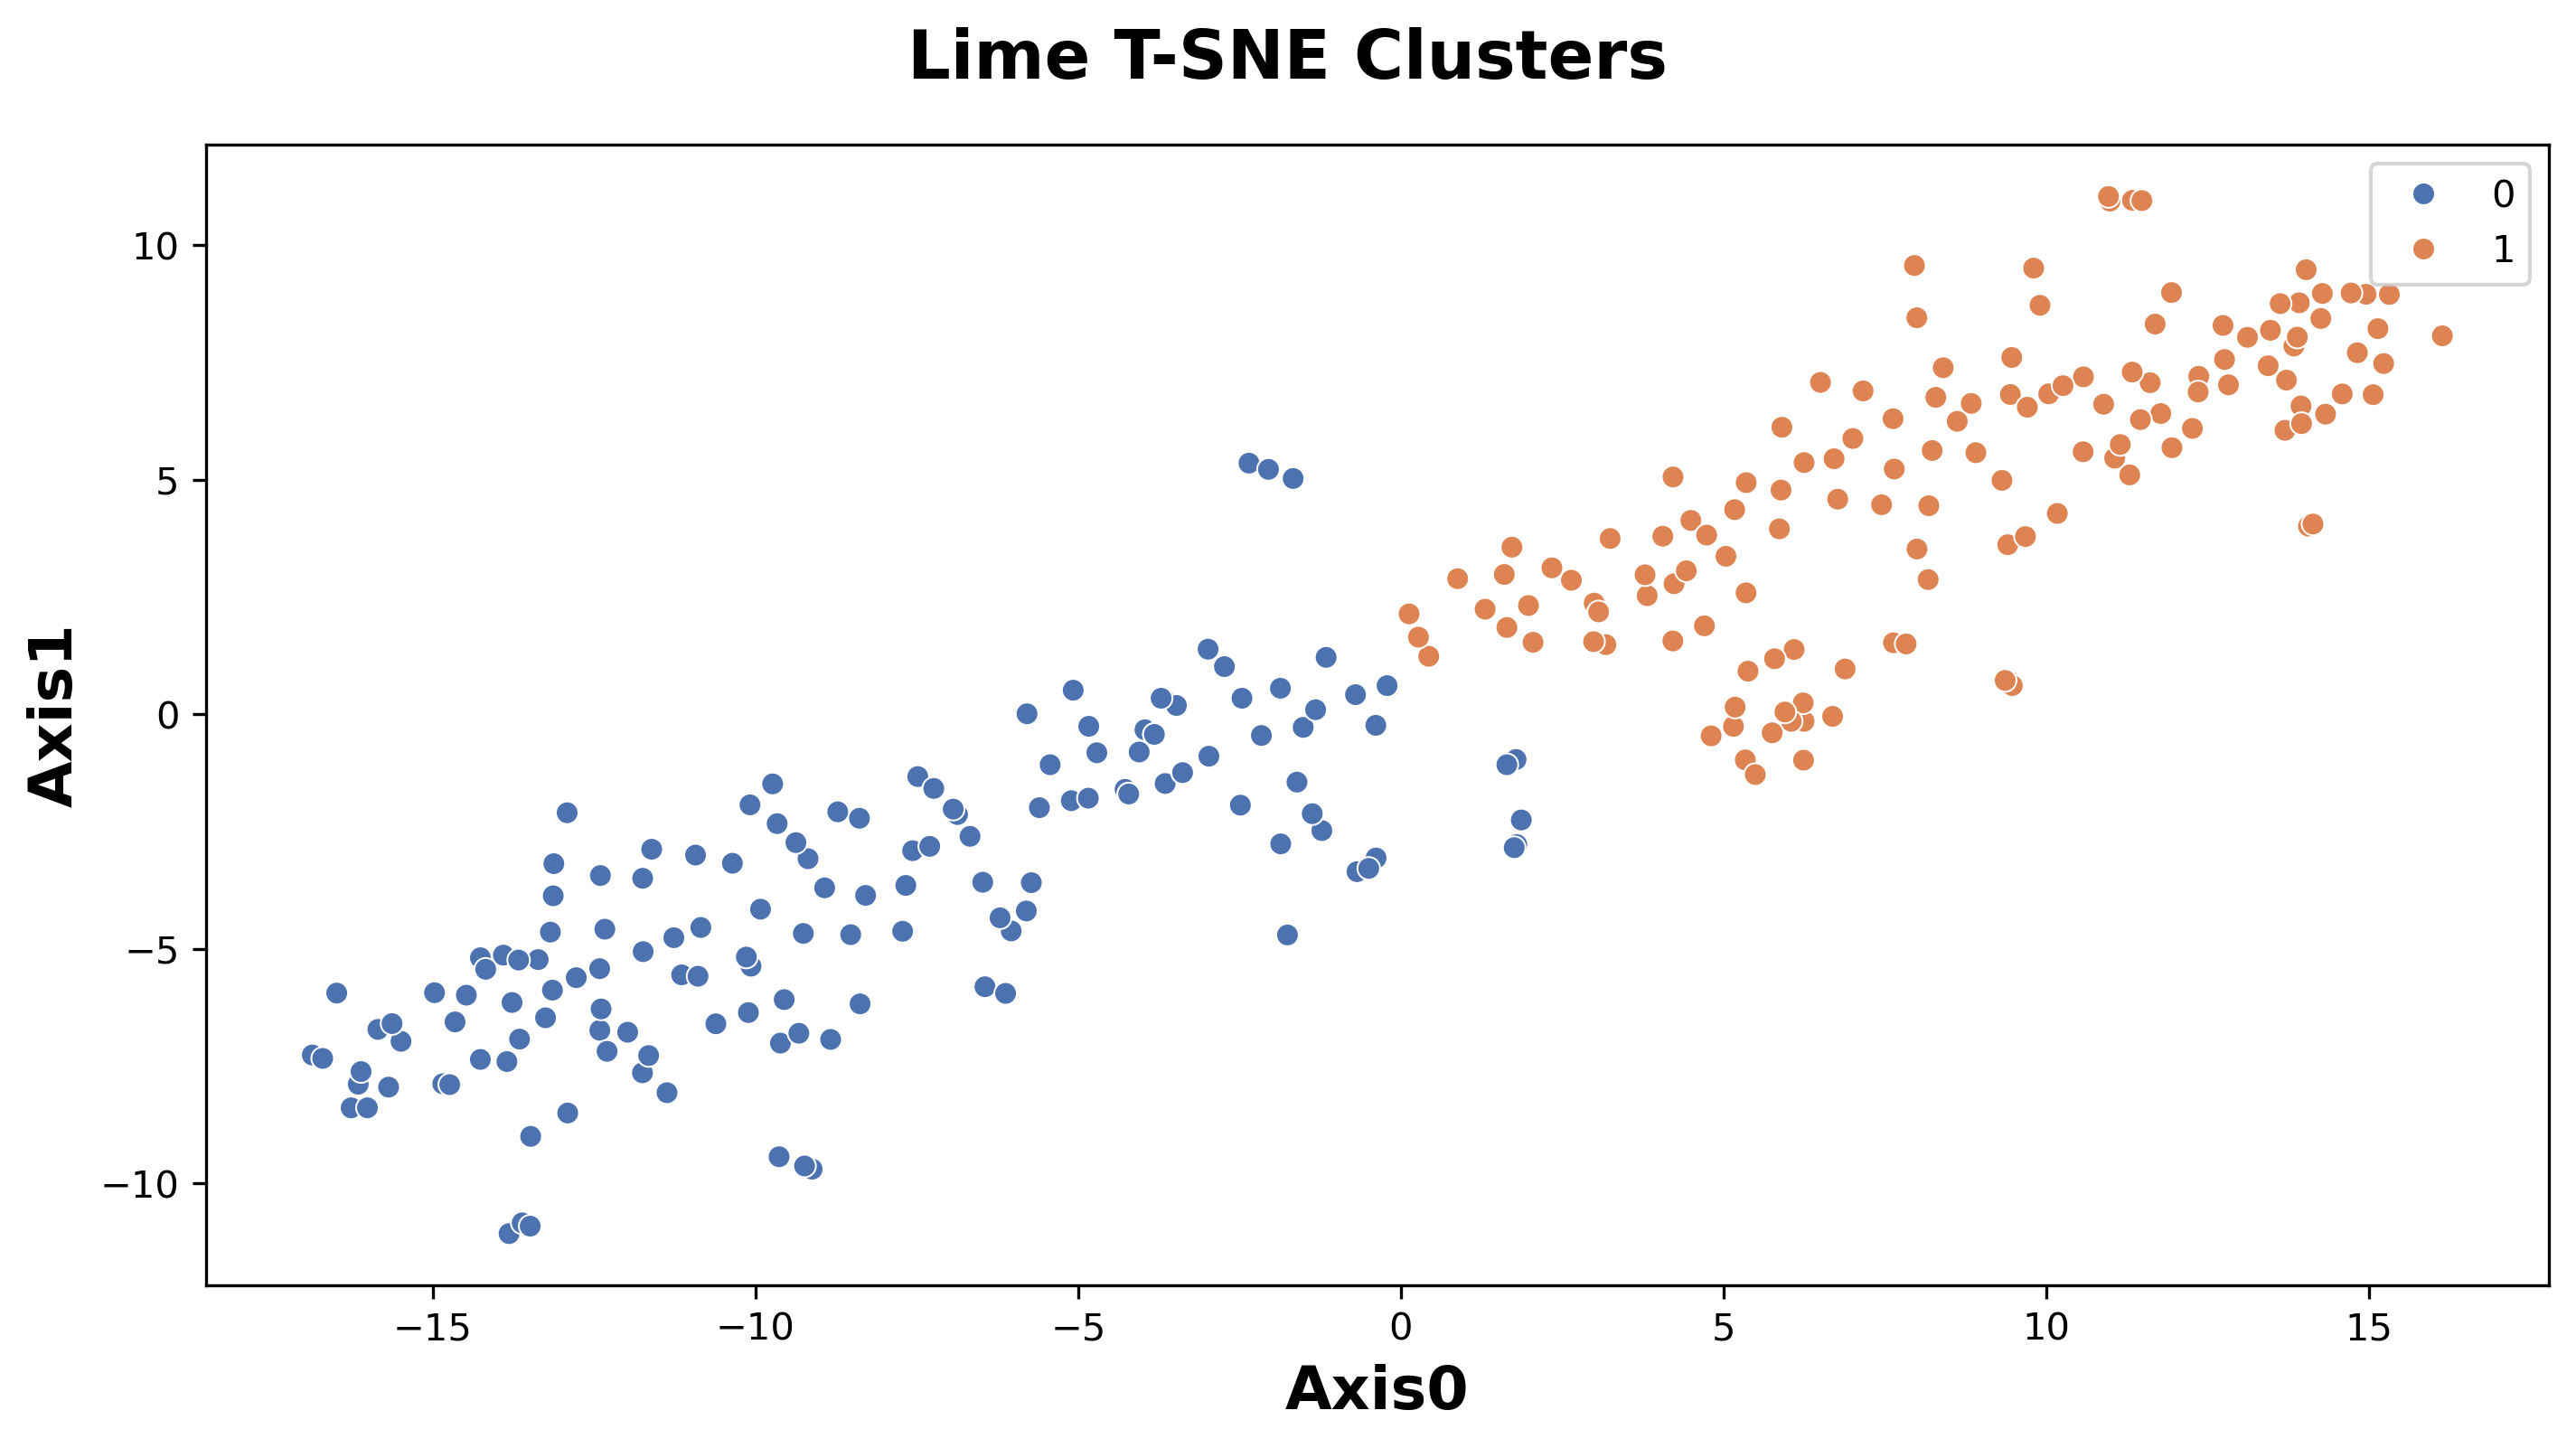

Index(['cao (Lime)', 'mgo (Lime)', 's0_95 (Lime)'], dtype='object')


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3191086002.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3191086002.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3191086002.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(


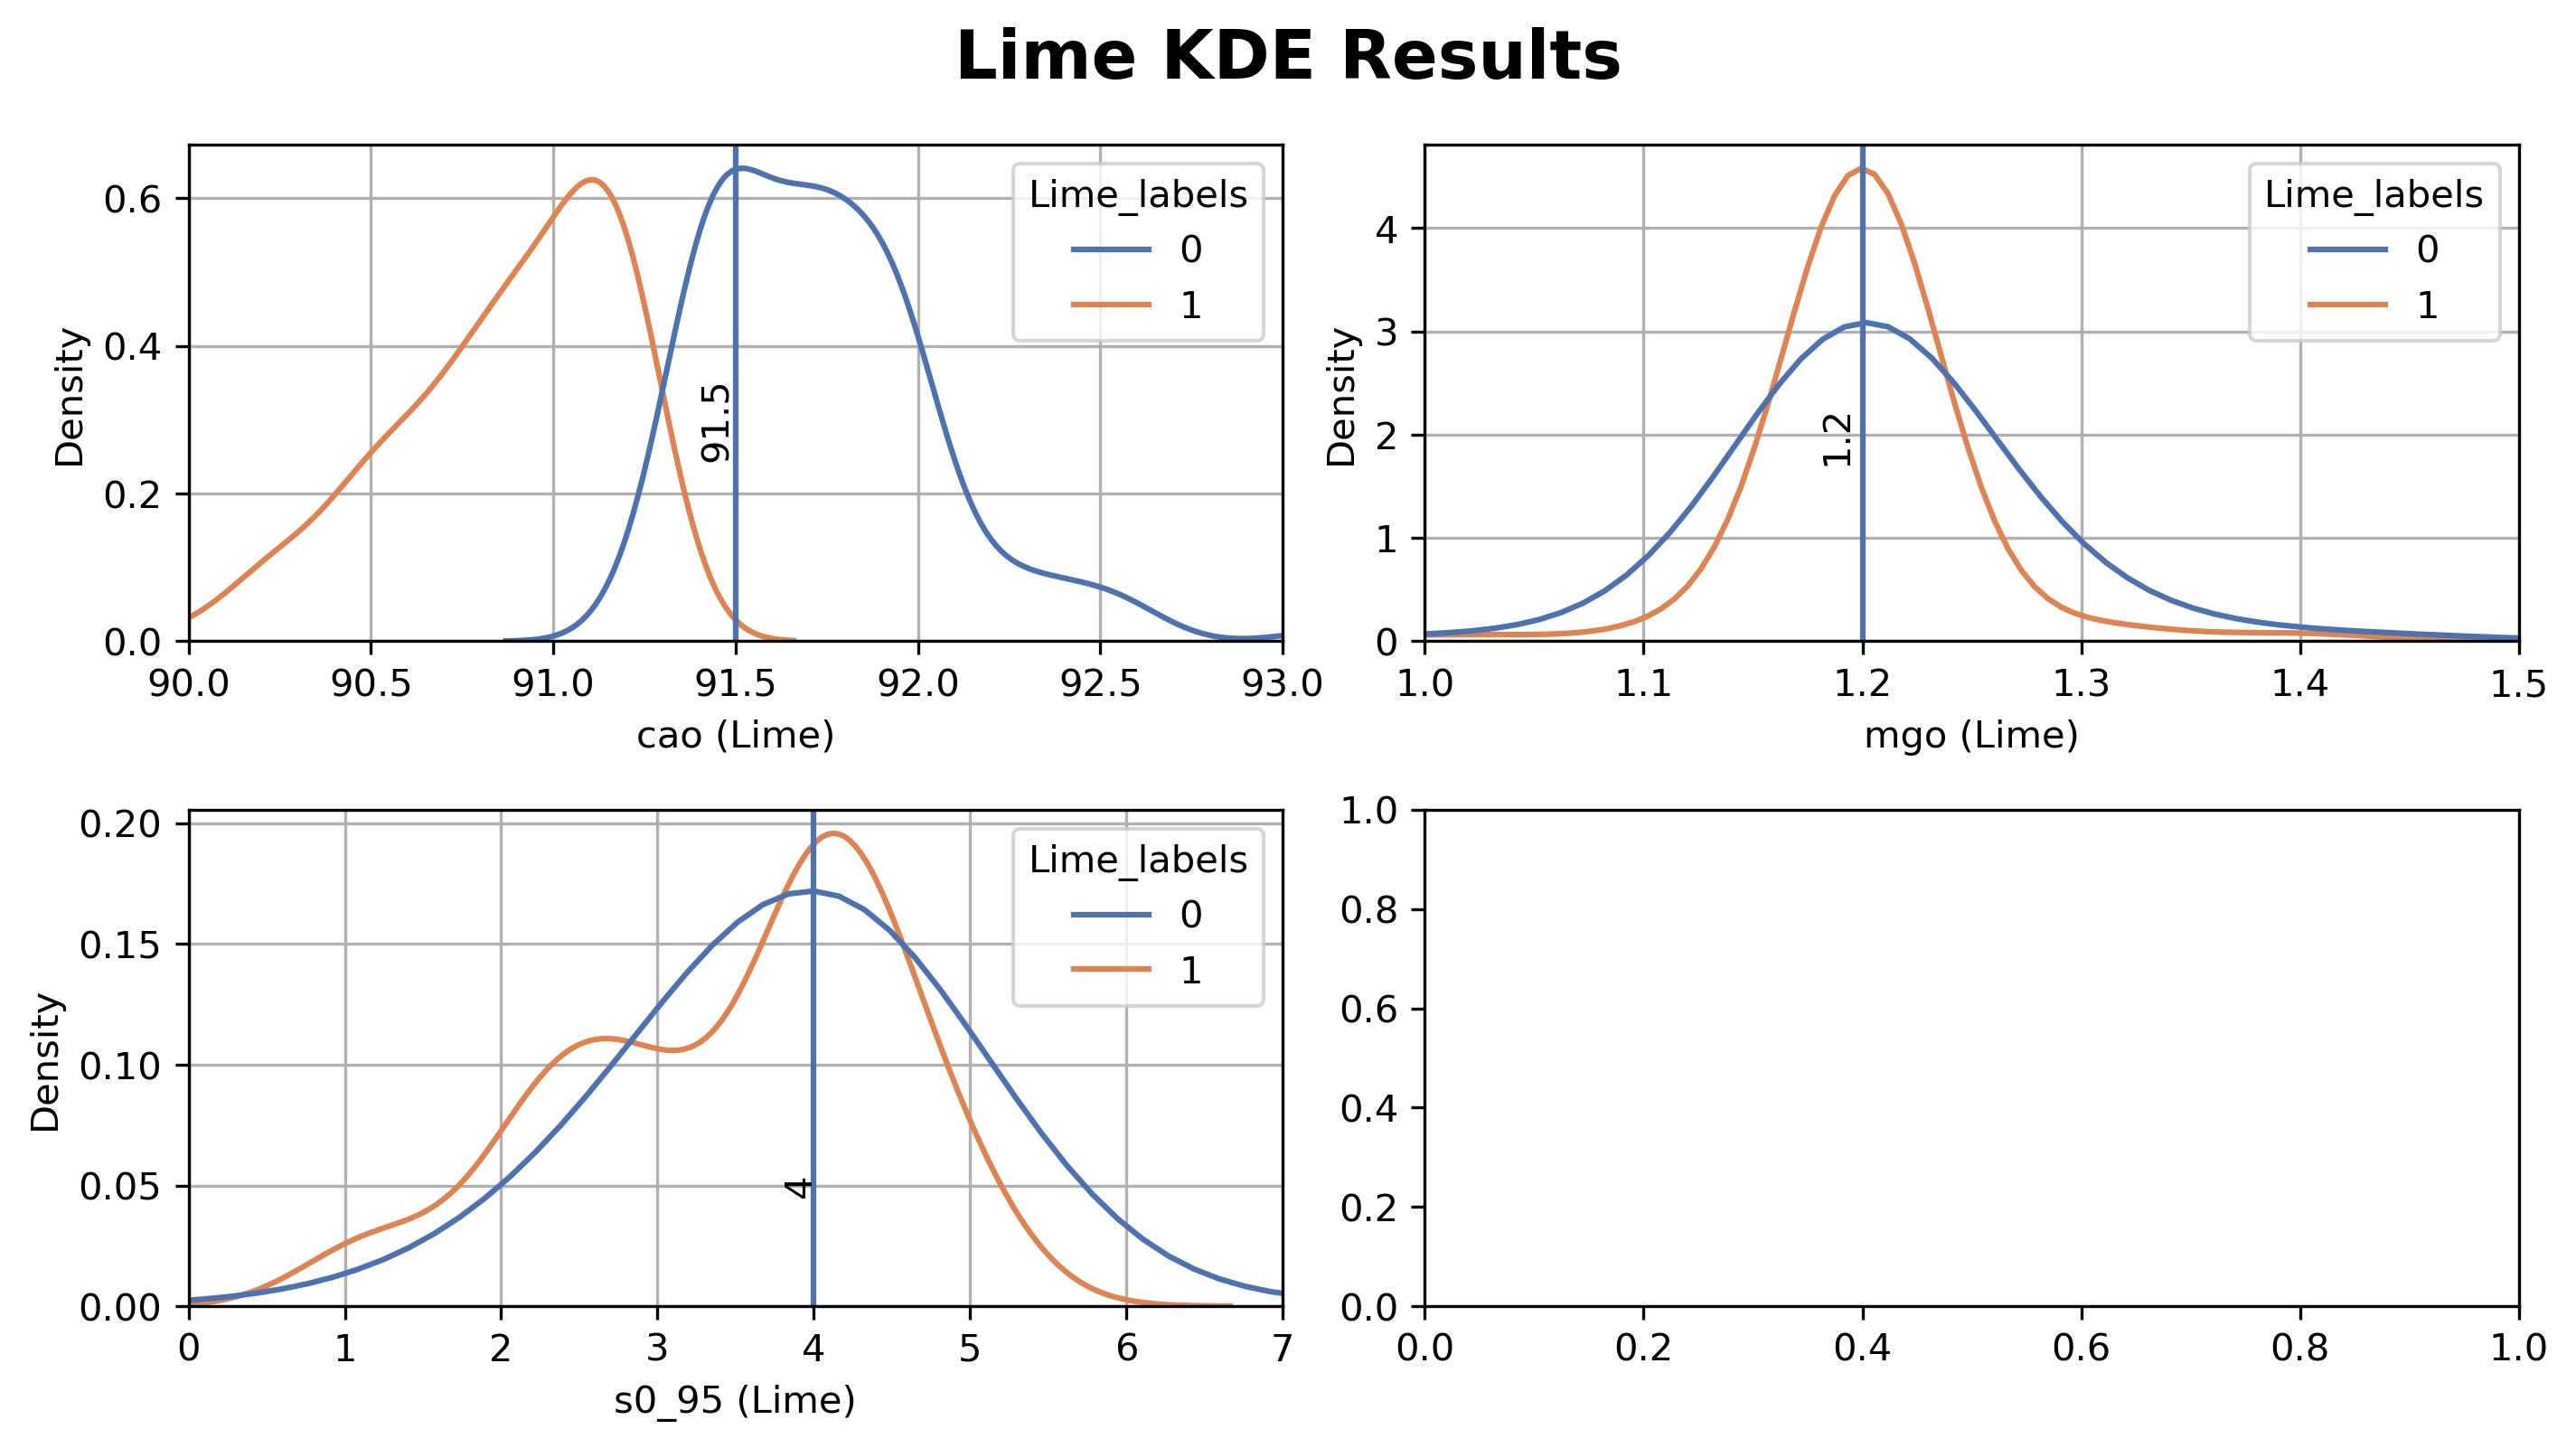

In [18]:
df = pd.read_csv(f"{working_dir}/data/lime.csv")
df.set_index(keys='tar', inplace=True ,drop=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
#df.drop(labels=['s95_508 (Lime)'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=50)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 2, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
#----------Labeling---------
clust_lable_dict = {0:0,1:1}
labels = [clust_lable_dict[i] for i in model.labels_]
df["Lime_labels"] = labels
print(df.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('Lime T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Axis0', fontsize=16,fontweight='bold')
ax1.set_ylabel('Axis1', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=df['Lime_labels'].values,
    palette= cmap,
    )
fig.tight_layout()
plt.savefig(f'{working_dir}/presentation/lime-tsne-clusters.jpg')
plt.show()

#----------Labes Conditions-----
plot_name = df.columns.drop('Lime_labels')
print(plot_name)
num = 0
for k in range(1):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('Lime KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,2)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(2):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="Lime_labels",
                #hue_order=[0,2,3,],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            num = num +1
    fig.tight_layout()

ax[0][0].set_xlim(left=90,right=93)
ax[0][0].axvline(91.5,color=cmap[0])
ax[0][0].text(91.4, 0.3, '91.5', rotation=90, va='center')
#------------------------------------------------
ax[0][1].axvline(1.2,color=cmap[0])
ax[0][1].text(1.18, 2, '1.2', rotation=90, va='center')
ax[0][1].set_xlim(left=1,right=1.5)
#--------------------------------------------------------
ax[1][0].axvline(4,color=cmap[0])
ax[1][0].text(3.8, 0.05, '4', rotation=90, va='center')
ax[1][0].set_xlim(left=0,right=7)
plt.savefig(f'{working_dir}/presentation/lime-kde-results.jpg')
plt.show()

# save For next use
df.to_csv(f"{working_dir}/data/lime_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
6- خواندن دیتاهای خام مربوط به DRI 
</b>
</div>

size of raw data = (8364, 21)
from 14020915 to 14030915 = (1947, 8)


/tmp/ipykernel_7158/864113288.py:19: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


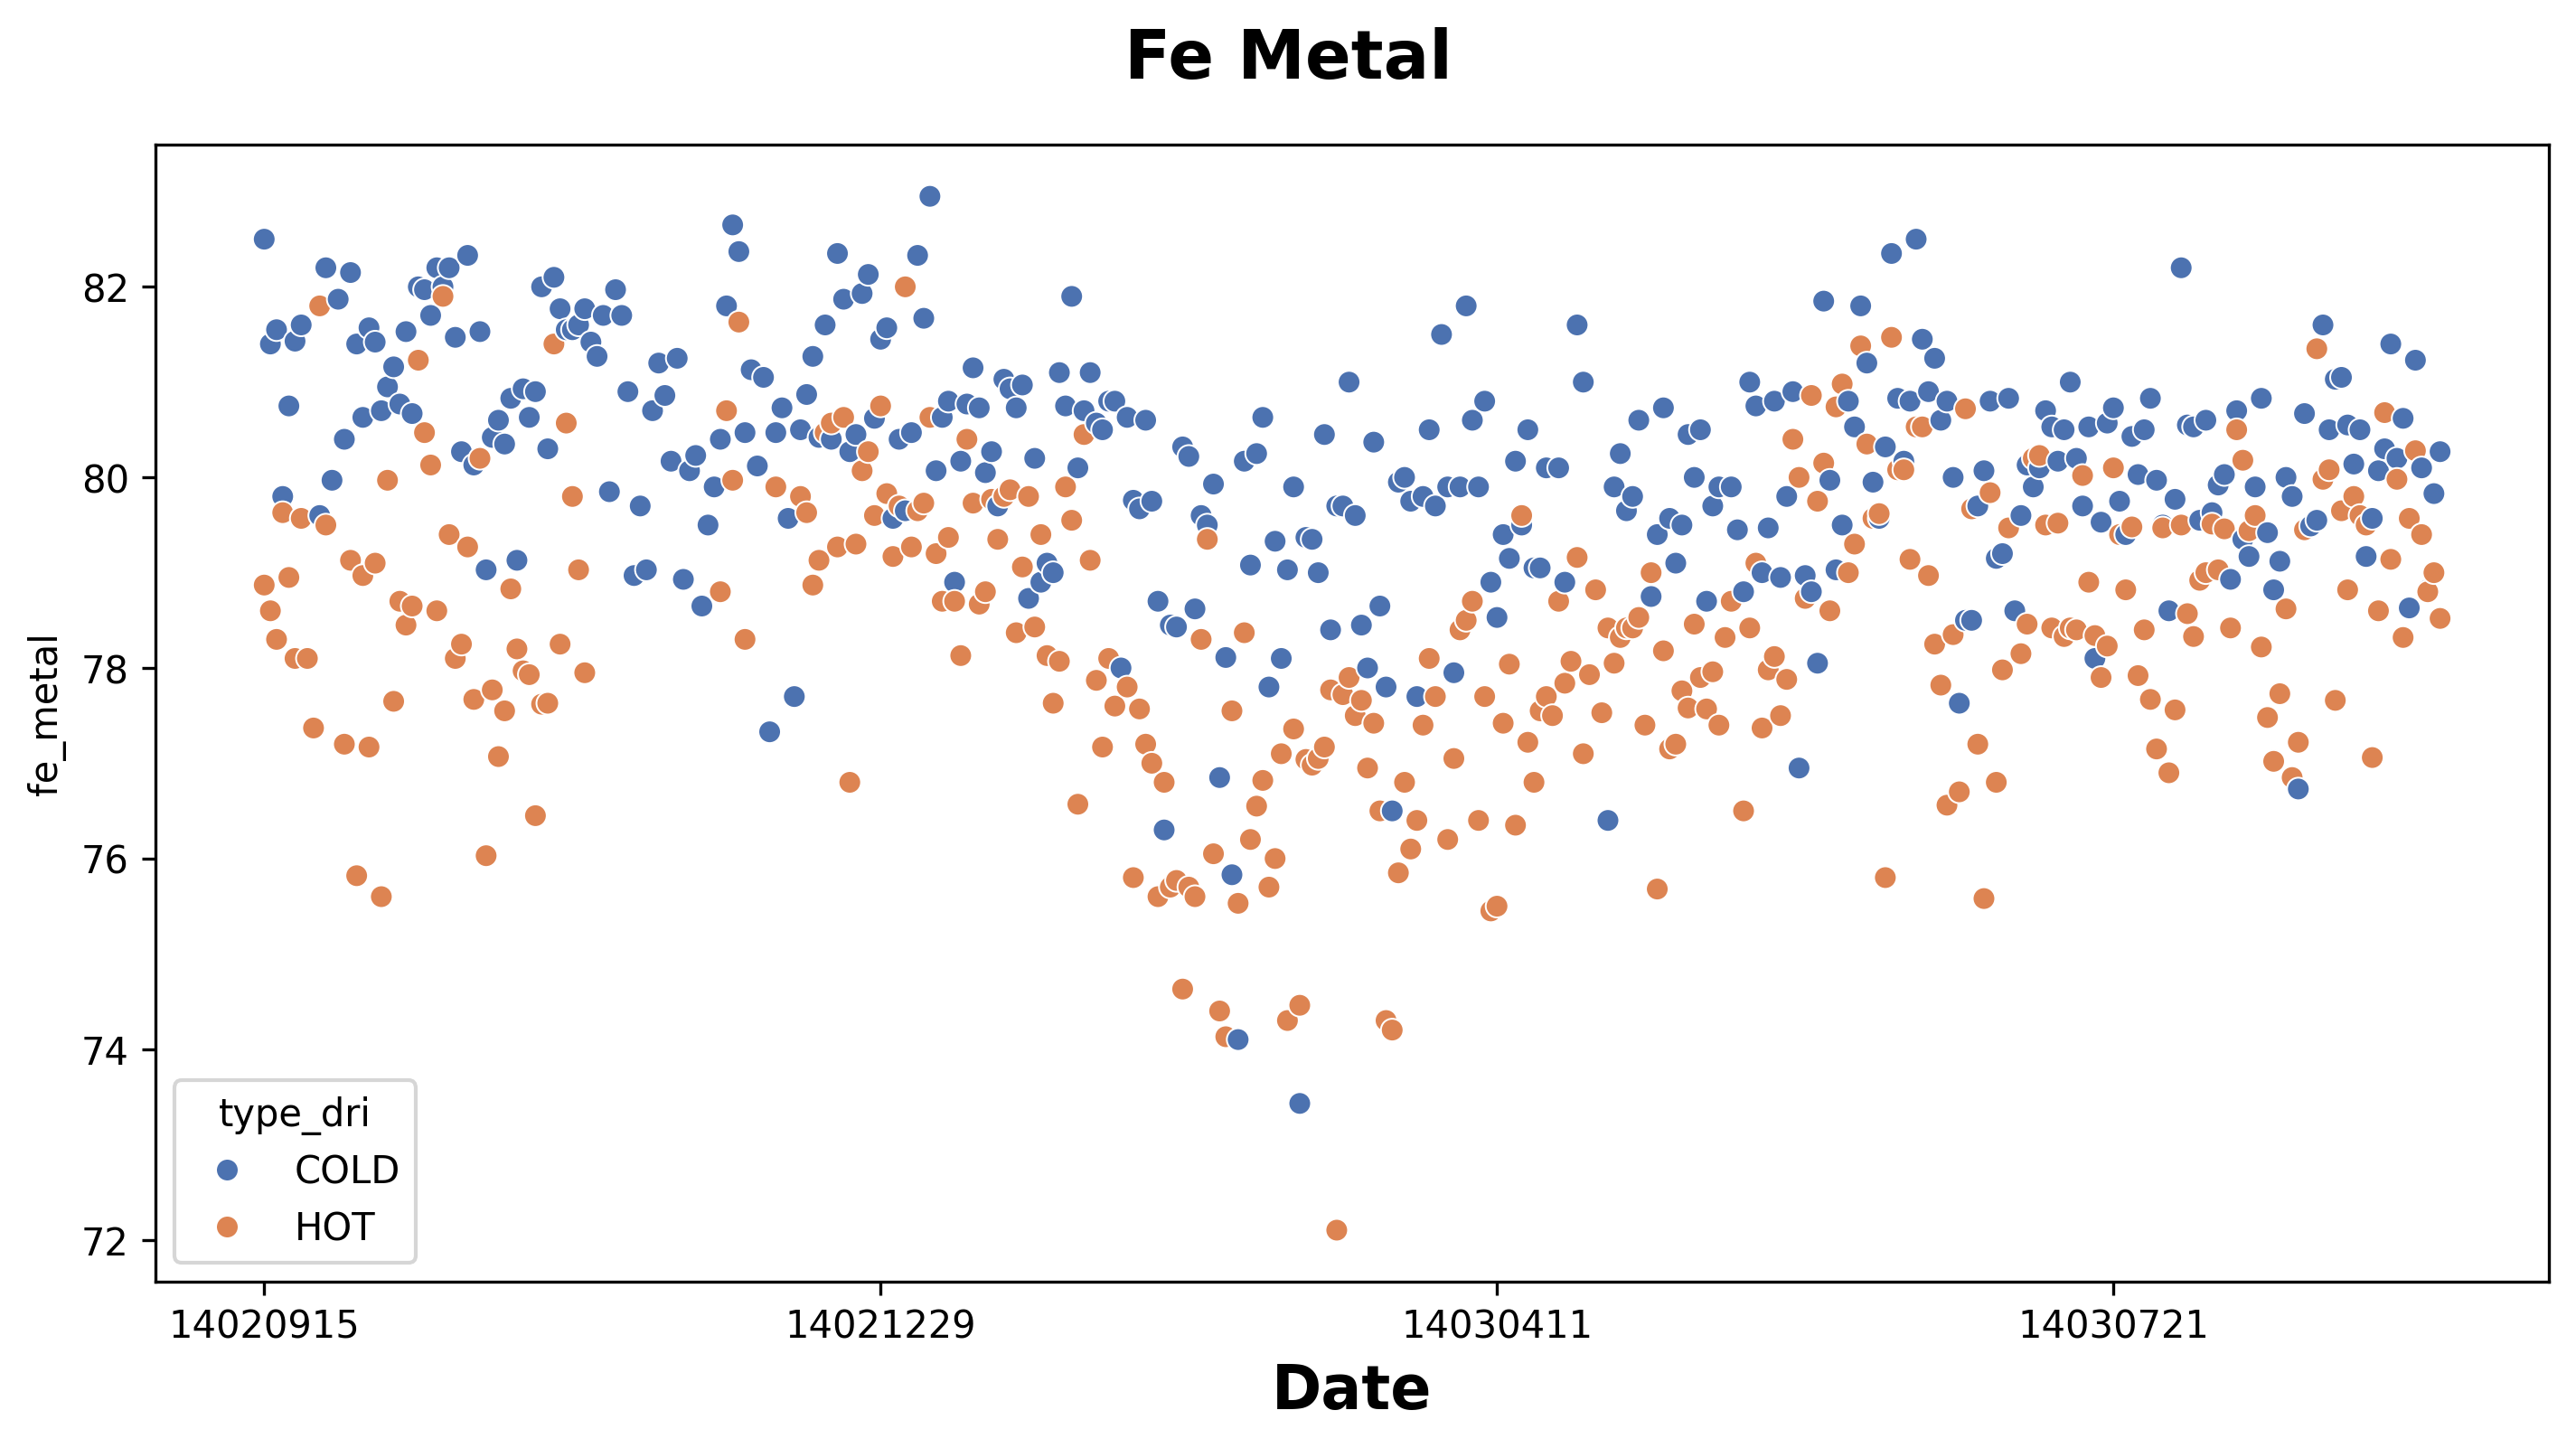

(345, 8) (319, 8)
After Grouping By Tarikh  = (345, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 0 to 662
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tar       345 non-null    object 
 1   fe_metal  345 non-null    float64
 2   fe_total  345 non-null    float64
 3   md        345 non-null    float64
 4   c         345 non-null    float64
 5   gunge     345 non-null    float64
 6   feo       345 non-null    float64
dtypes: float64(6), object(1)
memory usage: 21.6+ KB
None


In [ ]:
df = pd.read_csv(f"{working_dir}/Raw-Data/dri_Lab.csv",encoding='latin-1' )
print(f"size of raw data = {df.shape}")
#-------Drop Some Columns attention s & md_c removed because was 0
df.drop(labels=['lab_no','factory','heat_no','dqi','s','md_c','cao','sio2','mgo','al2o3','p','mno','feo_c'],axis=1,inplace=True)
#--------------------Filter Tarikh----------------------------
df = df[df['tar'].between(14020915,14030915)]
print(f"from 14020915 to 14030915 = {df.shape}")
#change type of tarikh column for grouping
df = df.astype({'tar': str})
df = df.groupby(['tar','type_dri'], as_index=False).mean().round(2)
#----PLOT---------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('Fe Metal', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Date', fontsize=16,fontweight='bold')
#ax1.set_xlim(99.7,99.9)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(100))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=df,
    x='tar',
    y='fe_metal',
    hue='type_dri',
    #hue_order=[0,2,3,],
    #fill=False,
    #alpha = 0.4,
    palette= cmap,
    )
fig.tight_layout()
plt.savefig(f'{working_dir}/presentation/fe-metal-cold-hot.jpg')
plt.show()
plt.close()
#----------------End Of PLOT--------

#use only cold data and drop column
mask = df['type_dri'] == 'COLD'
mask_hot = df['type_dri'] == 'HOT'
df_hot = df[mask_hot]
df = df[mask]
print(df.shape,df_hot.shape)
#print(np.corrcoef(df['fe_metal'],df_hot['fe_metal']))
#print(df[['fe_metal']].corrwith(df_hot[['fe_metal']]))

df.drop(labels=['type_dri'],axis=1,inplace=True)
print(f"After Grouping By Tarikh  = {df.shape}")
print(df.info())
#---------prepare data for saving to csv file------
df.set_index(keys='tar', inplace=True ,drop=True)
df = df.add_suffix(' (DRI)')
#save prepared data for next
df.to_csv(f"{working_dir}/data/dri.csv",index=True)
#remove dataframe from memory
del df

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1-6 - خوشه بندی داده 
</b>
</div>

(345, 6)
(345, 6)
          0          1
0  md (DRI)  feo (DRI)
(345, 2)
(345,)
(345, 7)


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2976674440.py:39: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


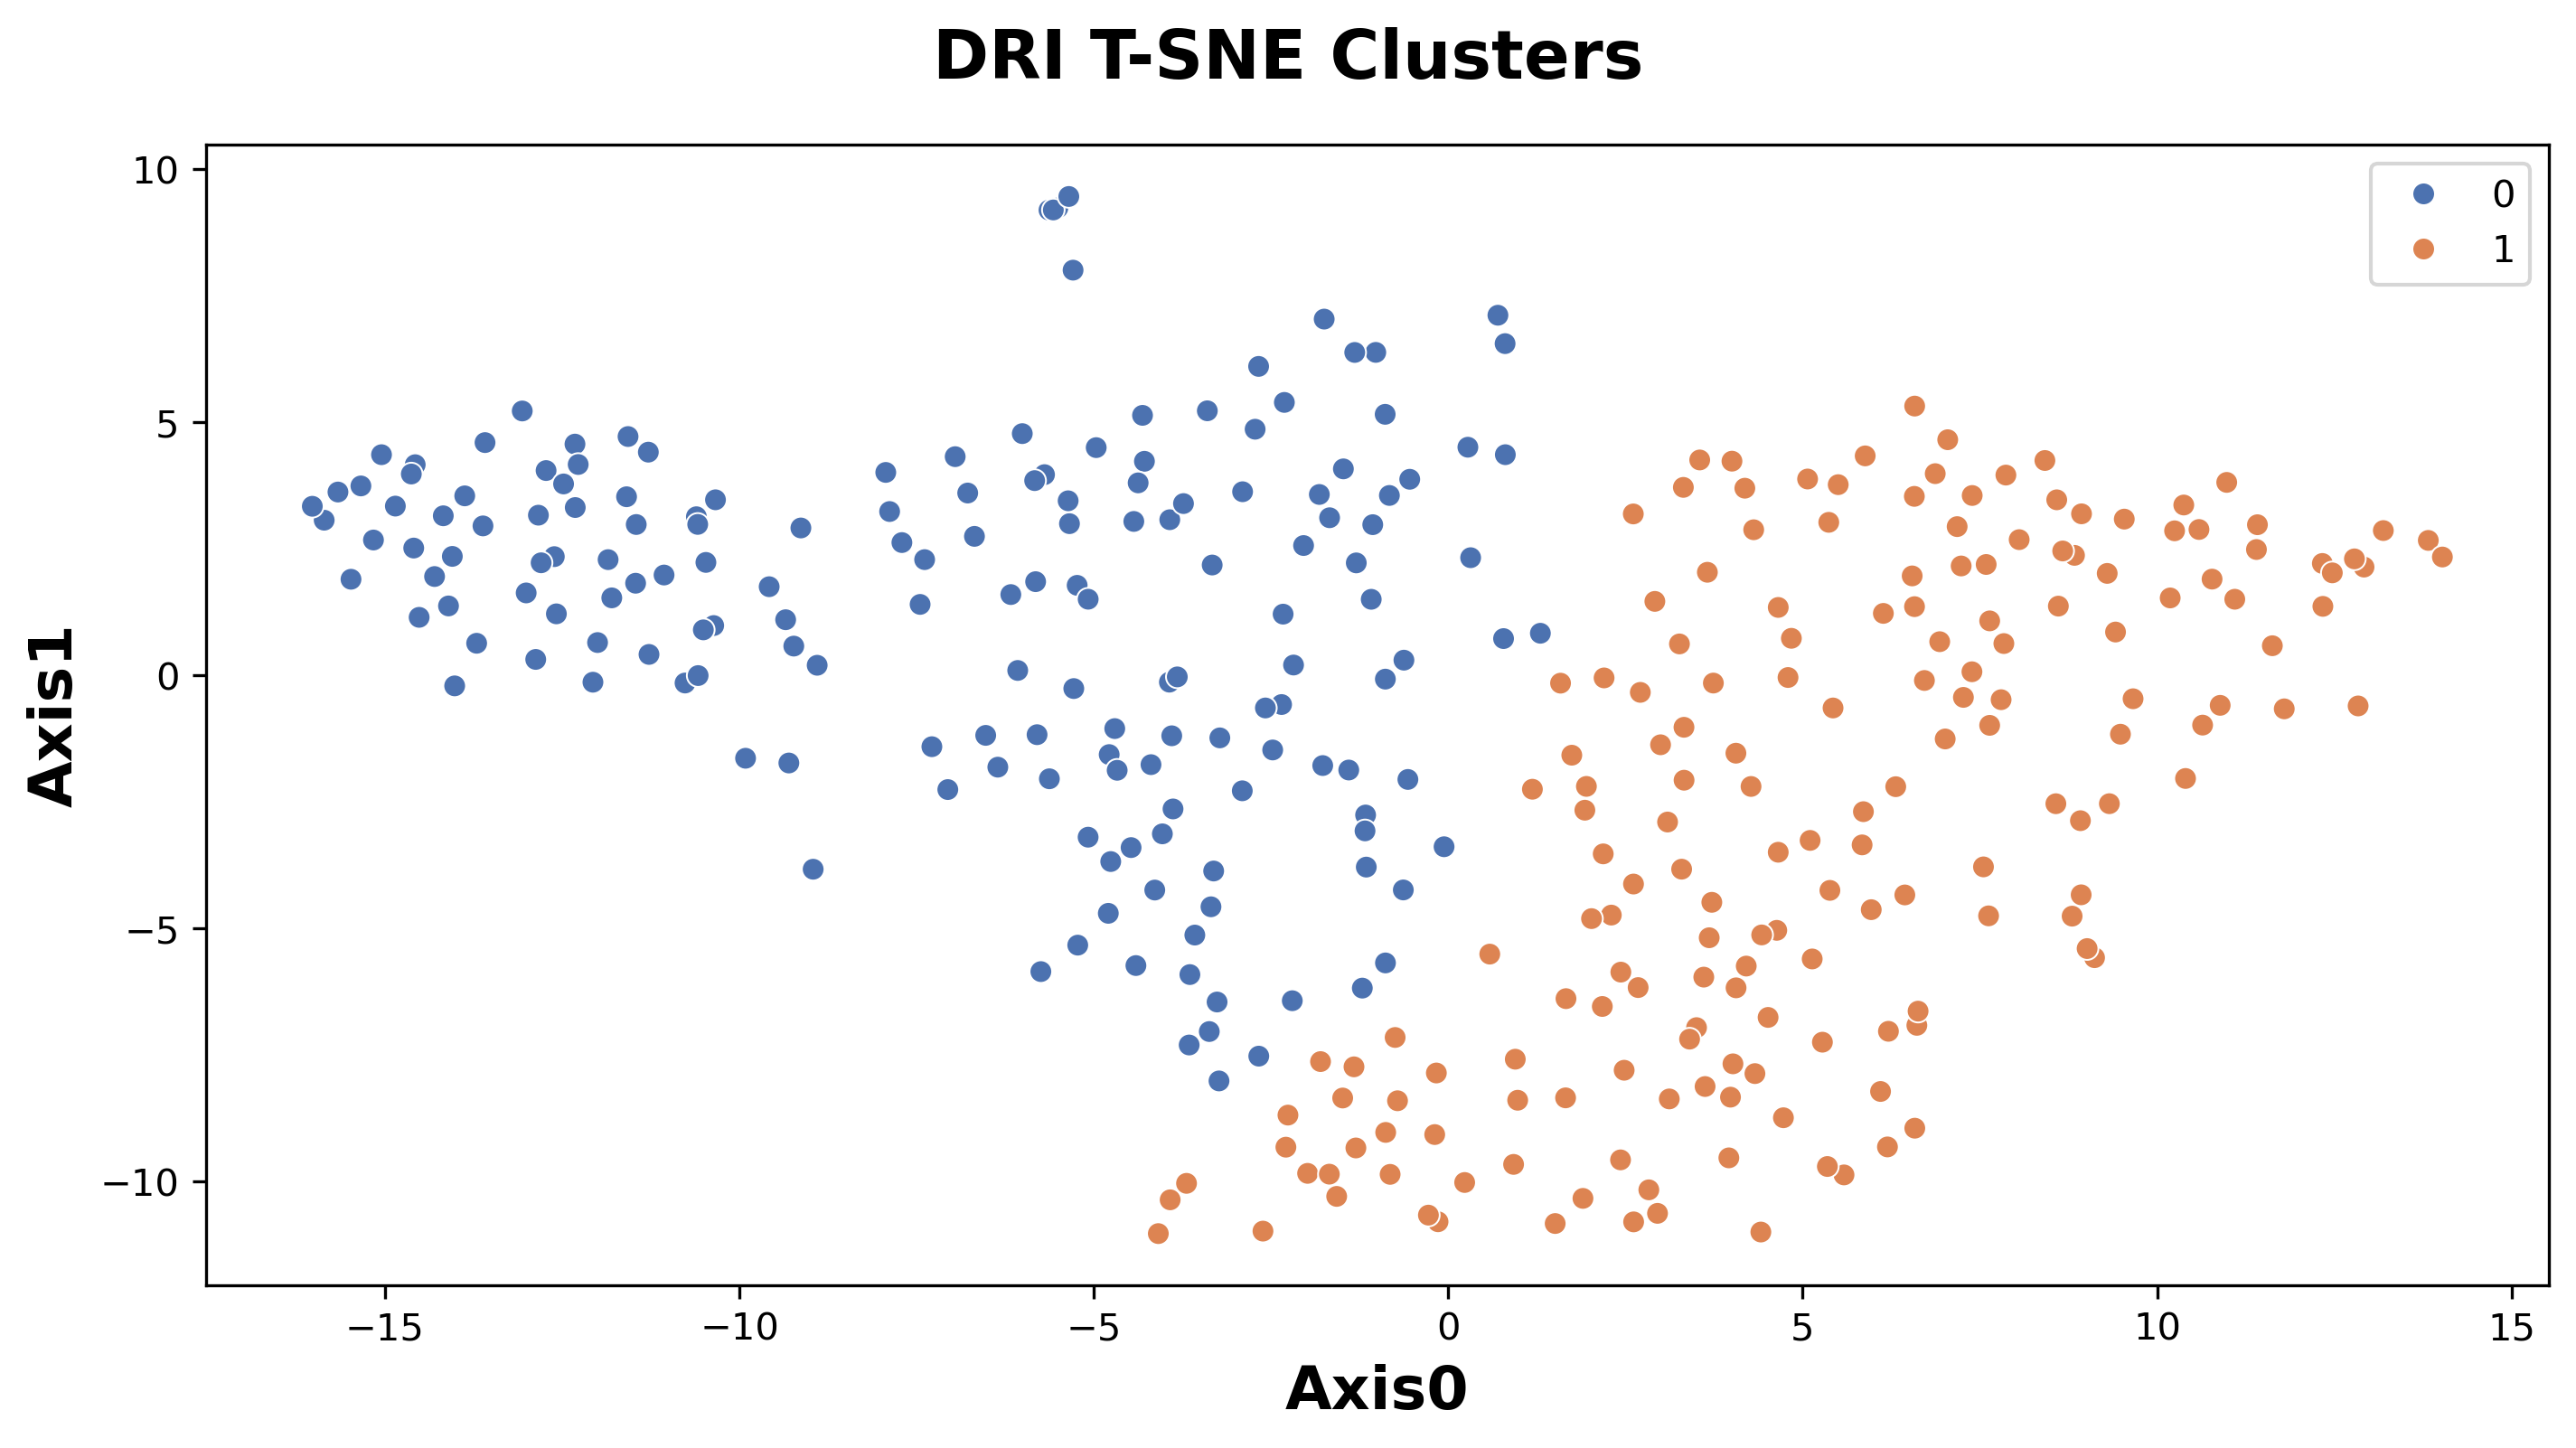

Index(['fe_metal (DRI)', 'fe_total (DRI)', 'md (DRI)', 'c (DRI)',
       'gunge (DRI)', 'feo (DRI)'],
      dtype='object')


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2976674440.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2976674440.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2976674440.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2976674440.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2976674440.py:64: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2976674440.py:64: UserWa

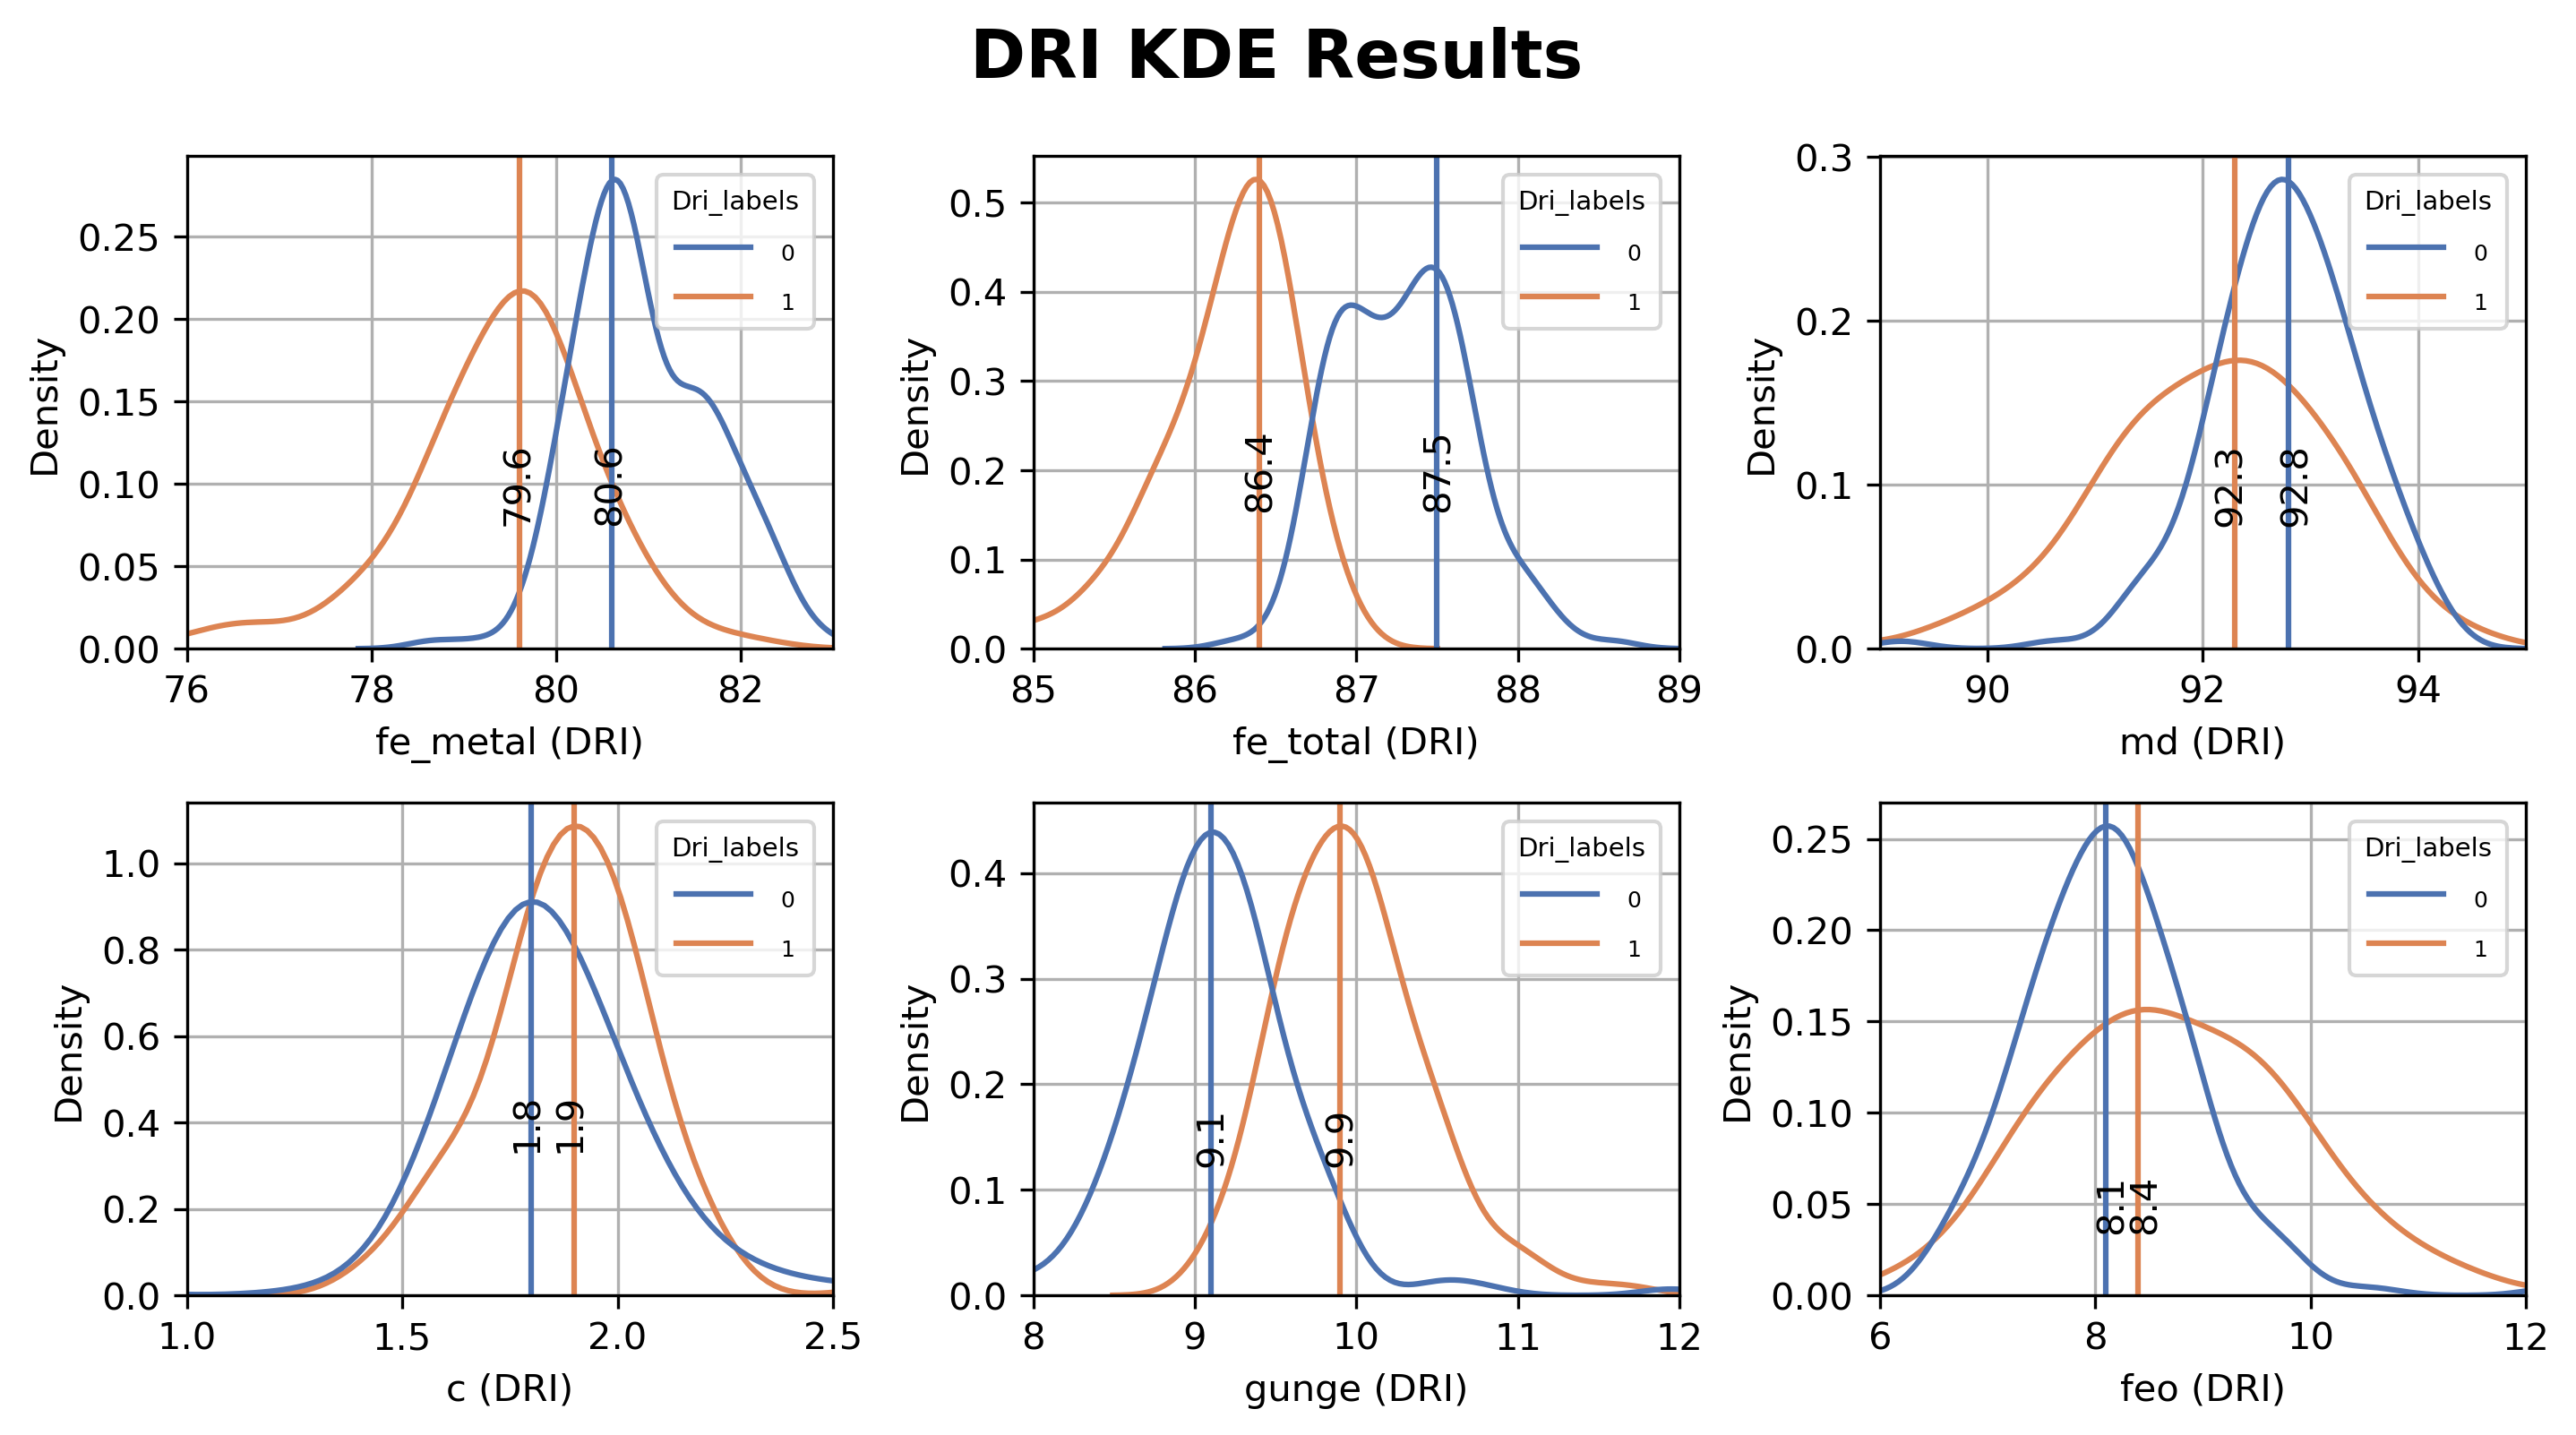

In [22]:
df = pd.read_csv(f"{working_dir}/data/dri.csv")
df.set_index(keys='tar', inplace=True ,drop=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
#df.drop(labels=['s315'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=50)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 2, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
#----------Labeling---------
clust_lable_dict = {0:1,1:0,2:2}
labels = [clust_lable_dict[i] for i in model.labels_]
df["Dri_labels"] = labels
print(df.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('DRI T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Axis0', fontsize=16,fontweight='bold')
ax1.set_ylabel('Axis1', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=df['Dri_labels'].values,
    palette= cmap,
    )
fig.tight_layout()
plt.savefig(f'{working_dir}/presentation/dri-tsne-clusters.jpg')
plt.show()

#----------Labes Conditions-----
plot_name = df.columns.drop('Dri_labels')
print(plot_name)
num = 0
for k in range(1):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('DRI KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,3)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(3):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="Dri_labels",
                #hue_order=[0,2,3,],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            plt.setp(ax[i][j].get_legend().get_texts(), fontsize='6') # for legend text
            plt.setp(ax[i][j].get_legend().get_title(), fontsize='7') # for legend title
            num = num +1
    fig.tight_layout()
    ax[0][0].set_xlim(left=76,right=83)
    ax[0][0].axvline(80.6,color=cmap[0])
    ax[0][0].text(80.4, 0.1, '80.6', rotation=90, va='center')
    ax[0][0].axvline(79.6,color=cmap[1])
    ax[0][0].text(79.4, 0.1, '79.6', rotation=90, va='center')
    #--------------------------
    ax[0][1].set_xlim(left=85,right=89)
    ax[0][1].axvline(87.5,color=cmap[0])
    ax[0][1].text(87.4, 0.2, '87.5', rotation=90, va='center')
    ax[0][1].axvline(86.4,color=cmap[1])
    ax[0][1].text(86.3, 0.2, '86.4', rotation=90, va='center')
    #--------------------------
    ax[0][2].set_xlim(left=89,right=95)
    ax[0][2].axvline(92.8,color=cmap[0])
    ax[0][2].text(92.7, 0.1, '92.8', rotation=90, va='center')
    ax[0][2].axvline(92.3,color=cmap[1])
    ax[0][2].text(92.1, 0.1, '92.3', rotation=90, va='center')
    #--------------------------
    ax[1][0].set_xlim(left=1,right=2.5)
    ax[1][0].axvline(1.8,color=cmap[0])
    ax[1][0].text(1.75, 0.4, '1.8', rotation=90, va='center')
    ax[1][0].axvline(1.9,color=cmap[1])
    ax[1][0].text(1.85, 0.4, '1.9', rotation=90, va='center')
    #--------------------------
    ax[1][1].set_xlim(left=8,right=12)
    ax[1][1].axvline(9.1,color=cmap[0])
    ax[1][1].text(9, 0.15, '9.1', rotation=90, va='center')
    ax[1][1].axvline(9.9,color=cmap[1])
    ax[1][1].text(9.8, 0.15, '9.9', rotation=90, va='center')
    #--------------------------
    ax[1][2].set_xlim(left=6,right=12)
    ax[1][2].axvline(8.1,color=cmap[0])
    ax[1][2].text(8.0, 0.05, '8.1', rotation=90, va='center')
    ax[1][2].axvline(8.4,color=cmap[1])
    ax[1][2].text(8.3, 0.05, '8.4', rotation=90, va='center')
    plt.savefig(f'{working_dir}/presentation/dri-kde-results{k}.jpg')
plt.show()

# save For next use
df.to_csv(f"{working_dir}/data/dri_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
7- خواندن دیتاهای خام مربوط به سرباره
</b>
</div>

In [24]:
df = pd.read_csv(f"{working_dir}/Raw-Data/slag_Lab.csv",encoding='latin-1' )
print(f"size of raw data = {df.shape}")
#-----------------Filter Tarikh--------------------
df = df[df['tar'] >= 14020915]
print(f"from 14020915 to 14030915 = {df.shape}")
print(df.describe())
#---------prepare data for saving to csv file------
df.set_index(keys='heat_no', inplace=True ,drop=True)
df = df.add_suffix(' (Slag)')
#save prepared data for next
df.to_csv(f"{working_dir}/data/slag.csv",index=True)
#remove dataframe from memory
del df

size of raw data = (7140, 12)
from 14020915 to 14030915 = (1649, 12)
                tar       heat_no          cao          feo         sio2  \
count  1.649000e+03  1.649000e+03  1649.000000  1649.000000  1649.000000   
mean   1.402799e+07  4.030588e+06    26.811825    30.949303    22.122317   
std    4.184968e+03  3.254414e+03     3.569229     7.242999     2.864348   
min    1.402092e+07  4.024660e+06    13.100000    13.200000    12.800000   
25%    1.402122e+07  4.026355e+06    24.500000    25.800000    20.100000   
50%    1.403032e+07  4.031540e+06    27.000000    30.700000    22.100000   
75%    1.403070e+07  4.033213e+06    29.300000    35.700000    24.200000   
max    1.403092e+07  4.034580e+06    36.000000    60.000000    29.900000   

               mgo        al2o3         p2o5          mno           b2  \
count  1649.000000  1649.000000  1649.000000  1649.000000  1649.000000   
mean     10.152274     4.303457     0.787596     0.210795     1.218029   
std       1.493017     0

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1-7 - خوشه بندی داده 
</b>
</div>

(1649, 10)
(1649, 10)
           0          1
0  b2 (Slag)  b3 (Slag)
(1649, 2)
(1649,)


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3127716870.py:34: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


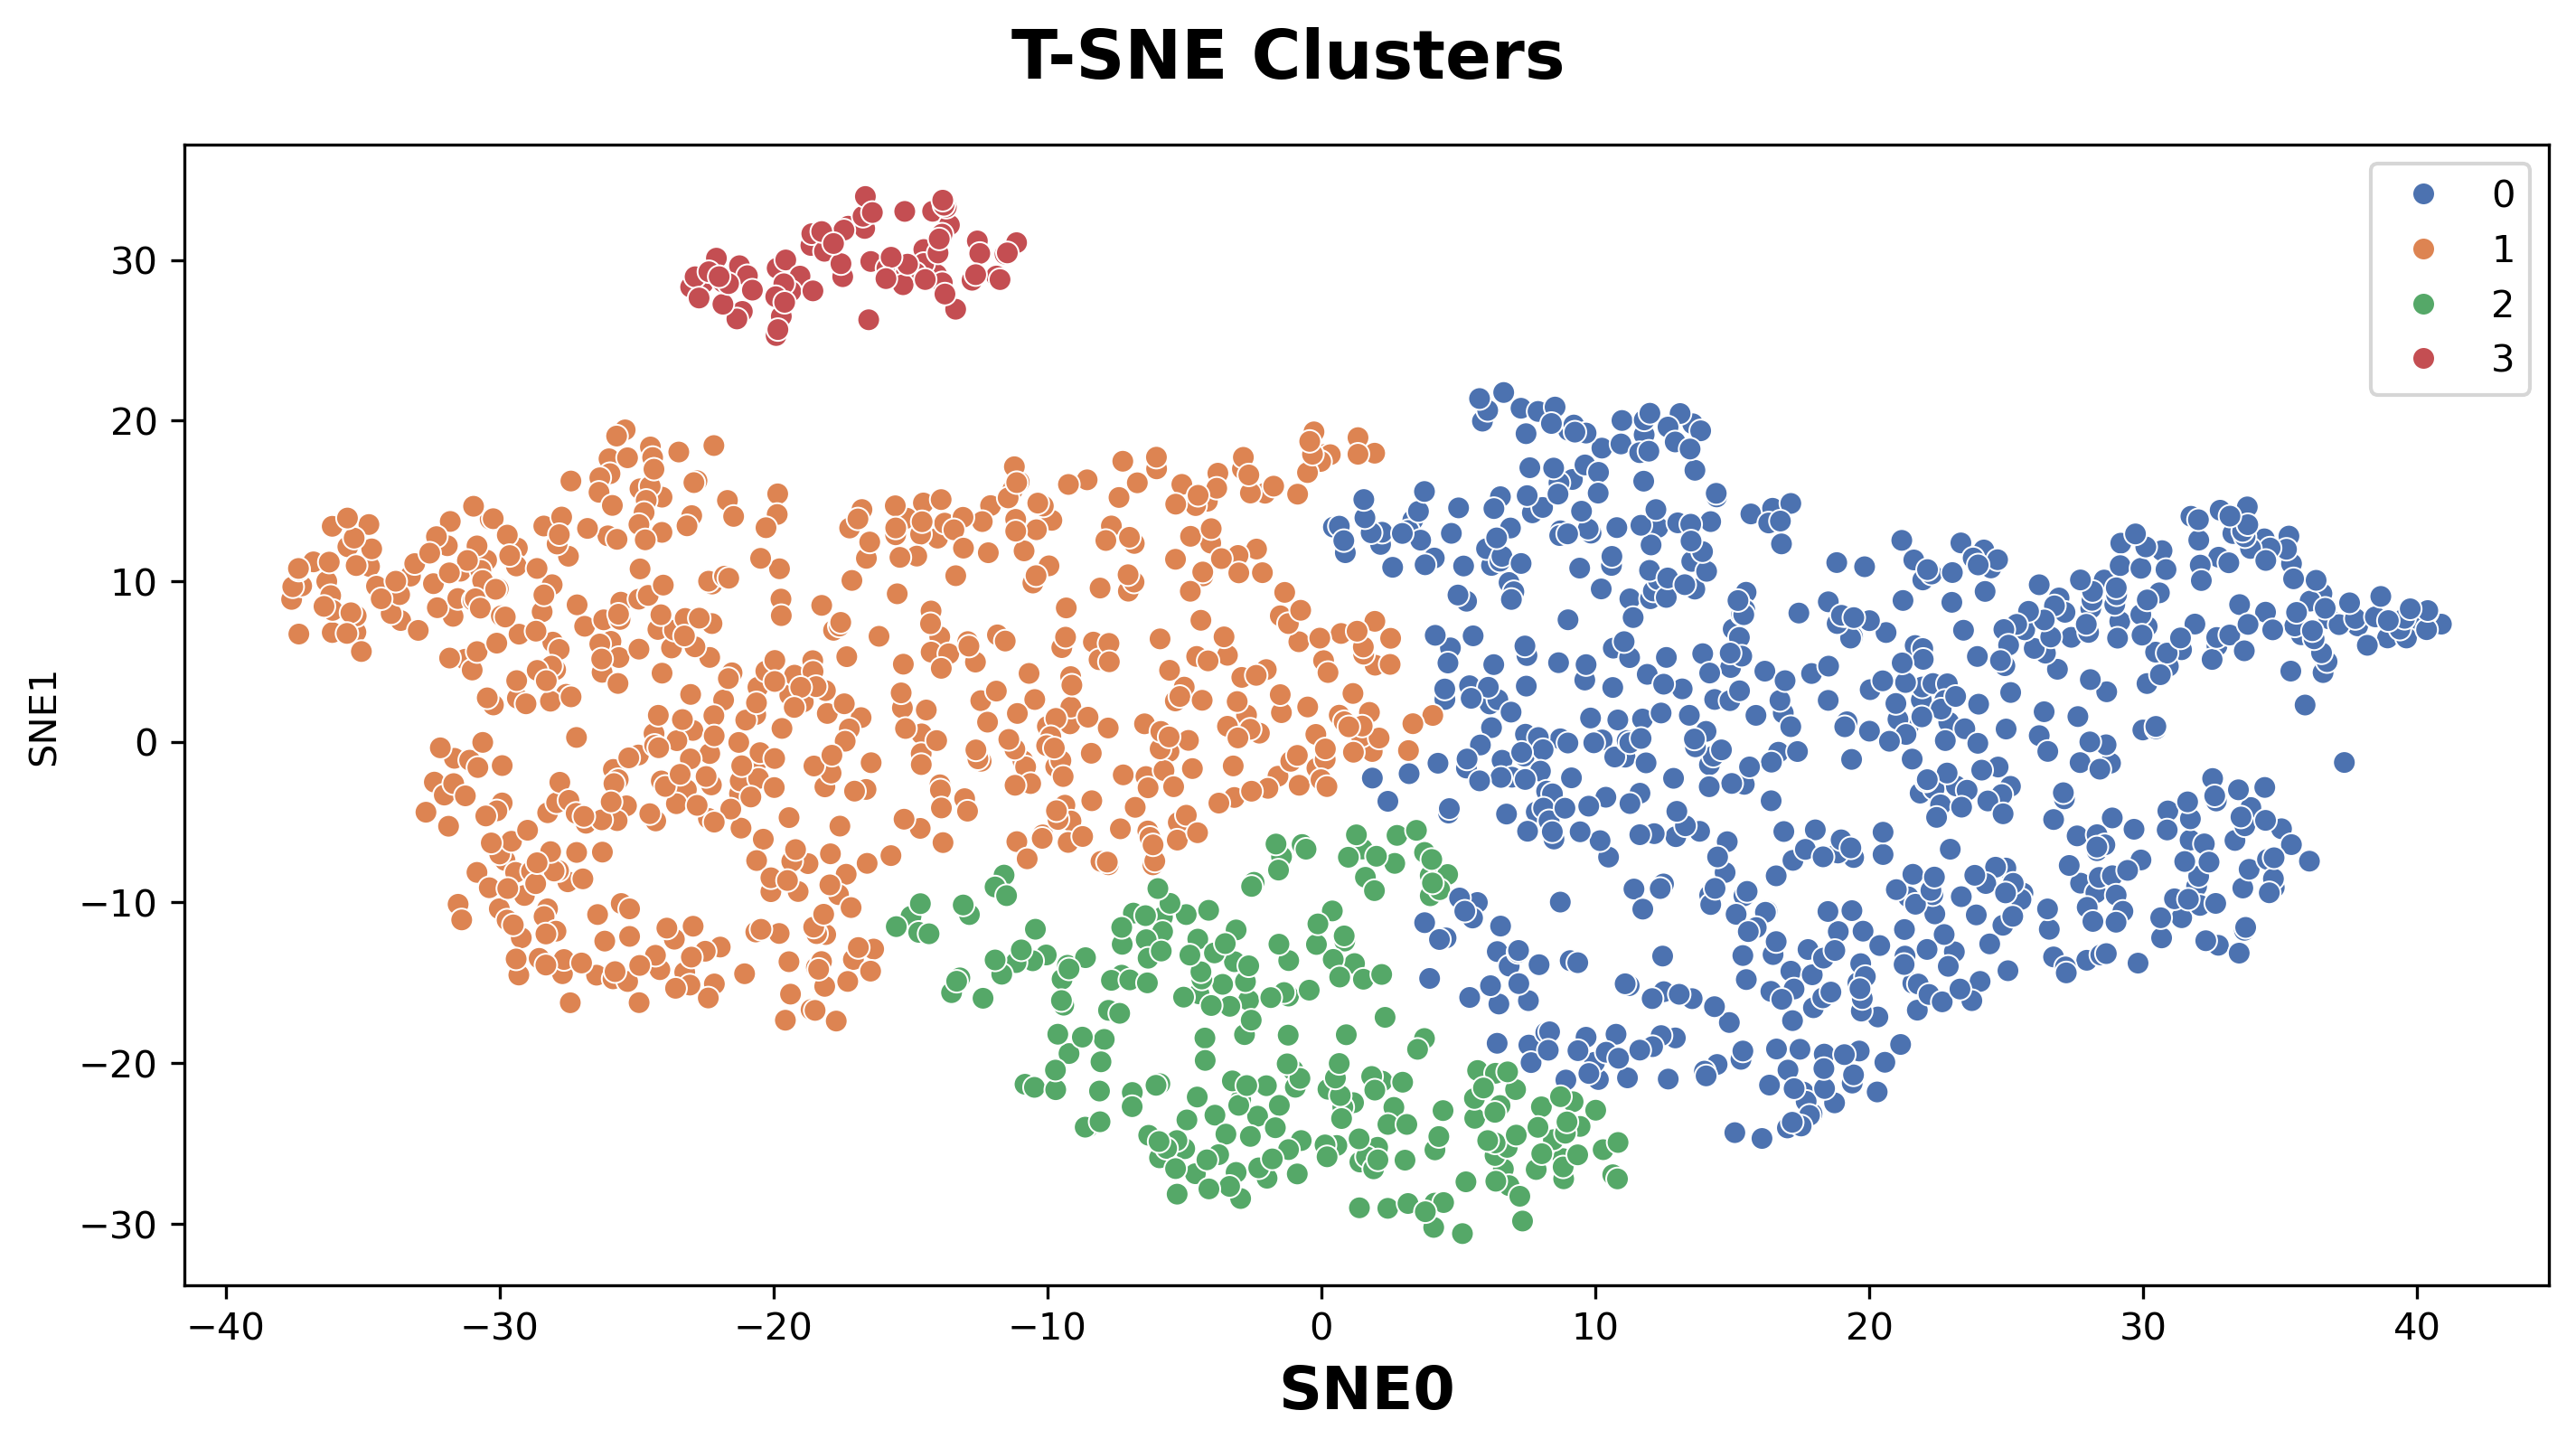

(1649, 11)
Index(['cao (Slag)', 'feo (Slag)', 'sio2 (Slag)', 'mgo (Slag)', 'al2o3 (Slag)',
       'p2o5 (Slag)', 'mno (Slag)', 'b2 (Slag)', 'b3 (Slag)', 'b4 (Slag)'],
      dtype='object')


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3127716870.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3127716870.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3127716870.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3127716870.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3127716870.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\3127716870.py:63: UserWa

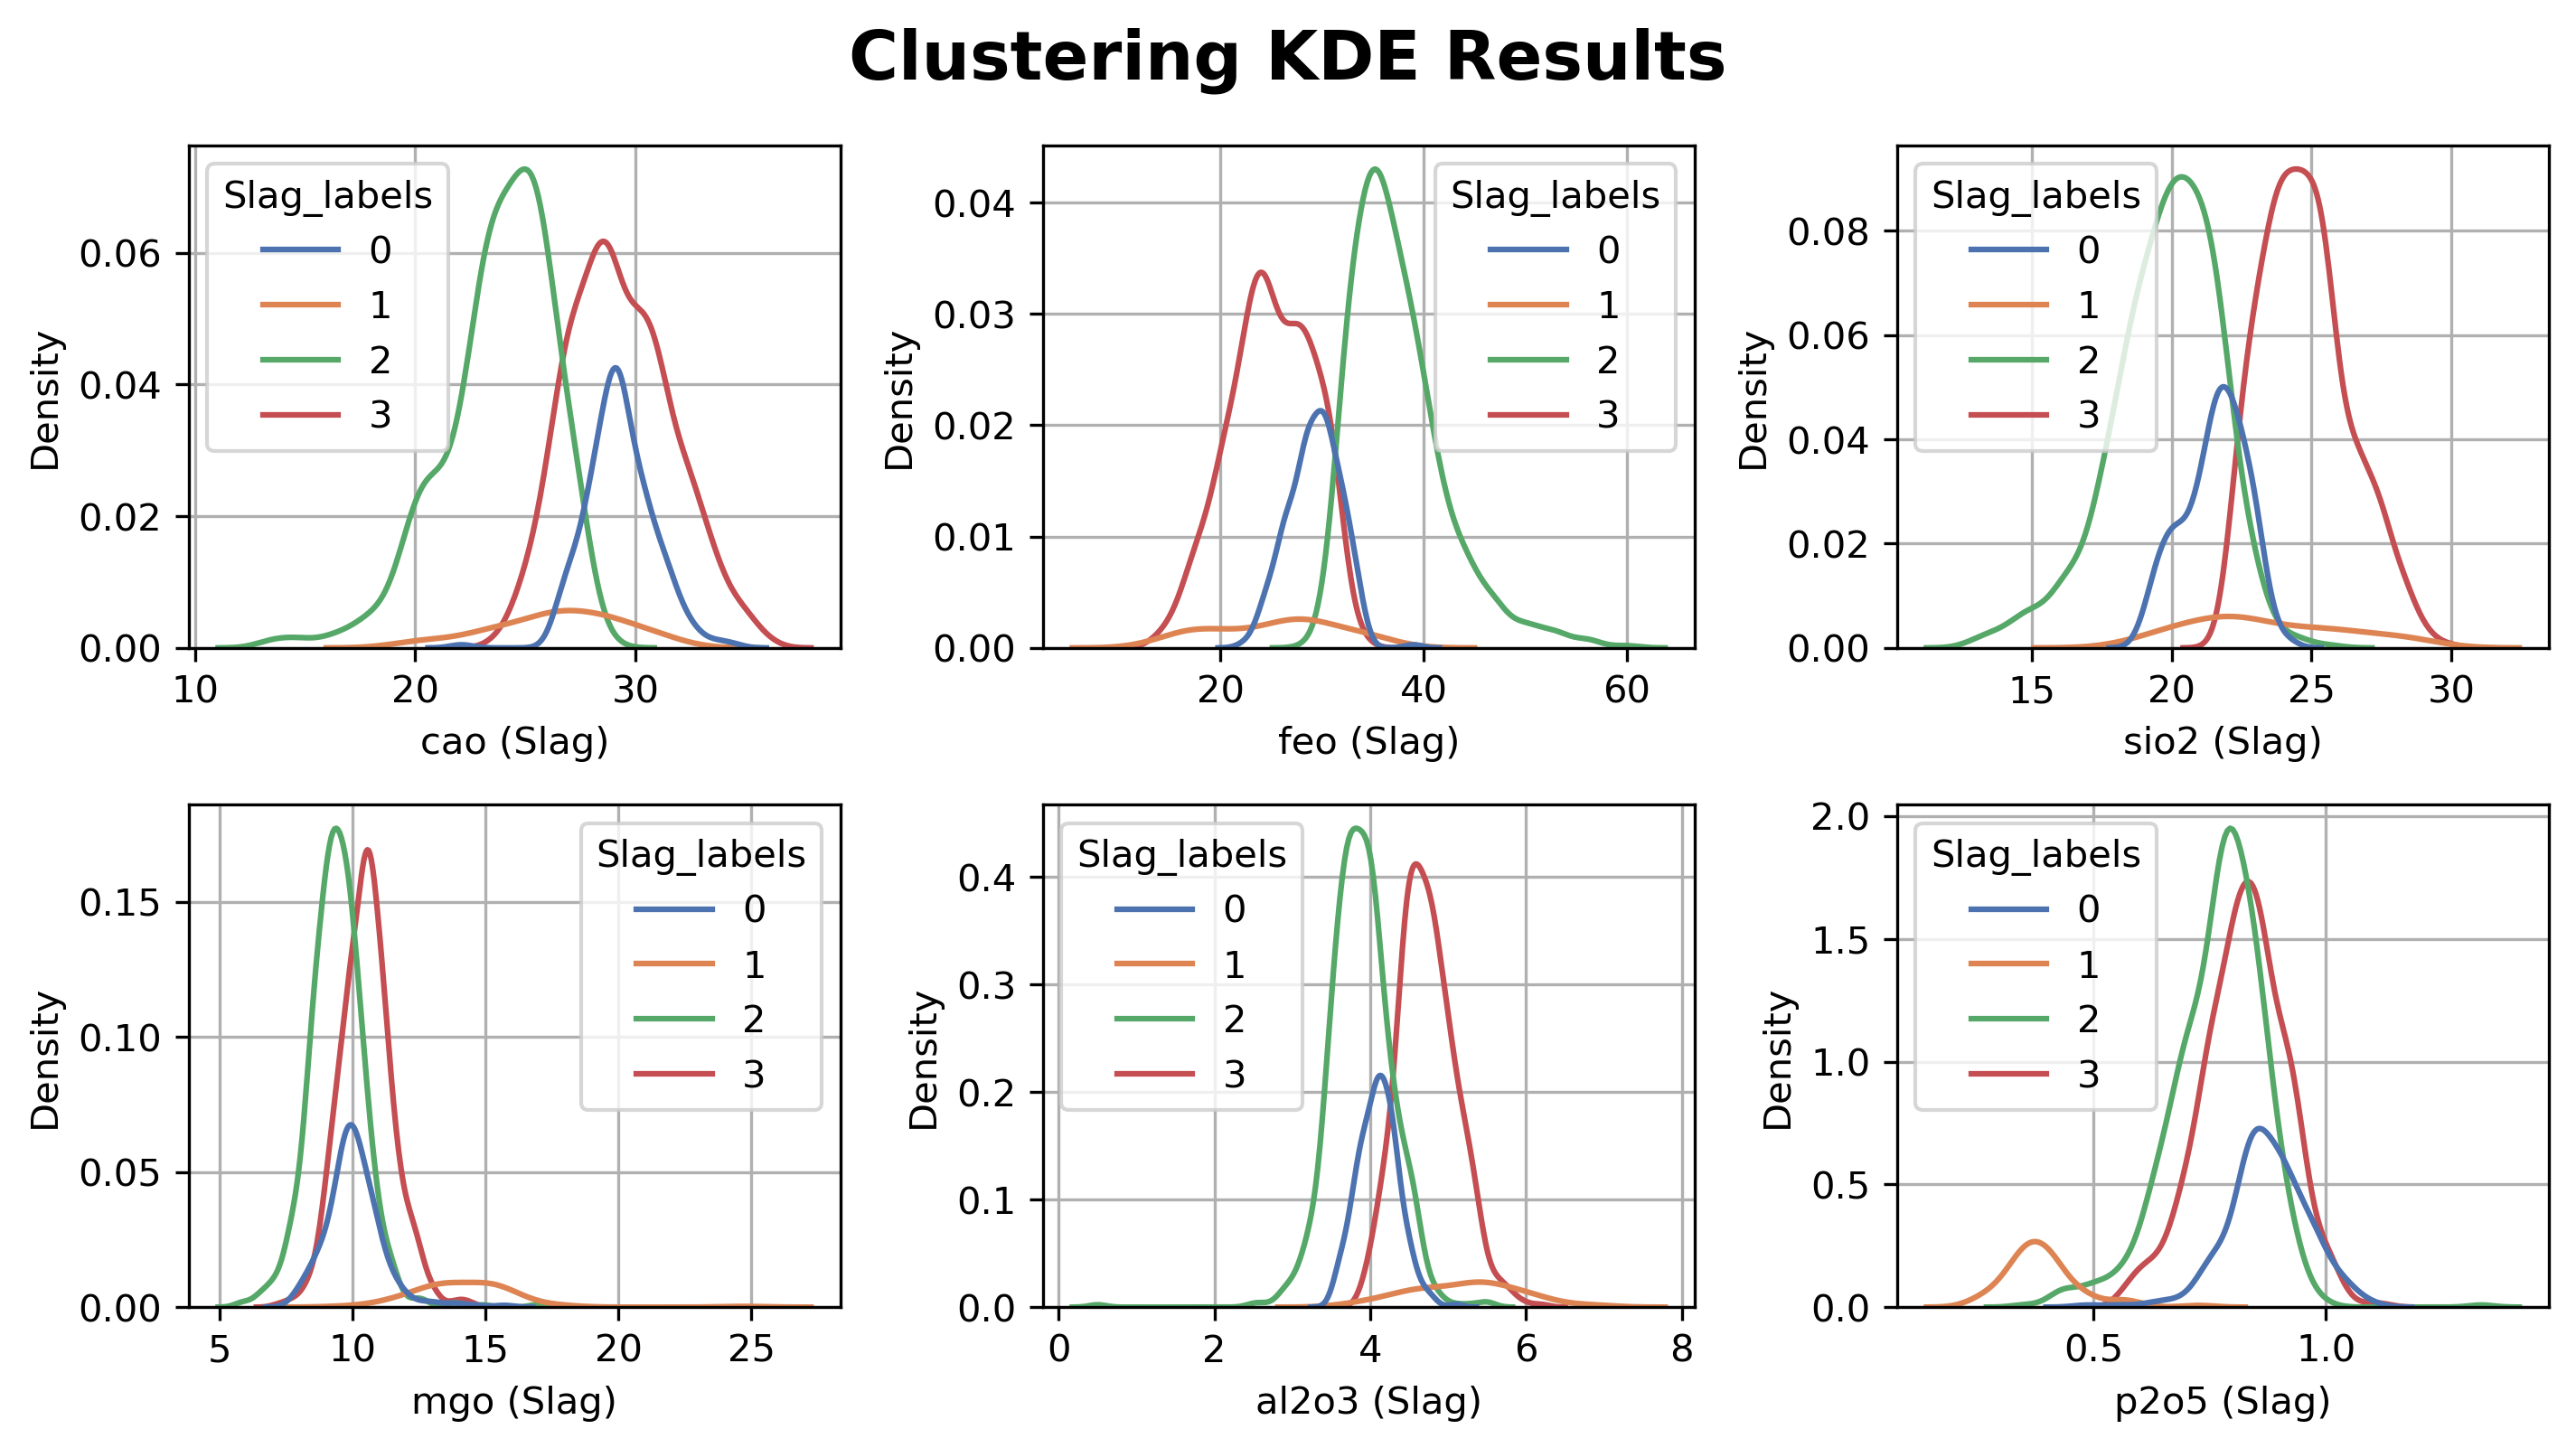

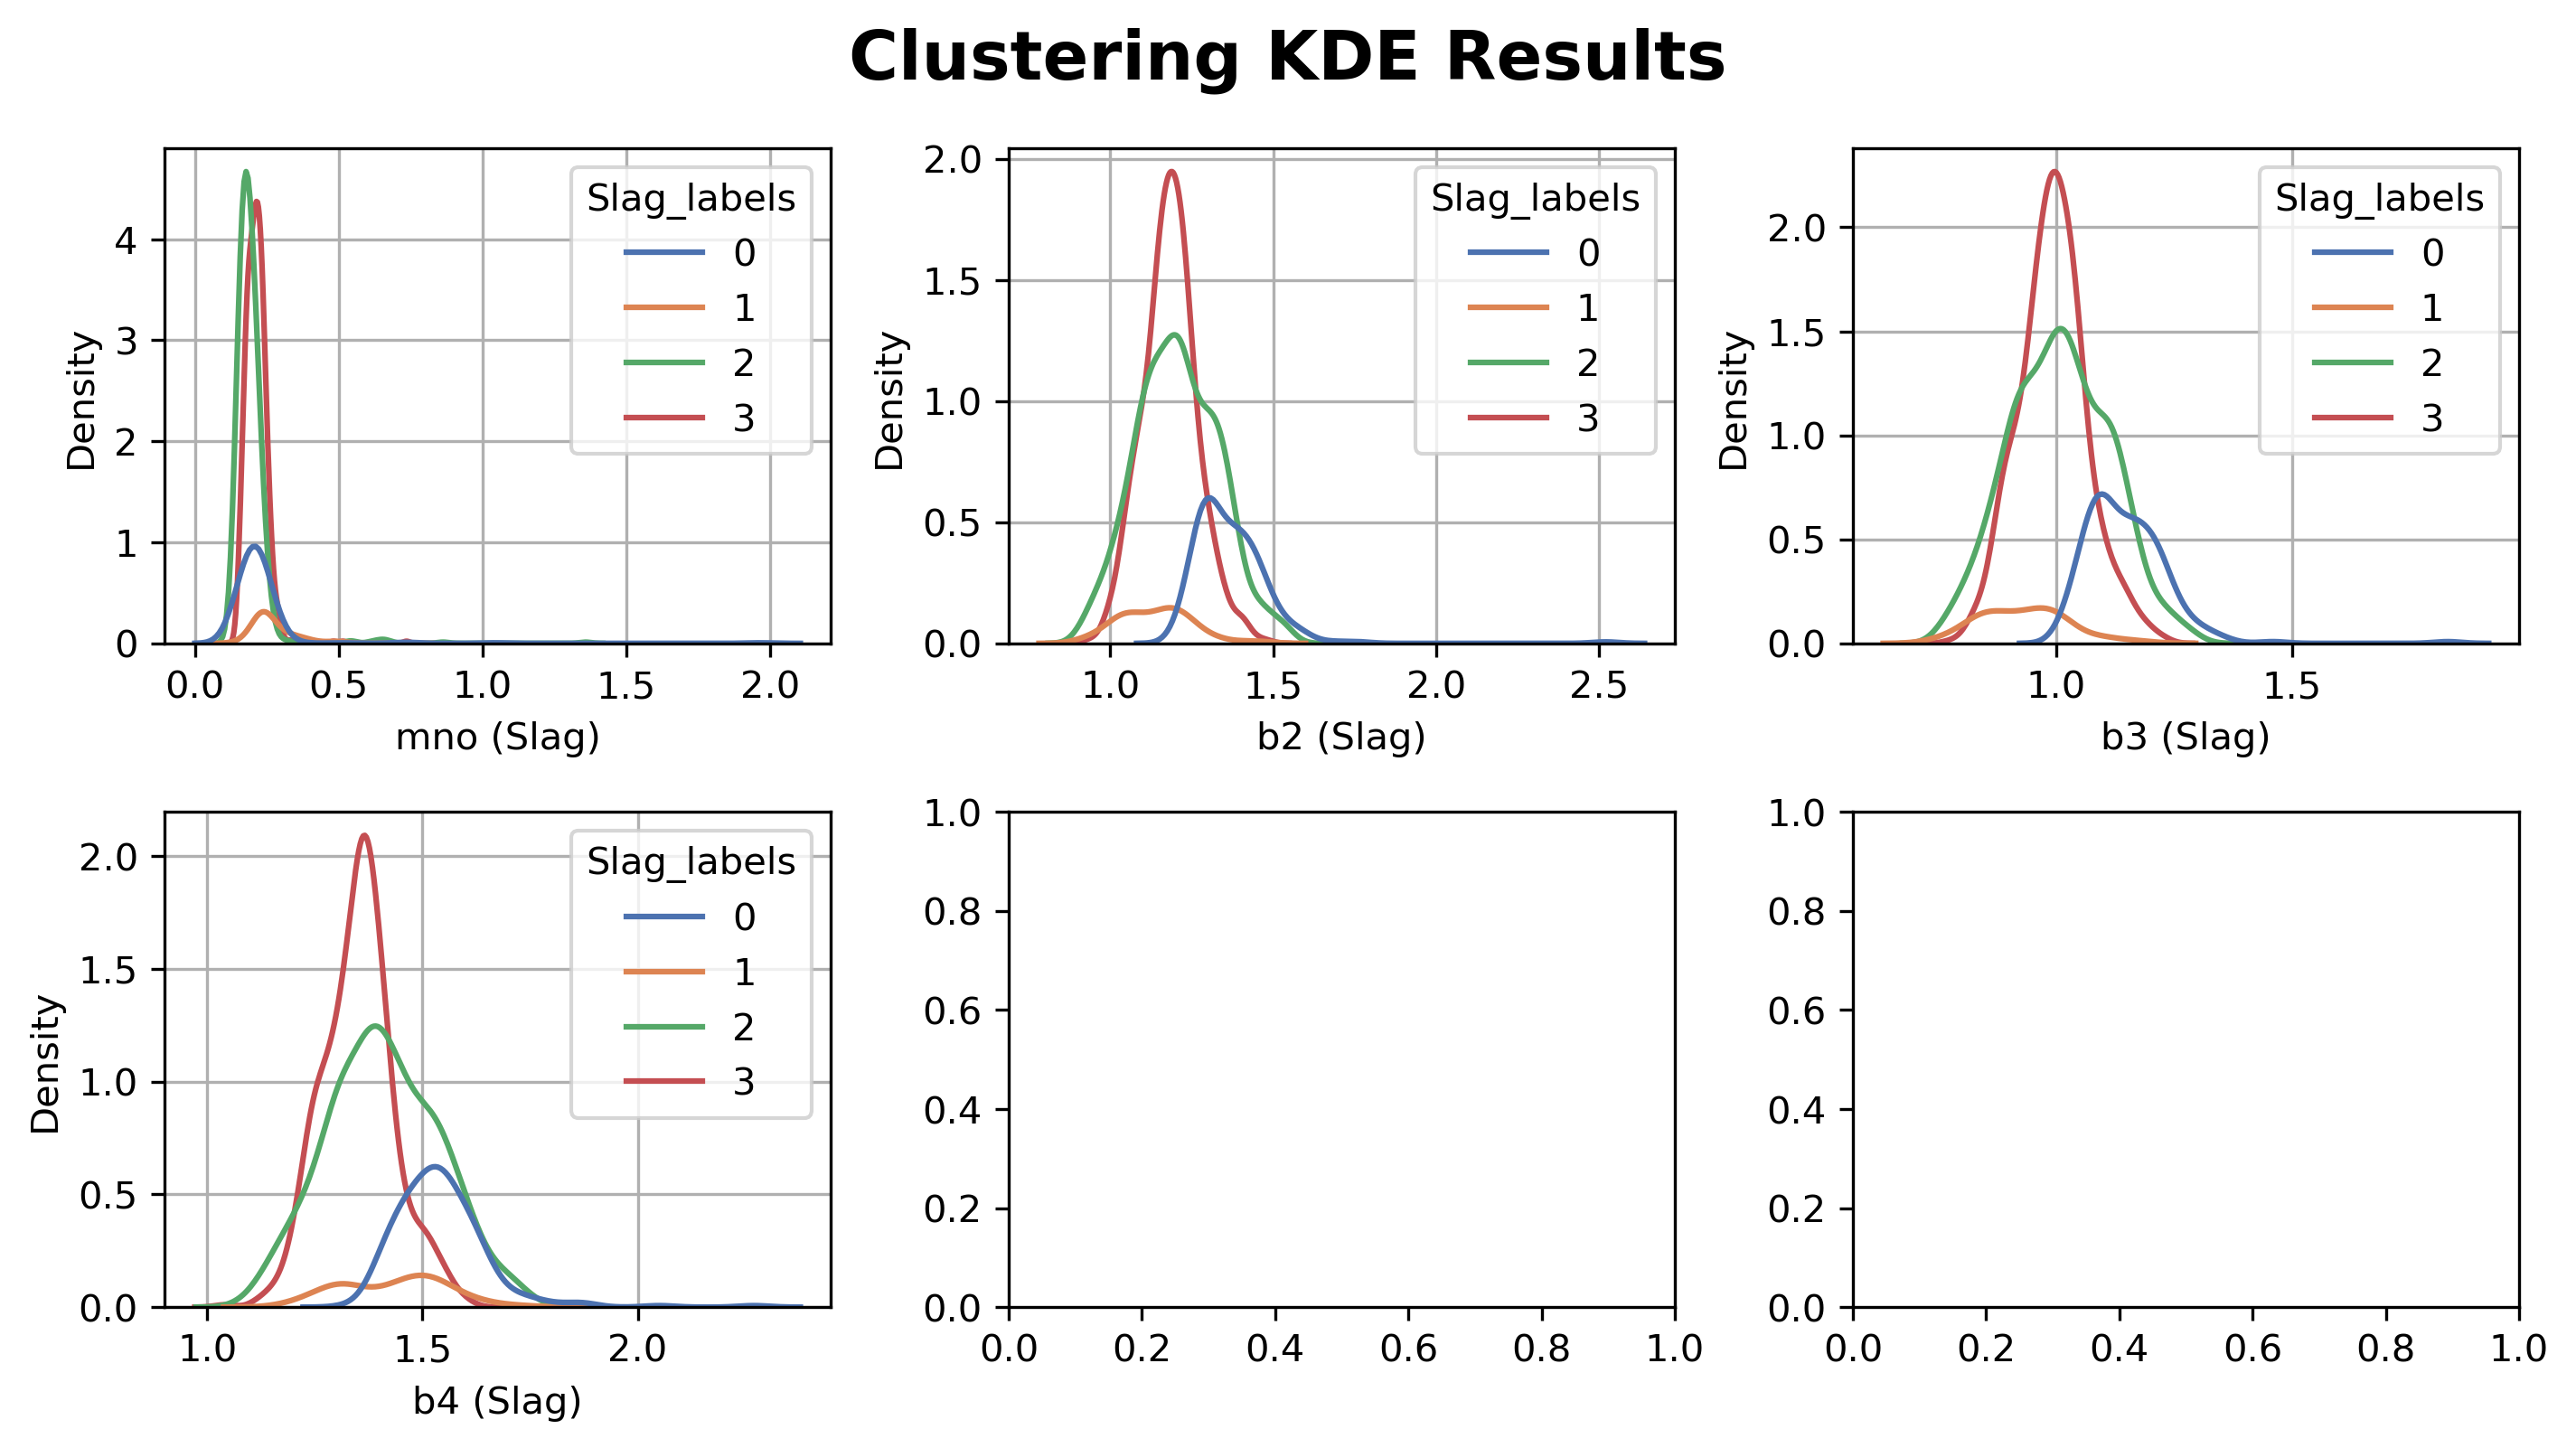

In [26]:
df = pd.read_csv(f"{working_dir}/data/slag.csv")
df.set_index(keys='heat_no', inplace=True ,drop=True)
df.drop(labels=['tar (Slag)'],axis=1,inplace=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
#df.drop(labels=['s315'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=50)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 4, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('SNE0', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=model.labels_,
    palette= cmap,
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/presentation/C5000 Amp VS O2 purity.jpg')
plt.show()
#----------Labeling---------
clust_lable_dict = {0:2,1:3,2:0,3:1,4:4}
labels = [clust_lable_dict[i] for i in model.labels_]
df["Slag_labels"] = labels
print(df.shape)
#----------Labes Conditions-----
plot_name = df.columns.drop(['Slag_labels'])
print(plot_name)
num = 0
for k in range(2):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('Clustering KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,3)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(3):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="Slag_labels",
                #hue_order=['Slag_Grade_A','Slag_Grade_B','Slag_Grade_C','Slag_Grade_D'],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            num = num +1
    fig.tight_layout()
plt.show()

# save For next use
df.to_csv(f"{working_dir}/data/slag_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
8- خواندن دیتاهای خام مربوط به ذوب و کوره
</b>
</div>

In [28]:
def remove_hyphen(x):
    output = str(x).replace("-","")
    return int(output)


df = pd.read_csv(f"{working_dir}/Raw-Data/EAF Data.csv",encoding='latin-1' )
#-----------------------drop twe row from end because its total reports---------
df.drop(df.tail(2).index,inplace = True)
print(f"size of raw data = {df.shape}")
#----------modify tarikh format to shape of other files and Drop Some Columns----------------
df['tar_'] = df['Persian_Date'].apply(remove_hyphen)
df.insert(0, 'tar', df['tar_'])
df.drop(labels=['Row','Date','Persian_Date','tar_'],axis=1,inplace=True)
#-------------------------Filter Tarikh---------------------
df = df[df['tar'] >= 14020915]
print(f"from 14020915 to 14030915 = {df.shape}")
#----------------some rows have equal values----------------
df = df.drop_duplicates(subset=['tar', 'Heat'], keep='last')
#-------------filter only dri and drop column----------------
mask = df['Product Kind'] == 'ONLY_DRI'
df = df[mask]
df.drop(labels=['Product Kind'],axis=1,inplace=True)
#-------------filter tapped (ton)----------------
mask = df['Tapped [t]'].between(170,200)
df = df[mask]
#-----------filter tapping time(sec)----------------
mask = df['Tapping Time [Sec]'] <= 600
df = df[mask]
#---------filter melting without scrap and drop column-----
mask = df['Scarp [t]'] == 0
df = df[mask]
df.drop(labels=['# Bucket','Scarp [t]','CaO.inj [kg]','Grade','Start','End','Last Temp [kWh/t]','Last Temp [C]','First Temp','First C','Ele [kWh]','Ele [kWh/t]'],axis=1,inplace=True)
#-------------filter duration----------------
mask = df['Duration'].between(40,70)
df = df[mask]
print(df.describe())
#---------Drop Some Columns-----------------
df.drop(labels=['Delays','EAF_DRI','Chemical [MWh]','Duration','DRI [t]'
                ,'HDRI(T)','Tapping Time [Sec]','Tapped [kWh/t]'],axis=1,inplace=True)


#---------prepare data for saving to csv file------
df.set_index(keys='Heat', inplace=True ,drop=True)
df = df.add_suffix(' (EAF)')
#save prepared data for next
df.to_csv(f"{working_dir}/data/eaf_data.csv",index=True)
#remove dataframe from memory
del df

size of raw data = (6587, 35)
from 14020915 to 14030915 = (6586, 33)
                tar          Heat     Duration     Power On    Power Off  \
count  3.317000e+03  3.317000e+03  3317.000000  3317.000000  3317.000000   
mean   1.402811e+07  4.030779e+06    62.702442    52.941815     9.265601   
std    4.139330e+03  3.257570e+03     4.084353     3.707643     2.895079   
min    1.402092e+07  4.024675e+06    48.000000    40.000000     4.000000   
25%    1.402122e+07  4.026445e+06    60.000000    51.000000     7.000000   
50%    1.403033e+07  4.031692e+06    63.000000    53.000000     8.000000   
75%    1.403072e+07  4.033502e+06    66.000000    56.000000    10.000000   
max    1.403092e+07  4.034594e+06    70.000000    63.000000    26.000000   

            Delays      DRI [t]     Ele [MW]   Tapped [t]  Tapped [kWh/t]  \
count  3317.000000  3317.000000  3317.000000  3317.000000     3317.000000   
mean      4.220078    60.656509   116.628628   176.370265      588.658579   
std       2.893

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1-8 - خوشه بندی داده فقط جهت مطالعه و آگاهی انجام شد 
</b>
</div>

(3317, 10)
(3317, 10)
Empty DataFrame
Columns: []
Index: []
(3317, 2)
(3317,)


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2863230390.py:34: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


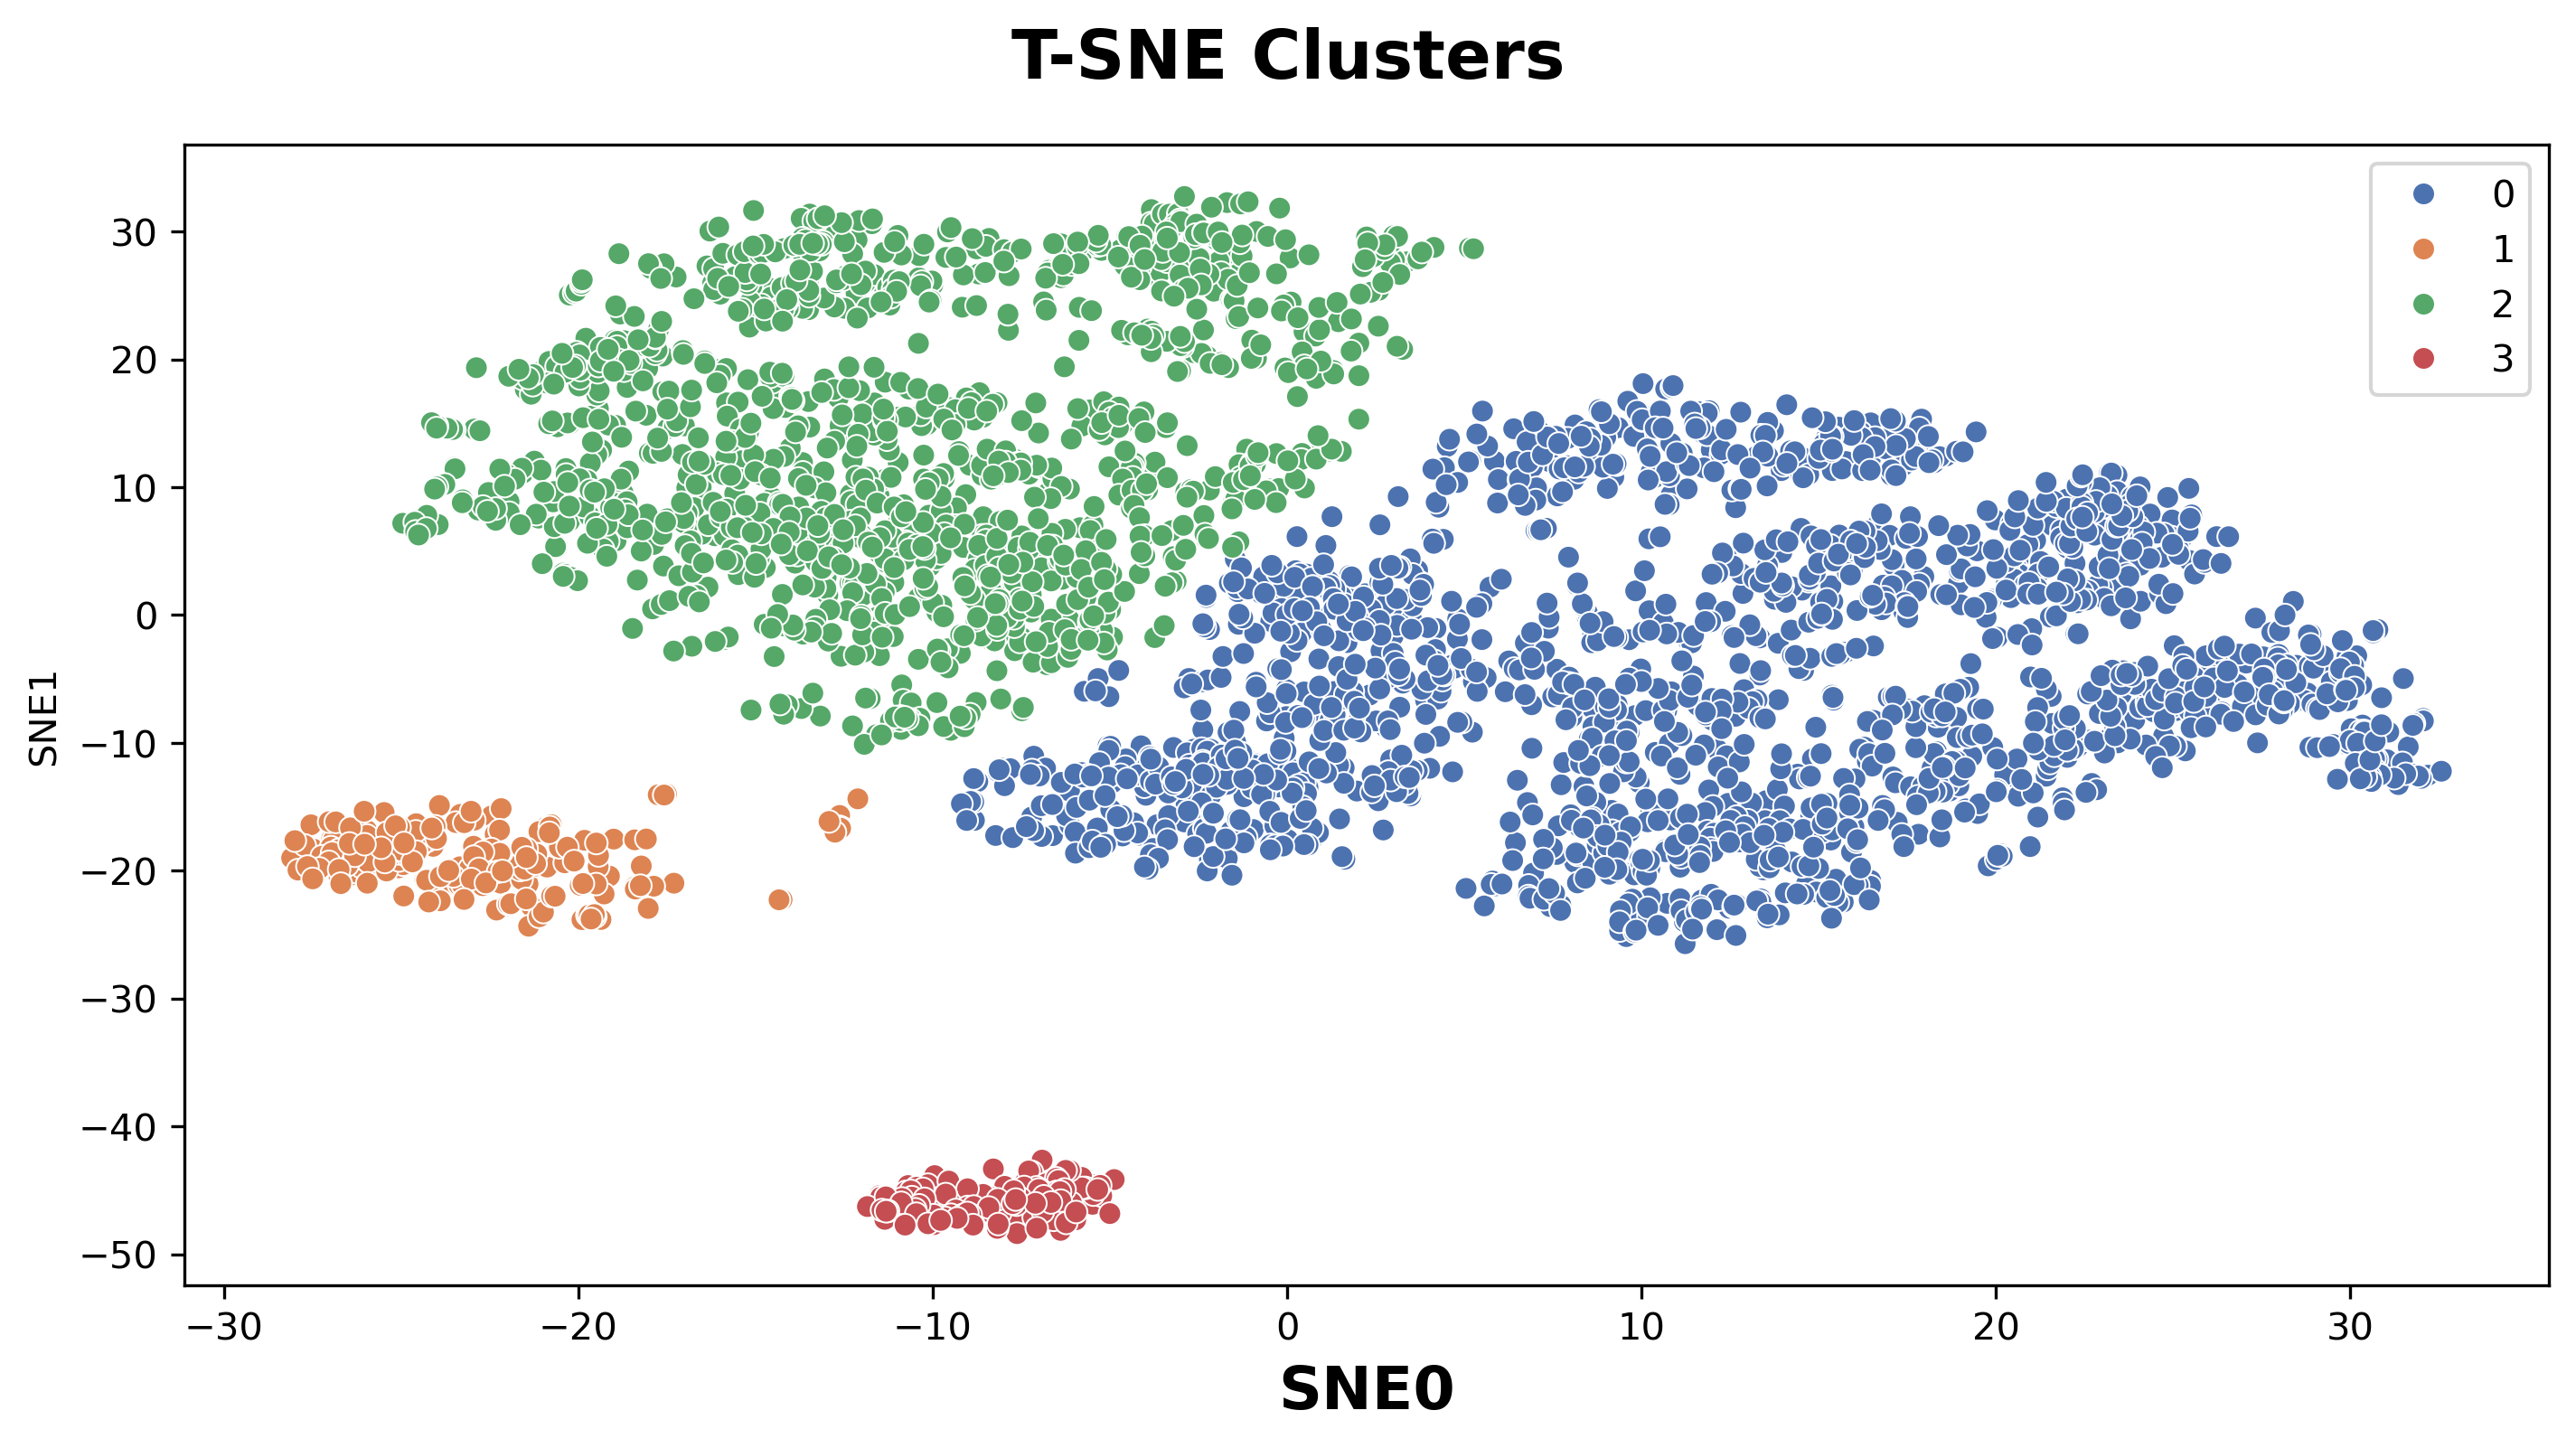

(3317, 11)
Index(['Power On (EAF)', 'Power Off (EAF)', 'Ele [MW] (EAF)',
       'Tapped [t] (EAF)', 'O2 [Nm3] (EAF)', 'CH4 [Nm3] (EAF)',
       'C.inj [kg] (EAF)', 'C [kg] (EAF)', 'CaO [kg] (EAF)', 'MgO [kg] (EAF)'],
      dtype='object')


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2863230390.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2863230390.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2863230390.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2863230390.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2863230390.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_1572\2863230390.py:63: UserWa

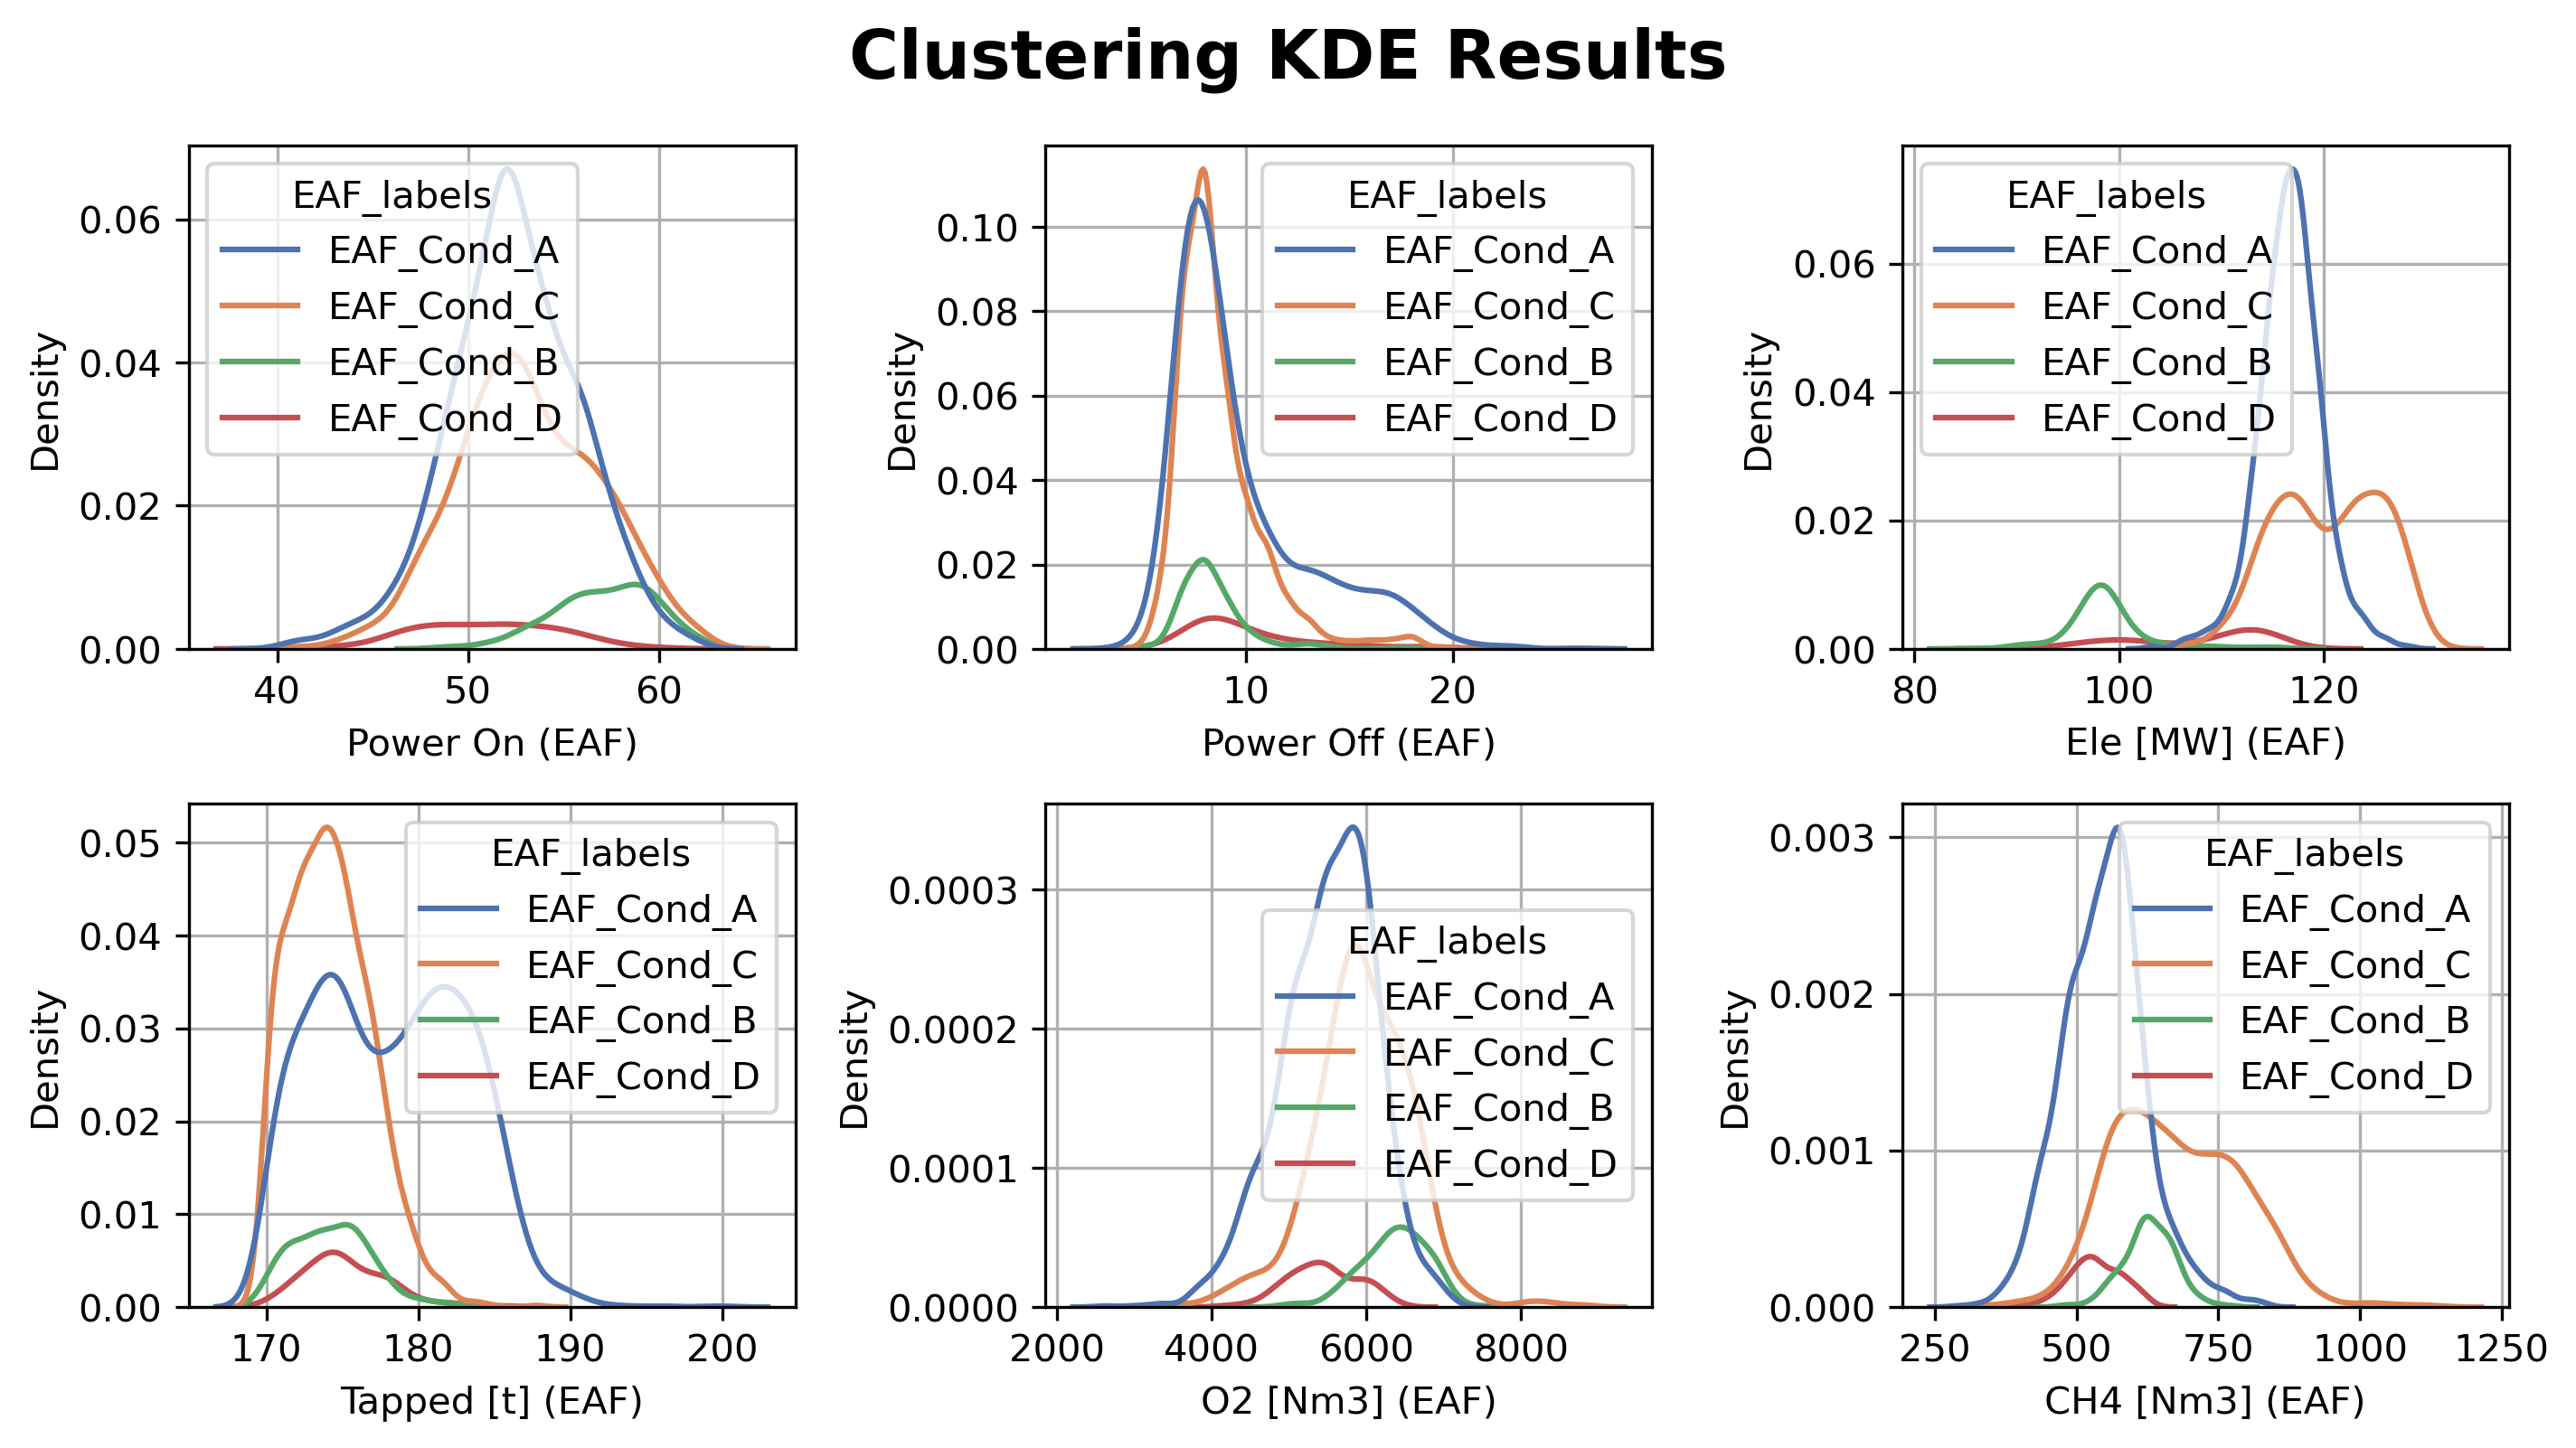

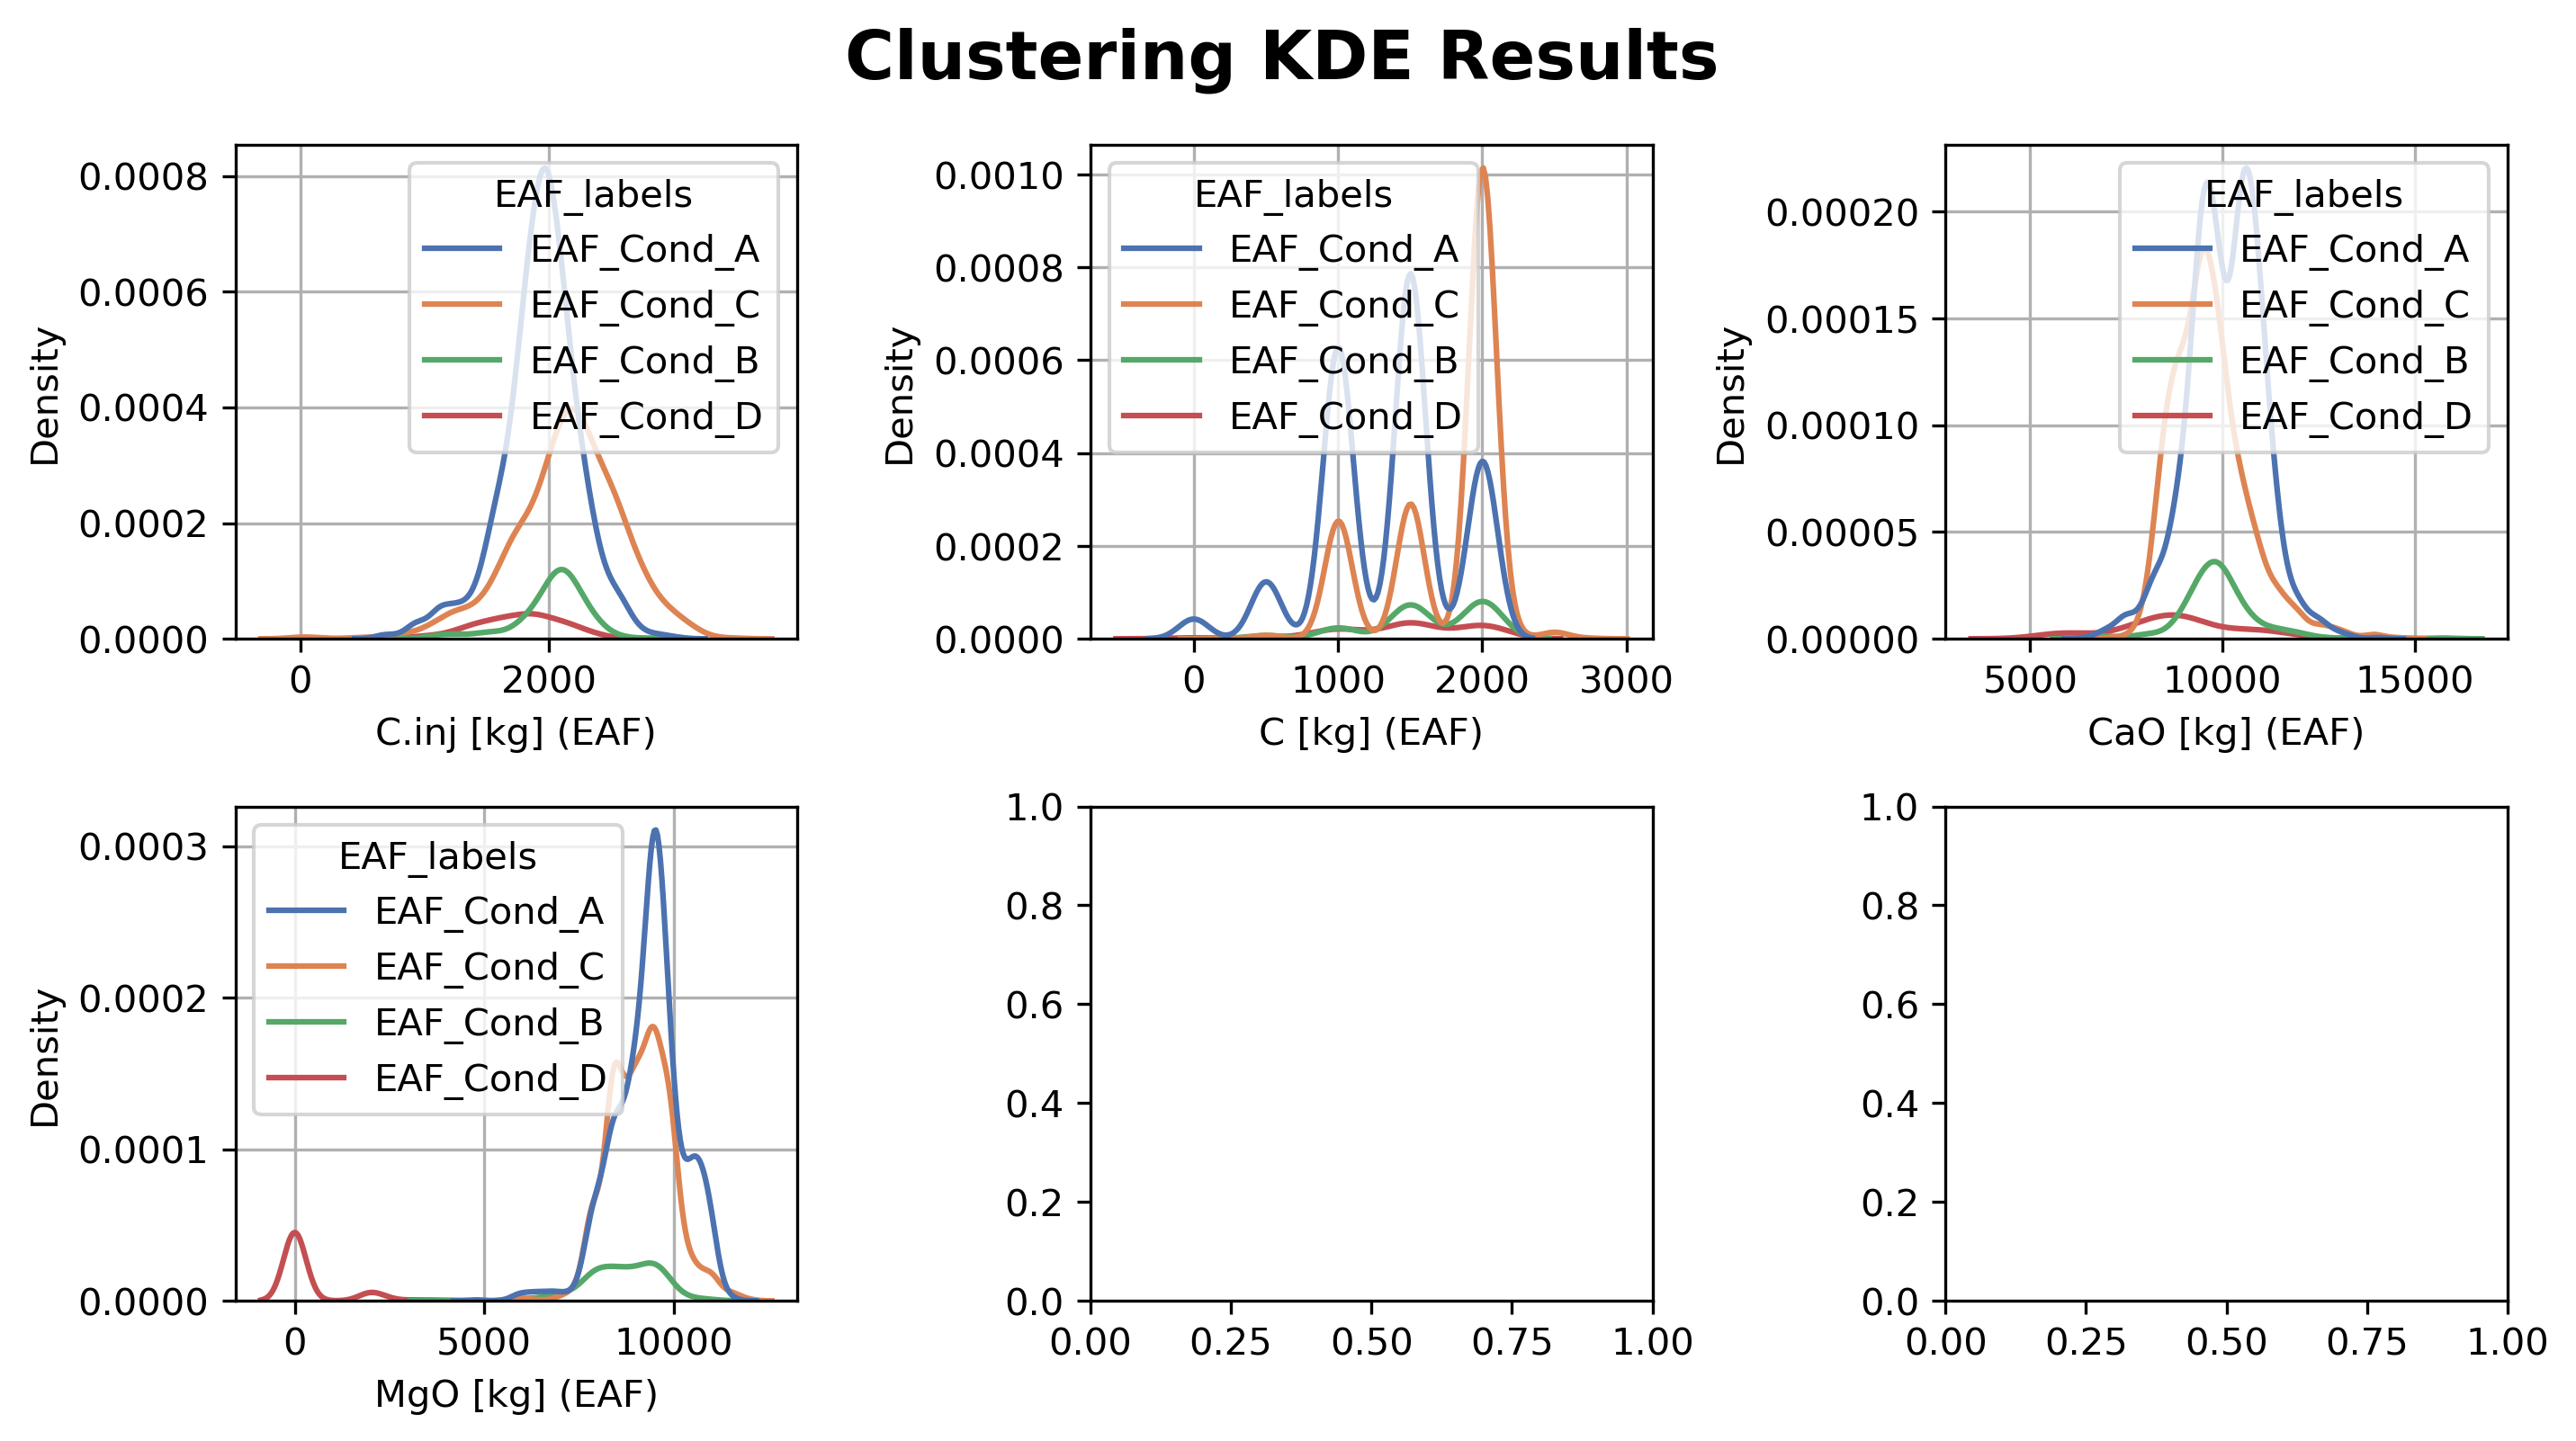

In [30]:
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
df.drop(labels=['tar (EAF)'],axis=1,inplace=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
#df.drop(labels=['Delays (EAF)','EAF_DRI (EAF)','Chemical [MWh] (EAF)'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=100)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 4, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('SNE0', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=model.labels_,
    palette= cmap,
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/presentation/C5000 Amp VS O2 purity.jpg')
plt.show()
#----------Labeling---------
clust_lable_dict = {0:'EAF_Cond_A',1:'EAF_Cond_B',2:'EAF_Cond_C',3:'EAF_Cond_D',4:'EAF_Cond_D',5:'EAF_Cond_E',6:'EAF_Cond_F'}
labels = [clust_lable_dict[i] for i in model.labels_]
df["EAF_labels"] = labels
print(df.shape)
#----------Labes Conditions-----
plot_name = df.columns.drop(['EAF_labels'])
print(plot_name)
num = 0
for k in range(2):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('Clustering KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,3)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(3):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="EAF_labels",
                #hue_order=['Slag_Grade_A','Slag_Grade_B','Slag_Grade_C','Slag_Grade_D'],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            num = num +1
    fig.tight_layout()
plt.show()

# save For next use
#df.to_csv(f"{working_dir}/data/eaf_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name